# Exploratory Data Analysis (EDA) - Spotify Tracks Dataset

# Notebook Structure

This notebook follows a comprehensive exploratory data analysis (EDA) approach to analyze Spotify tracks data. The analysis is structured as follows:

1. **Data Loading & Initial Exploration** - Import libraries and load the dataset
2. **Data Cleaning & Preprocessing** - Handle missing values, data types, and feature engineering
3. **Univariate Analysis** - Analyze individual variables through descriptive statistics and visualizations
4. **Categorical Variables Analysis** - Explore categorical features and their distributions
5. **Temporal Analysis** - Examine time-based patterns and trends
6. **Bivariate Analysis** - Investigate relationships between variables
7. **Statistical Hypothesis Testing** - Validate key hypotheses with statistical tests
8. **Business Insights & Recommendations** - Synthesize findings into actionable insights
9. **Export Results** - Save cleaned data and analysis outputs

This structured approach ensures comprehensive analysis while maintaining clarity and reproducibility.

# 1. Import Necessary Libraries

In [384]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

# 2. Data Loading & Initial Exploration

### A. Dataset Loading

In [385]:
dictionary = pd.read_csv('spotify_data_description.csv')
df = pd.read_csv('spotify_tracks.csv', encoding='utf-8')

print(f"Dataset shape: {df.shape[0]} rows × {df.shape[1]} columns")

Dataset shape: 62317 rows × 22 columns


### B. Initial Data Exploration

In [386]:
dictionary

Column Name                                        Description
0           track_id      A unique identifier for the track on Spotify.
1         track_name                             The title of the song.
2        artist_name  The name of the artist(s) who performed the song.
3               year                      The release year of the song.
4         popularity  A measure of how popular a track is, ranging f...
5        artwork_url  A URL pointing to the album artwork for the tr...
6         album_name        The name of the album the track belongs to.
7       acousticness  A confidence measure indicating whether the tr...
8       danceability  A measure of how suitable a track is for danci...
9        duration_ms         The duration of the track in milliseconds.
10            energy  A perceptual measure of intensity and activity...
11  instrumentalness  Predicts whether a track contains no vocal con...
12               key  The key the track is in, represented as an int...
13          liveness  Detects the presence of an audience in the rec...
14          loudness  The overall loudness of a track in decibels (dB).
15              mode  Indicates the modality (major or minor) of a t...
16       speechiness  A measure detecting the presence of spoken wor...
17             tempo  The overall estimated tempo of a track in beat...
18    time_signature     An estimated overall time signature of a track
19           valence  A measure from -1.0 to 1.0 describing the musi...
20         track_url                        A URL to the Spotify track.
21          language        The detected language of the song's lyrics.

In [387]:
print("Dataset Information (df.info()):")
print("="*100)
df.info()

Dataset Information (df.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62317 entries, 0 to 62316
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          62317 non-null  object 
 1   track_name        62317 non-null  object 
 2   artist_name       62317 non-null  object 
 3   year              62317 non-null  int64  
 4   popularity        62317 non-null  int64  
 5   artwork_url       62317 non-null  object 
 6   album_name        62317 non-null  object 
 7   acousticness      62317 non-null  float64
 8   danceability      62317 non-null  float64
 9   duration_ms       62317 non-null  float64
 10  energy            62317 non-null  float64
 11  instrumentalness  62317 non-null  float64
 12  key               62317 non-null  float64
 13  liveness          62317 non-null  float64
 14  loudness          62317 non-null  float64
 15  mode              62317 non-null  float64
 16  speechi

In [388]:
print("First 5 rows of the dataset:")
print("="*100)
df.head()

First 5 rows of the dataset:


track_id                                  track_name  \
0  2r0ROhr7pRN4MXDMT1fEmd                  Leo Das Entry (From "Leo")   
1  4I38e6Dg52a2o2a8i5Q5PW                                AAO KILLELLE   
2  59NoiRhnom3lTeRFaBzOev      Mayakiriye Sirikiriye - Orchestral EDM   
3  5uUqRQd385pvLxC8JX3tXn    Scene Ah Scene Ah - Experimental EDM Mix   
4  1KaBRg2xgNeCljmyxBH1mo  Gundellonaa X I Am A Disco Dancer - Mashup   

                                         artist_name  year  popularity  \
0                                Anirudh Ravichander  2024          59   
1  Anirudh Ravichander, Pravin Mani, Vaishali Sri...  2024          47   
2           Anirudh Ravichander, Anivee, Alvin Bruno  2024          35   
3  Anirudh Ravichander, Bharath Sankar, Kabilan, ...  2024          24   
4  Anirudh Ravichander, Benny Dayal, Leon James, ...  2024          22   

                                         artwork_url  \
0  https://i.scdn.co/image/ab67616d0000b273ce9c65...   
1  https://i.scdn.co/image/ab67616d0000b273be1b03...   
2  https://i.scdn.co/image/ab67616d0000b27334a1dd...   
3  https://i.scdn.co/image/ab67616d0000b27332e623...   
4  https://i.scdn.co/image/ab67616d0000b2735a59b6...   

                                   album_name  acousticness  danceability  \
0                  Leo Das Entry (From "Leo")        0.0241         0.753   
1                                AAO KILLELLE        0.0851         0.780   
2      Mayakiriye Sirikiriye (Orchestral EDM)        0.0311         0.457   
3    Scene Ah Scene Ah (Experimental EDM Mix)        0.2270         0.718   
4  Gundellonaa X I Am a Disco Dancer (Mashup)        0.0153         0.689   

   duration_ms  ...   key  liveness  loudness  mode  speechiness    tempo  \
0      97297.0  ...   8.0    0.1000    -5.994   0.0       0.1030  110.997   
1     207369.0  ...  10.0    0.0951    -5.674   0.0       0.0952  164.995   
2      82551.0  ...   2.0    0.0831    -8.937   0.0       0.1530  169.996   
3     115831.0  ...   7.0    0.1240   -11.104   1.0       0.4450  169.996   
4     129621.0  ...   7.0    0.3450    -9.637   1.0       0.1580  128.961   

   time_signature  valence                                          track_url  \
0             4.0    0.459  https://open.spotify.com/track/2r0ROhr7pRN4MXD...   
1             3.0    0.821  https://open.spotify.com/track/4I38e6Dg52a2o2a...   
2             4.0    0.598  https://open.spotify.com/track/59NoiRhnom3lTeR...   
3             4.0    0.362  https://open.spotify.com/track/5uUqRQd385pvLxC...   
4             4.0    0.593  https://open.spotify.com/track/1KaBRg2xgNeCljm...   

   language  
0     Tamil  
1     Tamil  
2     Tamil  
3     Tamil  
4     Tamil  

[5 rows x 22 columns]

In [389]:
print("Missing Values Analysis:")
print("="*100)

missing_summary = df.isnull().sum()
missing_percent = (missing_summary / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_summary,
    'Missing Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print(missing_df[missing_df['Missing Count'] > 0])

Missing Values Analysis:
Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []


In [390]:
print("Descriptive Statistics for Numerical Variables:")
df.describe()

Descriptive Statistics for Numerical Variables:


year    popularity  acousticness  danceability   duration_ms  \
count  62317.000000  62317.000000  62317.000000  62317.000000  6.231700e+04   
mean    2014.425935     15.358361      0.362292      0.596807  2.425270e+05   
std        9.645113     18.626908      0.314609      0.186209  1.129999e+05   
min     1971.000000      0.000000     -1.000000     -1.000000  5.000000e+03   
25%     2011.000000      0.000000      0.067100      0.497000  1.921600e+05   
50%     2017.000000      7.000000      0.286000      0.631000  2.362670e+05   
75%     2022.000000     26.000000      0.632000      0.730000  2.862400e+05   
max     2024.000000     93.000000      0.996000      0.986000  4.581483e+06   

             energy  instrumentalness           key      liveness  \
count  62317.000000      62317.000000  62317.000000  62317.000000   
mean       0.602496          0.146215      5.101658      0.194143   
std        0.246144          0.307804      3.553469      0.172030   
min       -1.000000         -1.000000     -1.000000     -1.000000   
25%        0.440000          0.000000      2.000000      0.093200   
50%        0.639000          0.000025      5.000000      0.125000   
75%        0.803000          0.015200      8.000000      0.243000   
max        1.000000          0.999000     11.000000      0.998000   

            loudness          mode   speechiness         tempo  \
count   62317.000000  62317.000000  62317.000000  62317.000000   
mean      -65.103433      0.586052      0.087722    117.931247   
std      2369.051478      0.493682      0.115150     28.509459   
min   -100000.000000     -1.000000     -1.000000     -1.000000   
25%       -10.727000      0.000000      0.036700     95.942000   
50%        -7.506000      1.000000      0.048900    117.991000   
75%        -5.456000      1.000000      0.089100    135.081000   
max         1.233000      1.000000      0.959000    239.970000   

       time_signature       valence  
count    62317.000000  62317.000000  
mean         3.857086      0.495226  
std          0.502660      0.264787  
min         -1.000000     -1.000000  
25%          4.000000      0.292000  
50%          4.000000      0.507000  
75%          4.000000      0.710000  
max          5.000000      0.995000

# 3. Data Cleaning & Preprocessing

### A. Handle Missing Values and Data Quality Issues

In [391]:
# Create a copy for cleaning
df_clean = df.copy()
print("Original dataset shape:", df.shape)

# Remove exact duplicates first
exact_duplicates = df_clean.duplicated().sum()
if exact_duplicates > 0:
    df_clean = df_clean.drop_duplicates()
    print(f"Removed {exact_duplicates:,} exact duplicate rows")

# Remove rows with missing critical information
critical_columns = ['track_name', 'artist_name', 'popularity']
df_clean = df_clean.dropna(subset=critical_columns)

# Handle data quality issues from validation
print("\nApplying data quality fixes:")

# Fix out-of-range values
if 'popularity' in df_clean.columns:
    invalid_pop = df_clean[(df_clean['popularity'] < 0) | (df_clean['popularity'] > 100)]
    if len(invalid_pop) > 0:
        df_clean.loc[(df_clean['popularity'] < 0), 'popularity'] = 0
        df_clean.loc[(df_clean['popularity'] > 100), 'popularity'] = 100
        print(f"- Fixed {len(invalid_pop)} invalid popularity values")

# Fix negative values in audio features (should be 0-1 range)
audio_features = ['acousticness', 'danceability', 'energy', 'instrumentalness',
                 'liveness', 'valence']
for feature in audio_features:
    if feature in df_clean.columns:
        negative_vals = (df_clean[feature] < 0).sum()
        if negative_vals > 0:
            df_clean.loc[df_clean[feature] < 0, feature] = 0
            print(f"- Fixed {negative_vals} negative values in {feature}")

# Handle missing values in numeric columns
numeric_columns = df_clean.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    if df_clean[col].isnull().sum() > 0:
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"- Filled {col} missing values with median: {median_val}")

# Handle missing values in categorical columns
categorical_columns = df_clean.select_dtypes(include=['object']).columns
for col in categorical_columns:
    if df_clean[col].isnull().sum() > 0:
        mode_val = df_clean[col].mode()[0] if not df_clean[col].mode().empty else 'Unknown'
        df_clean[col].fillna(mode_val, inplace=True)
        print(f"- Filled {col} missing values with mode: {mode_val}")

print(f"\nCleaning Results:")
print(f"- Original dataset: {df.shape[0]:,} tracks")
print(f"- Cleaned dataset: {df_clean.shape[0]:,} tracks")
print(f"- Rows removed: {df.shape[0] - df_clean.shape[0]:,}")
print(f"- Data retention rate: {(df_clean.shape[0] / df.shape[0]) * 100:.2f}%")

Original dataset shape: (62317, 22)
Removed 78 exact duplicate rows

Applying data quality fixes:
- Fixed 35 negative values in acousticness
- Fixed 35 negative values in danceability
- Fixed 35 negative values in energy
- Fixed 35 negative values in instrumentalness
- Fixed 35 negative values in liveness
- Fixed 35 negative values in valence

Cleaning Results:
- Original dataset: 62,317 tracks
- Cleaned dataset: 62,239 tracks
- Rows removed: 78
- Data retention rate: 99.87%
Removed 78 exact duplicate rows

Applying data quality fixes:
- Fixed 35 negative values in acousticness
- Fixed 35 negative values in danceability
- Fixed 35 negative values in energy
- Fixed 35 negative values in instrumentalness
- Fixed 35 negative values in liveness
- Fixed 35 negative values in valence

Cleaning Results:
- Original dataset: 62,317 tracks
- Cleaned dataset: 62,239 tracks
- Rows removed: 78
- Data retention rate: 99.87%


### B. Data Type Conversions

In [392]:
print("Data Validation - Checking for Invalid Ranges:")
print("="*100)

current_year = datetime.now().year

# Check popularity (0-100)
popularity_issues = df[(df['popularity'] < 0) | (df['popularity'] > 100)]
print(f"\n1. Popularity out of range (0-100): {len(popularity_issues)} records")

# Check year (should be reasonable, e.g., 1900 to current year)
year_issues = df[(df['year'] < 1900) | (df['year'] > current_year)]
print(f"2. Year out of range (1900-{current_year}): {len(year_issues)} records")

# Check audio features that should be between -1 and 1
audio_features_neg1_pos1 = ['acousticness', 'danceability', 'energy', 'instrumentalness', 
                             'liveness', 'valence']

for feature in audio_features_neg1_pos1:
    invalid = df[(df[feature] < -1) | (df[feature] > 1)]
    print(f"3. {feature.capitalize()} out of range (-1 to 1): {len(invalid)} records")

# Check mode (should be 0 or 1)
mode_issues = df[~df['mode'].isin([0, 1])]
print(f"4. Mode not 0 or 1: {len(mode_issues)} records")

# Check key (should be 0-11 for musical keys)
key_issues = df[(df['key'] < 0) | (df['key'] > 11)]
print(f"5. Key out of range (0-11): {len(key_issues)} records")

# Check duration_ms (should be positive)
duration_issues = df[df['duration_ms'] <= 0]
print(f"6. Duration <= 0: {len(duration_issues)} records")

# Check tempo (should be positive and reasonable, e.g., 20-300 BPM)
tempo_issues = df[(df['tempo'] < 20) | (df['tempo'] > 300)]
print(f"7. Tempo out of reasonable range (20-300 BPM): {len(tempo_issues)} records")

Data Validation - Checking for Invalid Ranges:

1. Popularity out of range (0-100): 0 records
2. Year out of range (1900-2025): 0 records
3. Acousticness out of range (-1 to 1): 0 records
3. Danceability out of range (-1 to 1): 0 records
3. Energy out of range (-1 to 1): 0 records
3. Instrumentalness out of range (-1 to 1): 0 records
3. Liveness out of range (-1 to 1): 0 records
3. Valence out of range (-1 to 1): 0 records
4. Mode not 0 or 1: 35 records
5. Key out of range (0-11): 35 records
6. Duration <= 0: 0 records
7. Tempo out of reasonable range (20-300 BPM): 57 records


In [393]:
# Convert data types as needed
print("NEW FEATURES")
print("=" * 50)

# 1. Duration in minutes (more interpretable)
if 'duration_ms' in df_clean.columns:
    df_clean['duration_minutes'] = df_clean['duration_ms'] / 60000
    print("- Created duration_minutes from duration_ms")

# 2. Era/Decade classification (more granular than just decade)
def classify_era(year):
    """Classify tracks into musical eras"""
    if year < 1980:
        return '1970s'
    elif year < 1990:
        return '1980s'
    elif year < 2000:
        return '1990s'
    elif year < 2010:
        return '2000s'
    elif year < 2020:
        return '2010s'
    else:
        return '2020s'

if 'year' in df_clean.columns:
    df_clean['era'] = df_clean['year'].apply(classify_era)
    print("- Created era classification (1970s-2020s)")

# 3. Energy categories (intuitive labels)
if 'energy' in df_clean.columns:
    df_clean['energy_category'] = pd.cut(df_clean['energy'],
                                       bins=[-1, 0.33, 0.66, 1.0],
                                       labels=['Calm', 'Moderate', 'High Energy'])
    print("- Created energy_category (Calm/Moderate/High Energy)")

# 4. Duration categories
if 'duration_minutes' in df_clean.columns:
    df_clean['duration_category'] = pd.cut(df_clean['duration_minutes'],
                                         bins=[0, 2, 3, 4.5, 6, float('inf')],
                                         labels=['Very Short', 'Short', 'Average', 'Long', 'Very Long'])
    print("- Created duration_category based on song length")

# 5. Popularity tiers (more granular)
if 'popularity' in df_clean.columns:
    df_clean['popularity_tier'] = pd.cut(df_clean['popularity'],
                                       bins=[0, 10, 25, 50, 75, 100],
                                       labels=['Niche', 'Underground', 'Moderate', 'Popular', 'Viral'])
    print("- Created popularity_tier (Niche to Viral)")

# 6. Mood categories (valence-based with better labels)
if 'valence' in df_clean.columns:
    df_clean['mood_category'] = pd.cut(df_clean['valence'],
                                     bins=[-1, 0.33, 0.66, 1.0],
                                     labels=['Sad', 'Neutral', 'Happy'])
    print("- Created mood_category based on valence")

# 7. Acoustic vs Electronic spectrum
if 'acousticness' in df_clean.columns:
    df_clean['acoustic_category'] = pd.cut(df_clean['acousticness'],
                                         bins=[-1, 0.33, 0.66, 1.0],
                                         labels=['Electronic', 'Mixed', 'Acoustic'])
    print("- Created acoustic_category (Electronic/Mixed/Acoustic)")

# 8. Composite features (advanced combinations)
# Danceability-Energy composite
if 'danceability' in df_clean.columns and 'energy' in df_clean.columns:
    df_clean['dance_energy_index'] = (df_clean['danceability'] + df_clean['energy']) / 2
    print("- Created dance_energy_index composite")

# Mood-Energy composite (for party/chill classification)
if 'valence' in df_clean.columns and 'energy' in df_clean.columns:
    df_clean['vibe_score'] = (df_clean['valence'] * 0.6 + df_clean['energy'] * 0.4)
    df_clean['vibe_category'] = pd.cut(df_clean['vibe_score'],
                                     bins=[0, 0.3, 0.7, 1.0],
                                     labels=['Chill', 'Balanced', 'Party'])
    print("- Created vibe_category (Chill/Balanced/Party)")

# 9. Intensity Score (comprehensive energy measure)
if 'energy' in df_clean.columns and 'loudness' in df_clean.columns:
    # Normalize loudness to 0-1 scale (typical range is -60 to 0 dB)
    normalized_loudness = (df_clean['loudness'] + 60) / 60
    normalized_loudness = normalized_loudness.clip(0, 1)  # Ensure 0-1 range
    df_clean['intensity_score'] = (df_clean['energy'] * 0.7 + normalized_loudness * 0.3)
    print("- Created intensity_score (energy + loudness)")

# 10. Decade numeric for regression analysis
if 'year' in df_clean.columns:
    df_clean['decade'] = (df_clean['year'] // 10) * 10
    print("- Created decade numeric variable")

print(f"\nFeature Summary:")
print(f"- Original features: {df.shape[1]}")
print(f"- New features added: {df_clean.shape[1] - df.shape[1]}")
print(f"- Total features: {df_clean.shape[1]}")

# Display
print(f"\nNew Categorical Features Overview:")
categorical_features = ['era', 'energy_category', 'duration_category', 'popularity_tier',
                       'mood_category', 'acoustic_category', 'vibe_category']

for feature in categorical_features:
    if feature in df_clean.columns:
        top_category = df_clean[feature].mode()[0]
        unique_count = df_clean[feature].nunique()
        print(f"- {feature}: {unique_count} categories, most common: {top_category}")

NEW FEATURES
- Created duration_minutes from duration_ms
- Created era classification (1970s-2020s)
- Created energy_category (Calm/Moderate/High Energy)
- Created duration_category based on song length
- Created popularity_tier (Niche to Viral)
- Created mood_category based on valence
- Created acoustic_category (Electronic/Mixed/Acoustic)
- Created dance_energy_index composite
- Created vibe_category (Chill/Balanced/Party)
- Created intensity_score (energy + loudness)
- Created decade numeric variable

Feature Summary:
- Original features: 22
- New features added: 12
- Total features: 34

New Categorical Features Overview:
- era: 6 categories, most common: 2010s
- energy_category: 3 categories, most common: High Energy
- duration_category: 5 categories, most common: Average
- popularity_tier: 5 categories, most common: Niche
- mood_category: 3 categories, most common: Neutral
- acoustic_category: 3 categories, most common: Electronic
- vibe_category: 3 categories, most common: Balanc

# 4. Univariate Analysis

### A. Quantitative Analysis of Numerical Variables

In [394]:
numerical_vars = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

numerical_vars = [col for col in numerical_vars if col in df_clean.columns]

print("Key Numerical Variables for Analysis:")
print(numerical_vars)

desc_stats = df_clean[numerical_vars].describe()
print("\nDetailed Descriptive Statistics:")
print(desc_stats)

Key Numerical Variables for Analysis:
['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

Detailed Descriptive Statistics:
         popularity  danceability        energy       loudness   speechiness  \
count  62239.000000  62239.000000  62239.000000   62239.000000  62239.000000   
mean      15.357589      0.597331      0.602978     -65.174856      0.087741   
std       18.630494      0.182920      0.243675    2370.534662      0.115208   
min        0.000000      0.000000      0.000000 -100000.000000     -1.000000   
25%        0.000000      0.497000      0.440000     -10.729000      0.036700   
50%        7.000000      0.631000      0.639000      -7.506000      0.048900   
75%       26.000000      0.730000      0.803000      -5.455000      0.089100   
max       93.000000      0.986000      1.000000       1.233000      0.959000   

       acousticness  instrumentalness      liveness       valence  \
co

### B. Visualization of Data Distributions using Histograms with KDE

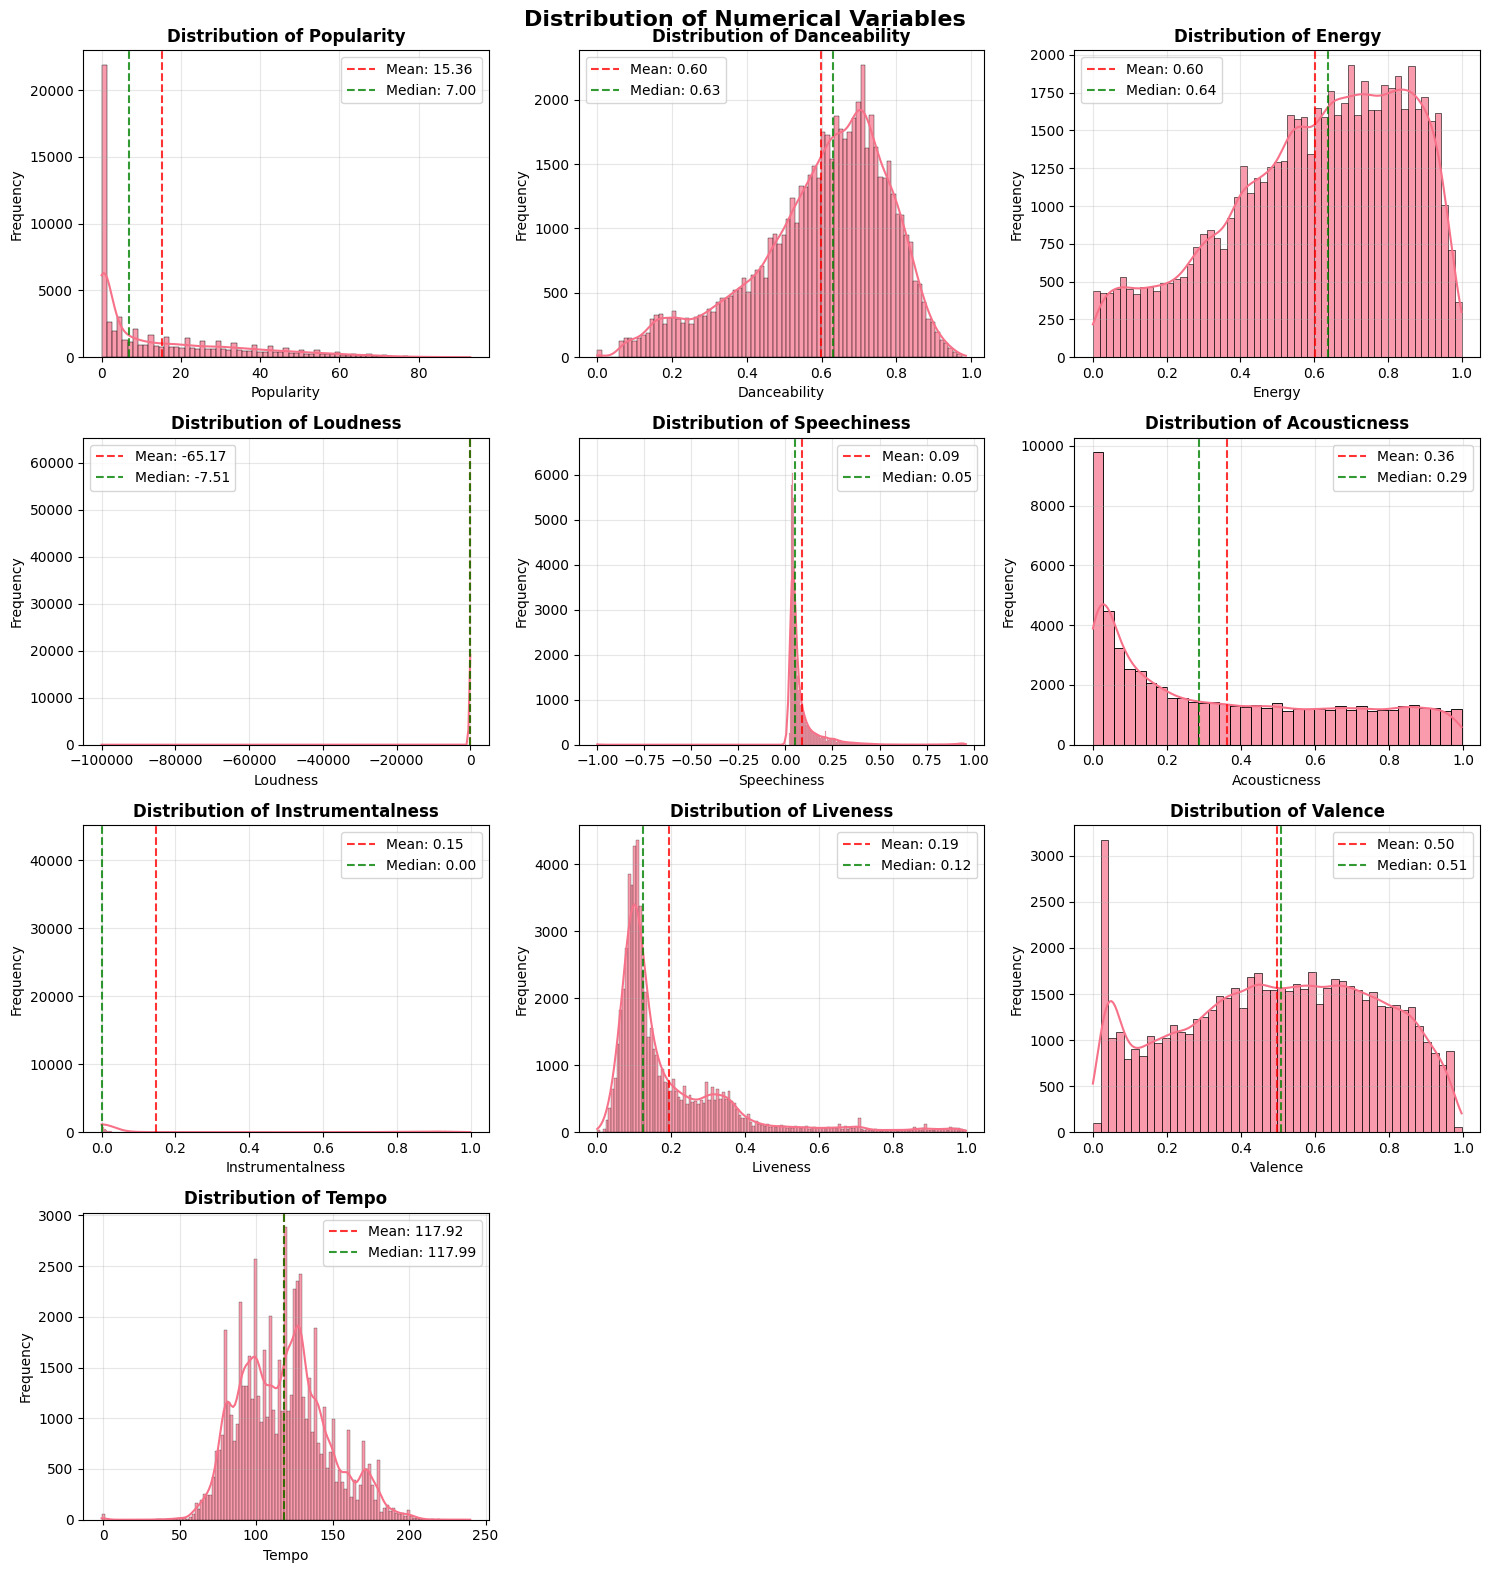

In [395]:
# Calculate optimal subplot arrangement
num_vars = len(numerical_vars)
if num_vars <= 2:
    rows, cols = 1, num_vars
elif num_vars <= 4:
    rows, cols = 2, 2
elif num_vars <= 6:
    rows, cols = 2, 3
elif num_vars <= 9:
    rows, cols = 3, 3
else:
    rows, cols = 4, 3

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows))

# Handle single subplot case
if num_vars == 1:
    axes = [axes]
elif rows == 1:
    axes = axes if num_vars > 1 else [axes]
else:
    axes = axes.flatten()

# Set color palette
sns.set_palette("husl")

# Plot each variable
for i, col in enumerate(numerical_vars):
    ax = axes[i]
    
    # Create histogram with KDE
    sns.histplot(data=df_clean, x=col, kde=True, alpha=0.7, ax=ax)
    
    # Calculate statistics
    mean_val = df_clean[col].mean()
    median_val = df_clean[col].median()
    
    # Add mean and median lines
    ax.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Mean: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', alpha=0.8, label=f'Median: {median_val:.2f}')
    
    # Customize subplot
    ax.set_title(f'Distribution of {col.title()}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col.title())
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Hide unused subplots if any
for i in range(num_vars, len(axes)):
    axes[i].set_visible(False)

# Add main title and adjust layout
plt.suptitle('Distribution of Numerical Variables', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.show()

### C. Top 5 Analysis for Numerical Variables

In [396]:
print("TOP 5 TRACKS ANALYSIS")
print("=" * 60)

key_vars = ['popularity', 'danceability', 'energy', 'valence', 'acousticness', 'tempo']
key_vars = [col for col in key_vars if col in df_clean.columns]

for var in key_vars:
    print(f"\n{var.upper()}:")
    print("-" * 50)
    
    top_5 = df_clean.nlargest(5, var)[['track_name', 'artist_name', var]]
    print(f"TOP 5 HIGHEST {var.upper()}:")
    for idx, (_, row) in enumerate(top_5.iterrows(), 1):
        print(f"  {idx}. {row['track_name']} - {row['artist_name']} ({row[var]:.3f})")
    
    print("=" * 60)

TOP 5 TRACKS ANALYSIS

POPULARITY:
--------------------------------------------------
TOP 5 HIGHEST POPULARITY:
  1. Big Dawgs - Hanumankind, Kalmi (93.000)
  2. Blinding Lights - The Weeknd (91.000)
  3. Starboy - The Weeknd, Daft Punk (91.000)
  4. Bye Bye Bye - From Deadpool and Wolverine Soundtrack - *NSYNC (90.000)
  5. Anti-Hero - Taylor Swift (89.000)

DANCEABILITY:
--------------------------------------------------
TOP 5 HIGHEST DANCEABILITY:
  1. Apotheosized Rheumatoid - Stefan Thaman (0.986)
  2. Bonus Rings - Daniel Alexis Pemberton (0.979)
  3. Globo - Luigi Madonna, Alberto Pascual (0.976)
  4. B N B - Shankar-Ehsaan-Loy, Blaaze, Shankar Mahadevan, Loy Mendonsa (0.975)
  5. Kakidha Kappal - From "Madras" - Santhosh Narayanan, Gana Bala (0.973)

ENERGY:
--------------------------------------------------
TOP 5 HIGHEST ENERGY:
  1. Hei Apa Apa X Tiktak Titit - Erra Shakira (1.000)
  2. Action With Aggressive - Yuvan Shankar Raja (0.999)
  3. Tetris - Buzz & Flipswitch Remix 

### D. Visual Plots for Top 5 Analysis

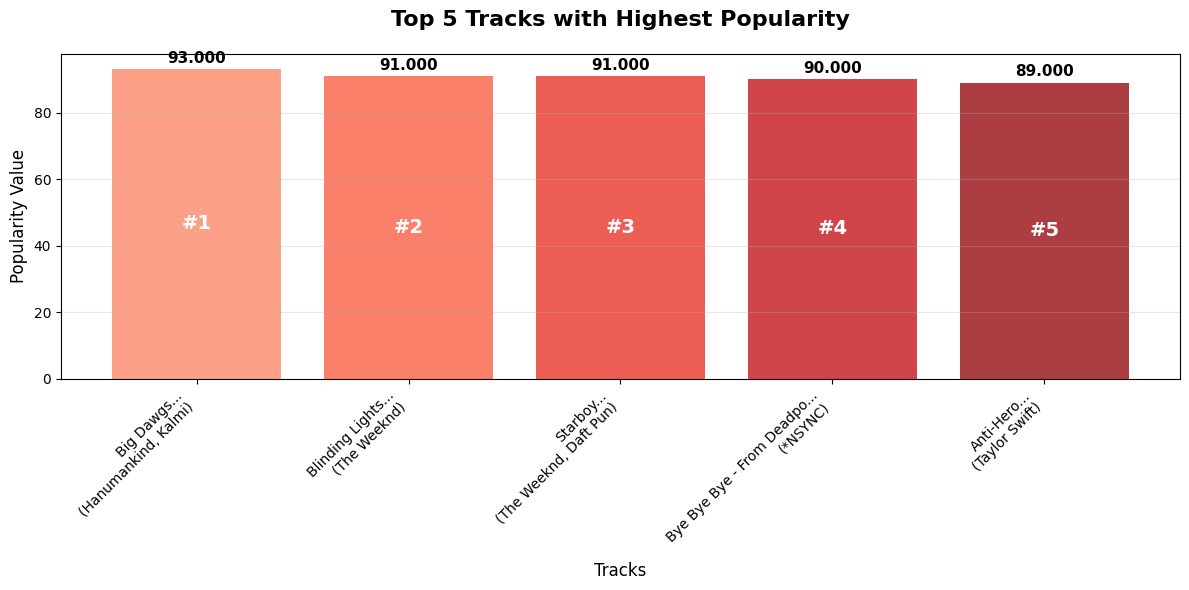

Top 5 POPULARITY - Highest value: 93.000
------------------------------------------------------------


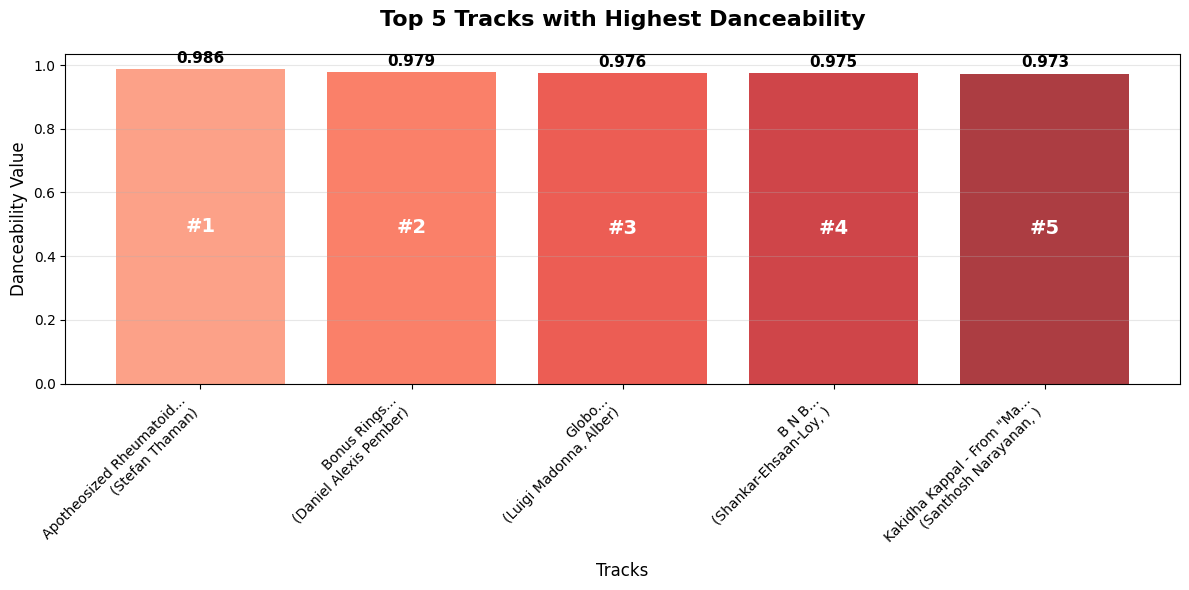

Top 5 DANCEABILITY - Highest value: 0.986
------------------------------------------------------------


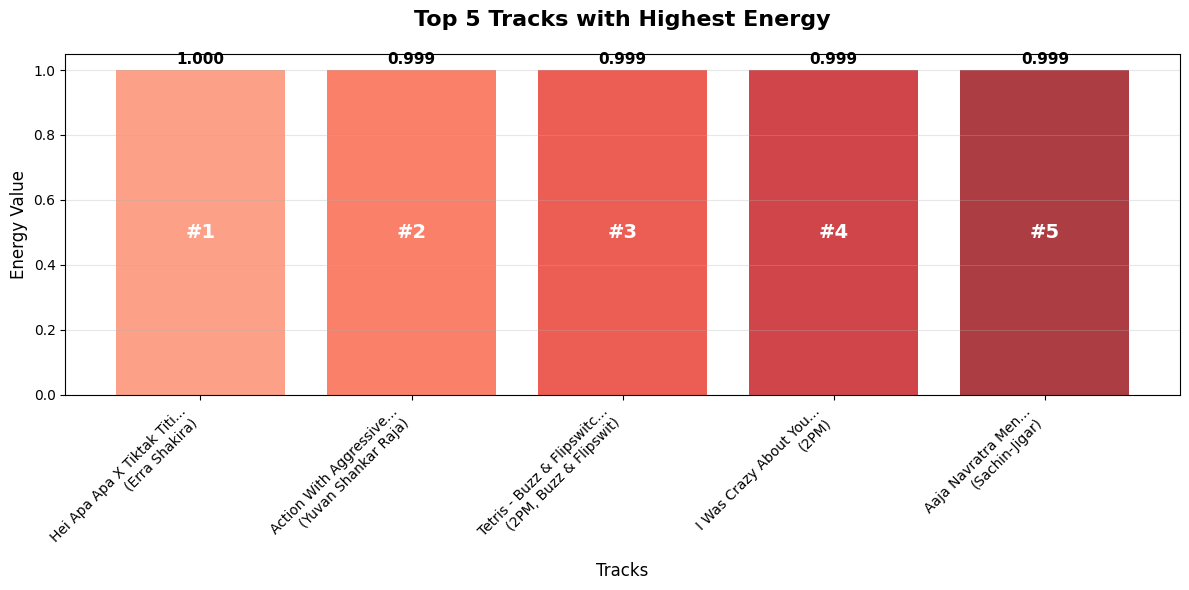

Top 5 ENERGY - Highest value: 1.000
------------------------------------------------------------


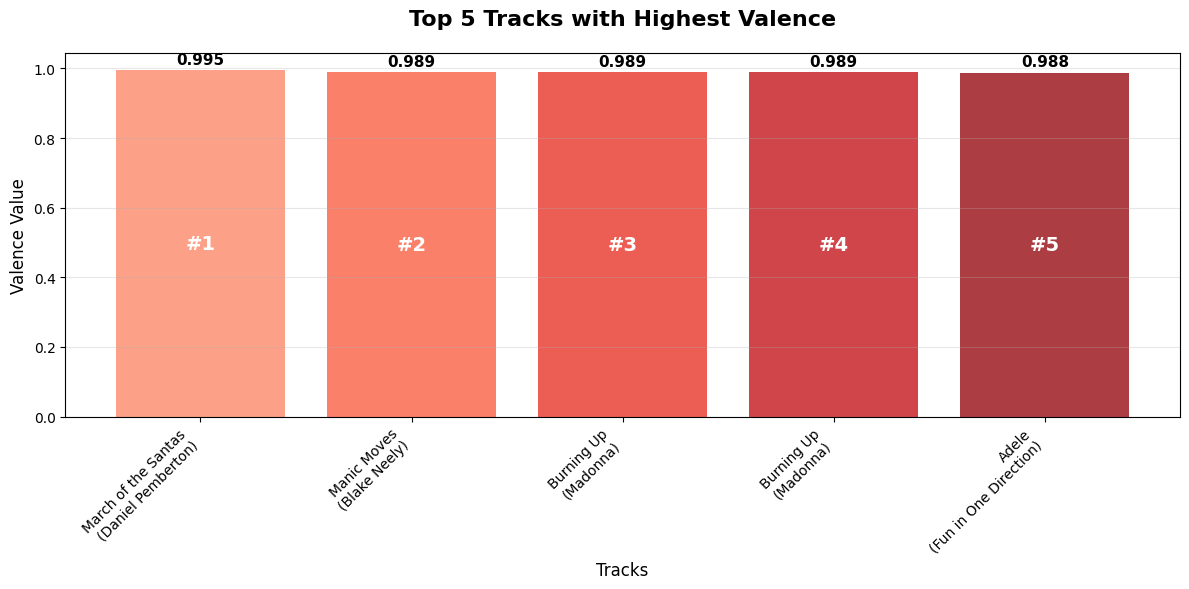

Top 5 VALENCE - Highest value: 0.995
------------------------------------------------------------


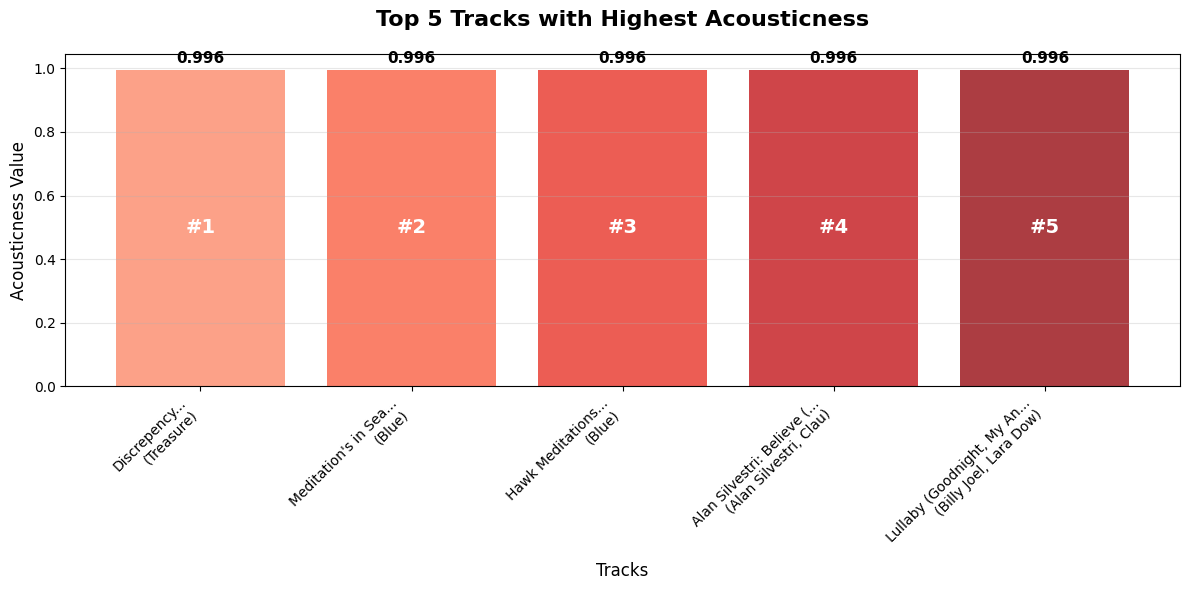

Top 5 ACOUSTICNESS - Highest value: 0.996
------------------------------------------------------------


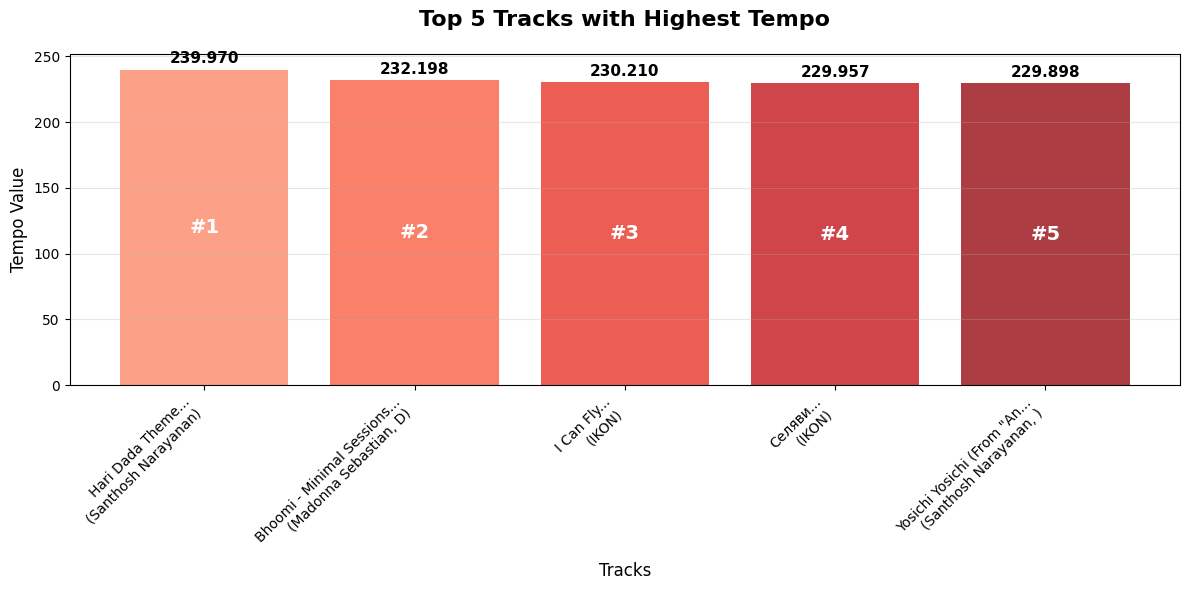

Top 5 TEMPO - Highest value: 239.970
------------------------------------------------------------


In [397]:
key_vars = ['popularity', 'danceability', 'energy', 'valence', 'acousticness', 'tempo']
key_vars = [col for col in key_vars if col in df_clean.columns]

for var in key_vars:
    top_5 = df_clean.nlargest(5, var).copy()
    
    top_5['track_label'] = top_5['track_name'].str[:25] + '...' if top_5['track_name'].str.len().max() > 25 else top_5['track_name']
    top_5['full_label'] = top_5['track_label'] + '\n(' + top_5['artist_name'].str[:20] + ')'

    plt.figure(figsize=(12, 6))
    
    colors = plt.get_cmap('Reds')(np.linspace(0.4, 0.9, 5))
    bars = plt.bar(range(len(top_5)), top_5[var], color=colors, alpha=0.8)
    
    plt.title(f'Top 5 Tracks with Highest {var.replace("_", " ").title()}', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Tracks', fontsize=12)
    plt.ylabel(f'{var.replace("_", " ").title()} Value', fontsize=12)
    
    plt.xticks(range(len(top_5)), top_5['full_label'].tolist(), rotation=45, ha='right')

    for i, (bar, value) in enumerate(zip(bars, top_5[var])):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height() + max(top_5[var])*0.01,
                f'{value:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

    for i, bar in enumerate(bars):
        plt.text(bar.get_x() + bar.get_width()/2., bar.get_height()/2,
                f'#{i+1}', ha='center', va='center', fontsize=14, fontweight='bold', color='white')
    
    plt.grid(True, alpha=0.3, axis='y')
    plt.tight_layout()
    plt.show()
    
    print(f"Top 5 {var.upper()} - Highest value: {top_5[var].max():.3f}")
    print("-" * 60)

# 5. Categorical Variables Analysis

In [398]:
categorical_vars = ['era', 'energy_category', 'duration_category', 'popularity_tier',
                   'mood_category', 'acoustic_category', 'vibe_category', 'language']

categorical_vars = [col for col in categorical_vars if col in df_clean.columns]

print("Categorical Variables Distribution Analysis:")
print("=" * 80)

for var in categorical_vars:
    print(f"\n{var.upper()}:")
    value_counts = df_clean[var].value_counts()
    percentages = (value_counts / len(df_clean)) * 100
    
    for category, count, pct in zip(value_counts.index, value_counts.values, percentages.values):
        print(f"- {category}: {count:,} tracks ({pct:.1f}%)")

Categorical Variables Distribution Analysis:

ERA:
- 2010s: 25,444 tracks (40.9%)
- 2020s: 23,812 tracks (38.3%)
- 2000s: 7,148 tracks (11.5%)
- 1990s: 3,740 tracks (6.0%)
- 1980s: 1,863 tracks (3.0%)
- 1970s: 232 tracks (0.4%)

ENERGY_CATEGORY:
- High Energy: 29,040 tracks (46.7%)
- Moderate: 23,520 tracks (37.8%)
- Calm: 9,679 tracks (15.6%)

DURATION_CATEGORY:
- Average: 29,960 tracks (48.1%)
- Long: 16,244 tracks (26.1%)
- Short: 6,875 tracks (11.0%)
- Very Short: 4,994 tracks (8.0%)
- Very Long: 4,166 tracks (6.7%)

POPULARITY_TIER:
- Niche: 17,284 tracks (27.8%)
- Moderate: 11,840 tracks (19.0%)
- Underground: 11,206 tracks (18.0%)
- Popular: 3,954 tracks (6.4%)
- Viral: 257 tracks (0.4%)

MOOD_CATEGORY:
- Neutral: 24,836 tracks (39.9%)
- Happy: 19,402 tracks (31.2%)
- Sad: 18,001 tracks (28.9%)

ACOUSTIC_CATEGORY:
- Electronic: 33,264 tracks (53.4%)
- Mixed: 14,576 tracks (23.4%)
- Acoustic: 14,399 tracks (23.1%)

VIBE_CATEGORY:
- Balanced: 34,348 tracks (55.2%)
- Party: 17,423 

### A. Categorical Variables Visualizations


ANALYZING ERA DISTRIBUTION

ERA Distribution Summary:
  - 2010s: 25,444 tracks (40.9%)
  - 2020s: 23,812 tracks (38.3%)
  - 2000s: 7,148 tracks (11.5%)
  - 1990s: 3,740 tracks (6.0%)
  - 1980s: 1,863 tracks (3.0%)
  - 1970s: 232 tracks (0.4%)


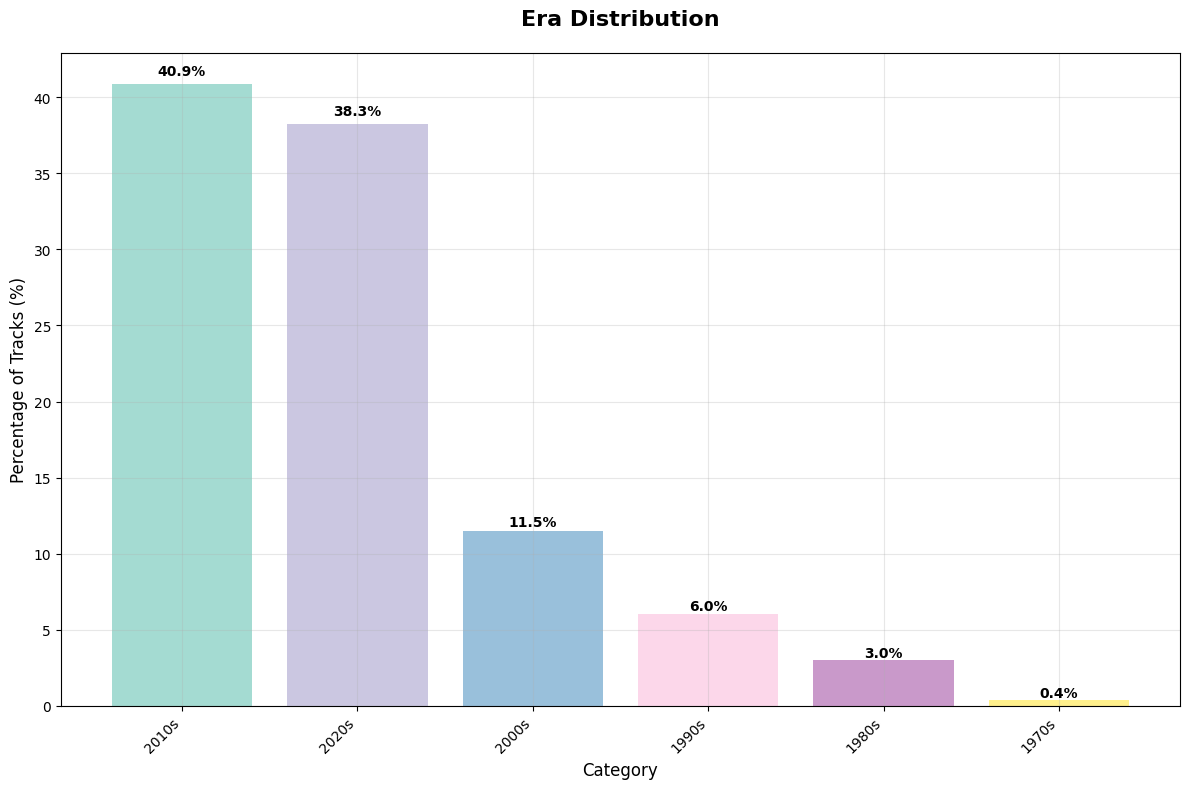


ANALYZING ENERGY_CATEGORY DISTRIBUTION

ENERGY_CATEGORY Distribution Summary:
  - High Energy: 29,040 tracks (46.7%)
  - Moderate: 23,520 tracks (37.8%)
  - Calm: 9,679 tracks (15.6%)


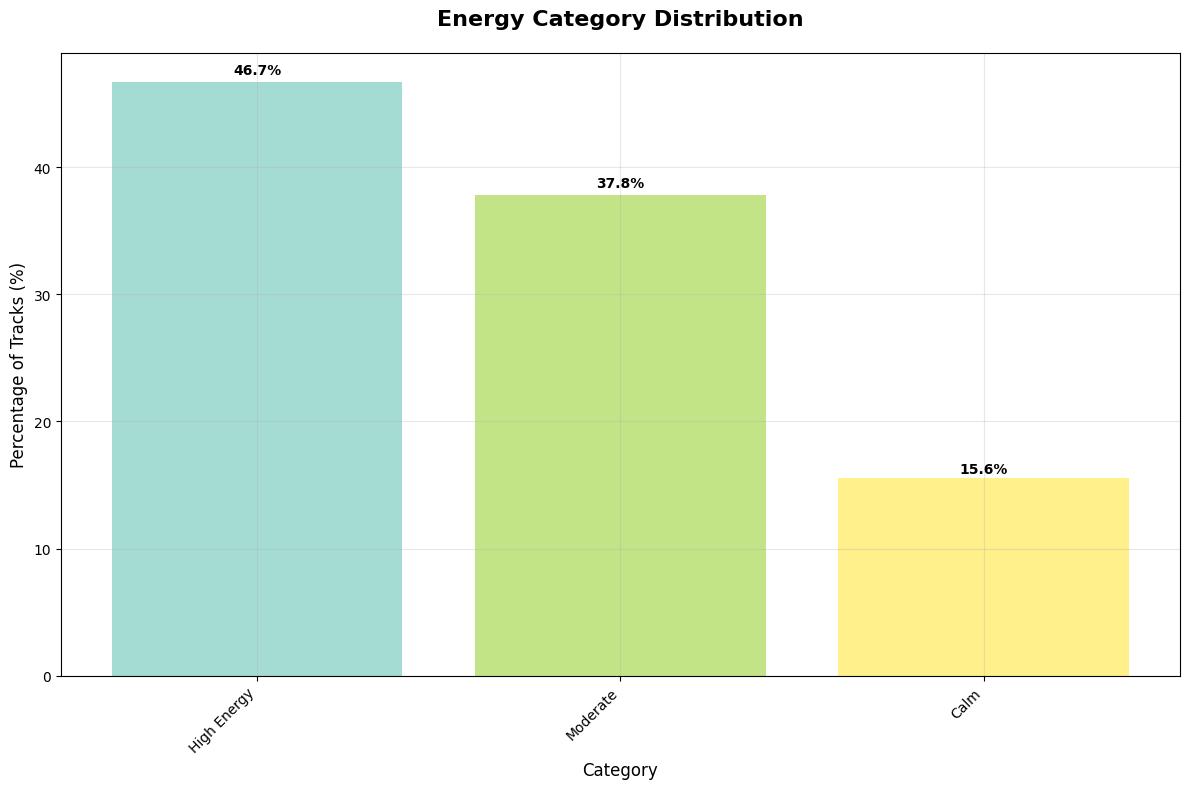


ANALYZING DURATION_CATEGORY DISTRIBUTION

DURATION_CATEGORY Distribution Summary:
  - Average: 29,960 tracks (48.1%)
  - Long: 16,244 tracks (26.1%)
  - Short: 6,875 tracks (11.0%)
  - Very Short: 4,994 tracks (8.0%)
  - Very Long: 4,166 tracks (6.7%)


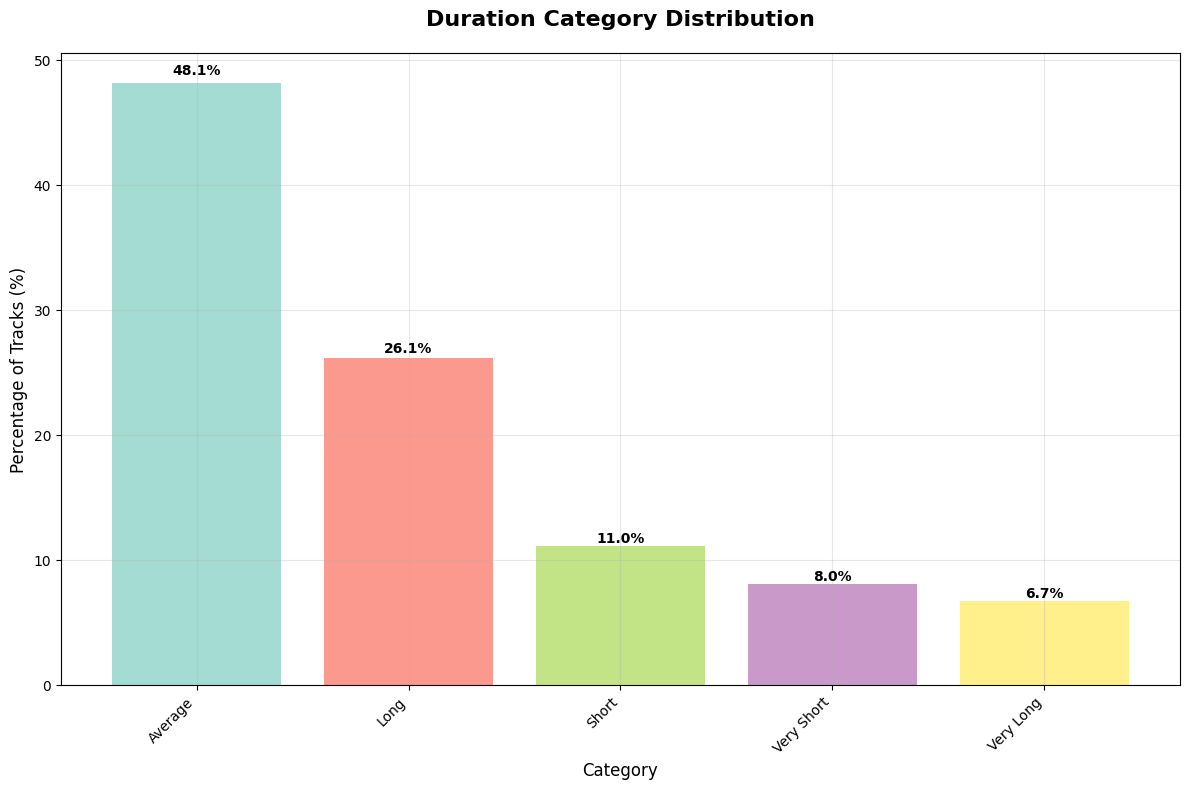


ANALYZING POPULARITY_TIER DISTRIBUTION

POPULARITY_TIER Distribution Summary:
  - Niche: 17,284 tracks (27.8%)
  - Moderate: 11,840 tracks (19.0%)
  - Underground: 11,206 tracks (18.0%)
  - Popular: 3,954 tracks (6.4%)
  - Viral: 257 tracks (0.4%)


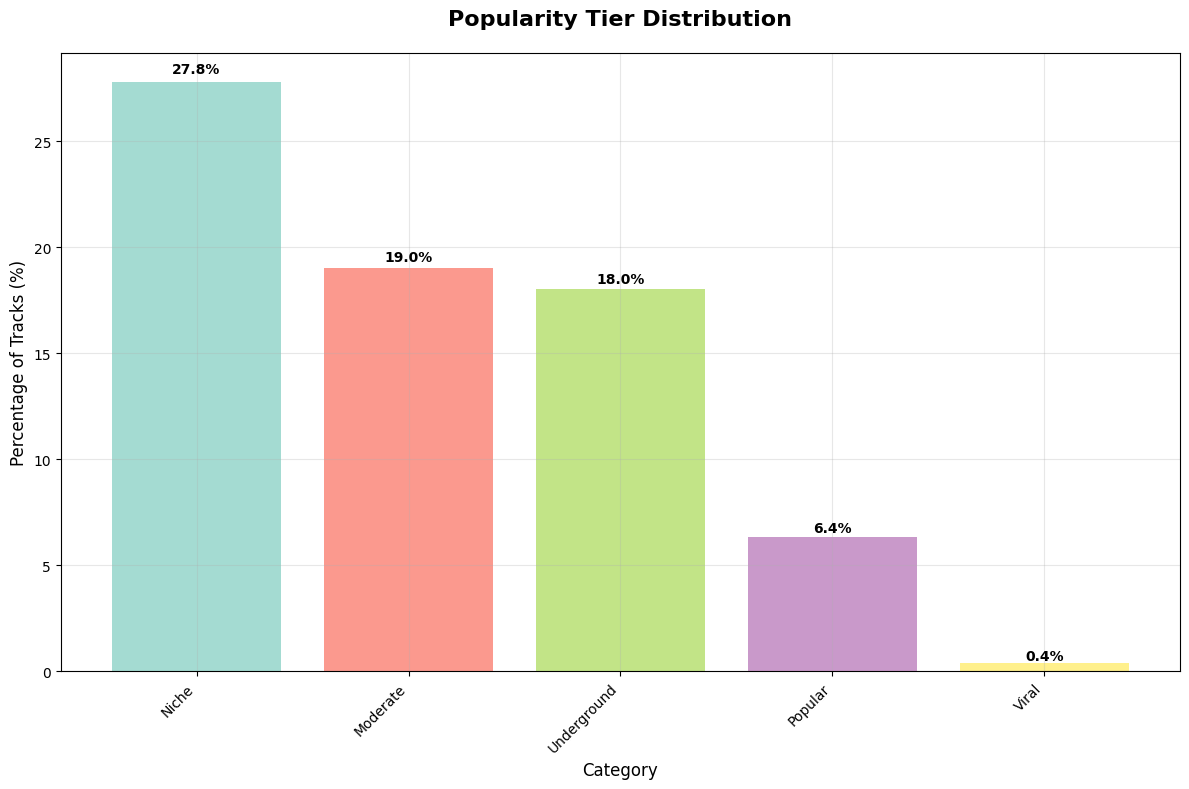


ANALYZING MOOD_CATEGORY DISTRIBUTION

MOOD_CATEGORY Distribution Summary:
  - Neutral: 24,836 tracks (39.9%)
  - Happy: 19,402 tracks (31.2%)
  - Sad: 18,001 tracks (28.9%)


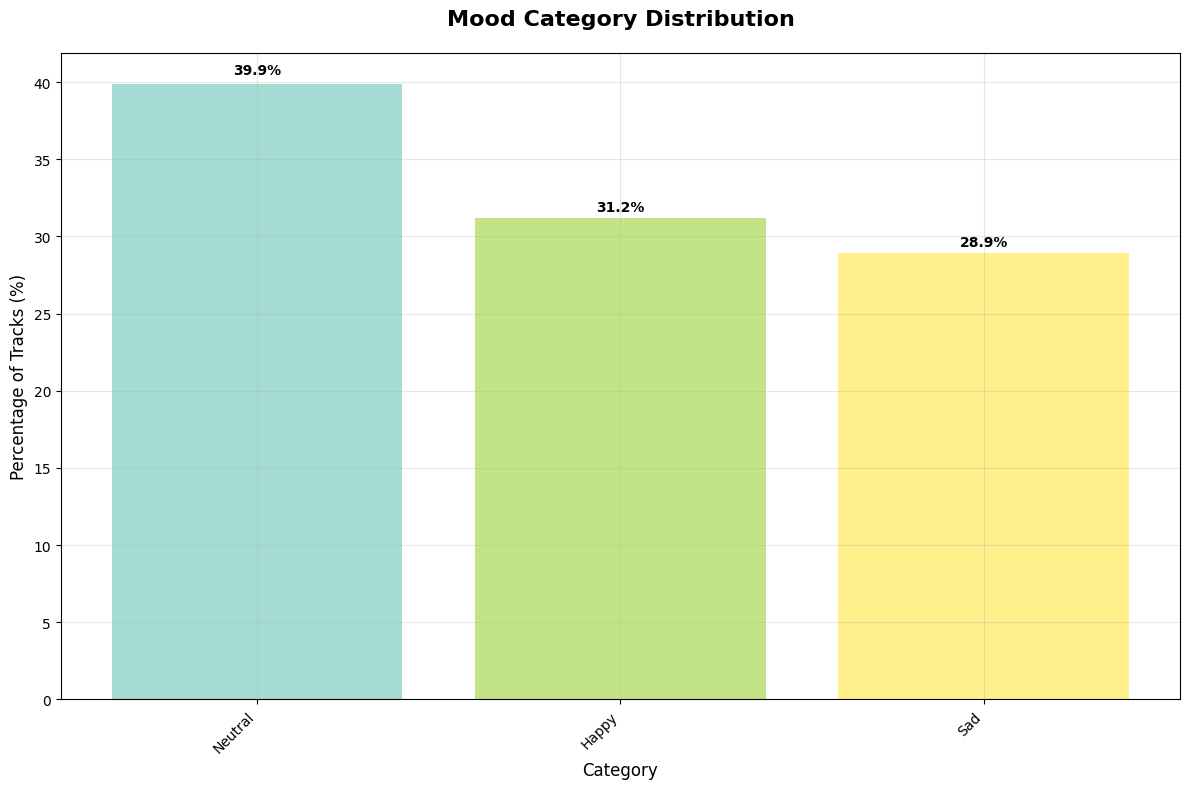


ANALYZING ACOUSTIC_CATEGORY DISTRIBUTION

ACOUSTIC_CATEGORY Distribution Summary:
  - Electronic: 33,264 tracks (53.4%)
  - Mixed: 14,576 tracks (23.4%)
  - Acoustic: 14,399 tracks (23.1%)


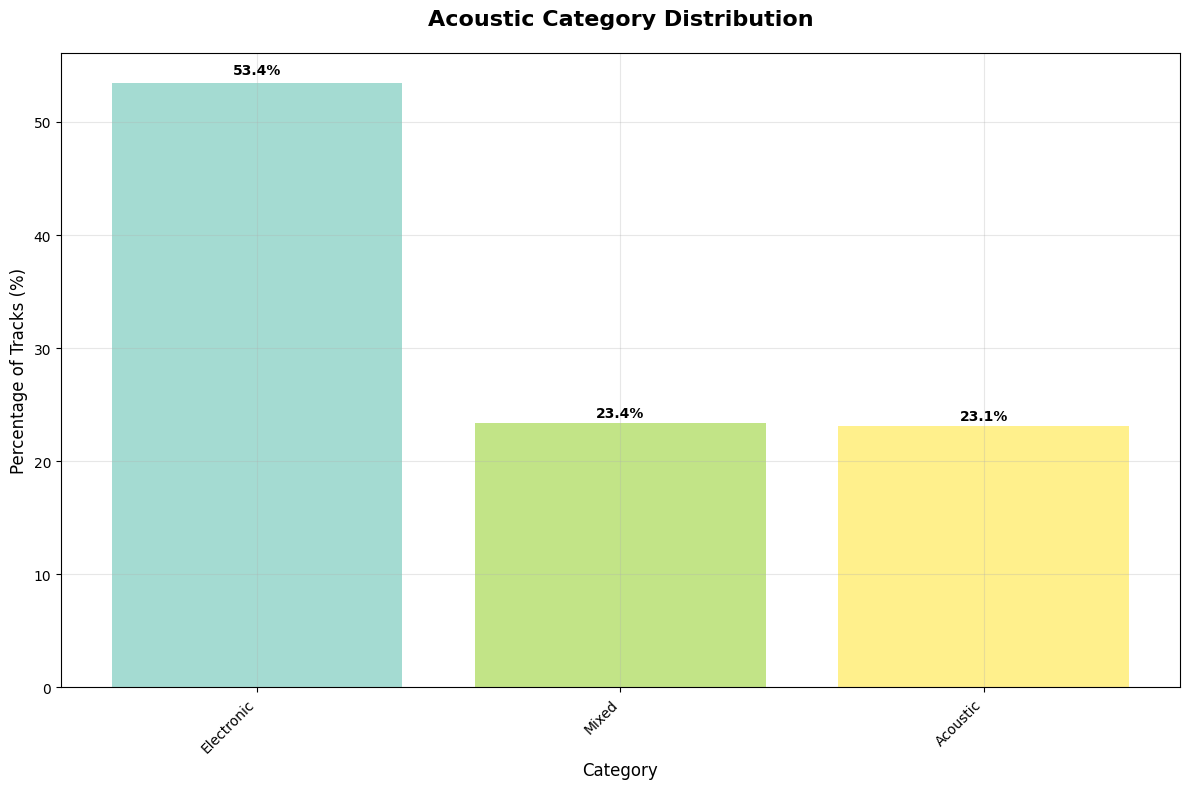


ANALYZING VIBE_CATEGORY DISTRIBUTION

VIBE_CATEGORY Distribution Summary:
  - Balanced: 34,348 tracks (55.2%)
  - Party: 17,423 tracks (28.0%)
  - Chill: 10,432 tracks (16.8%)


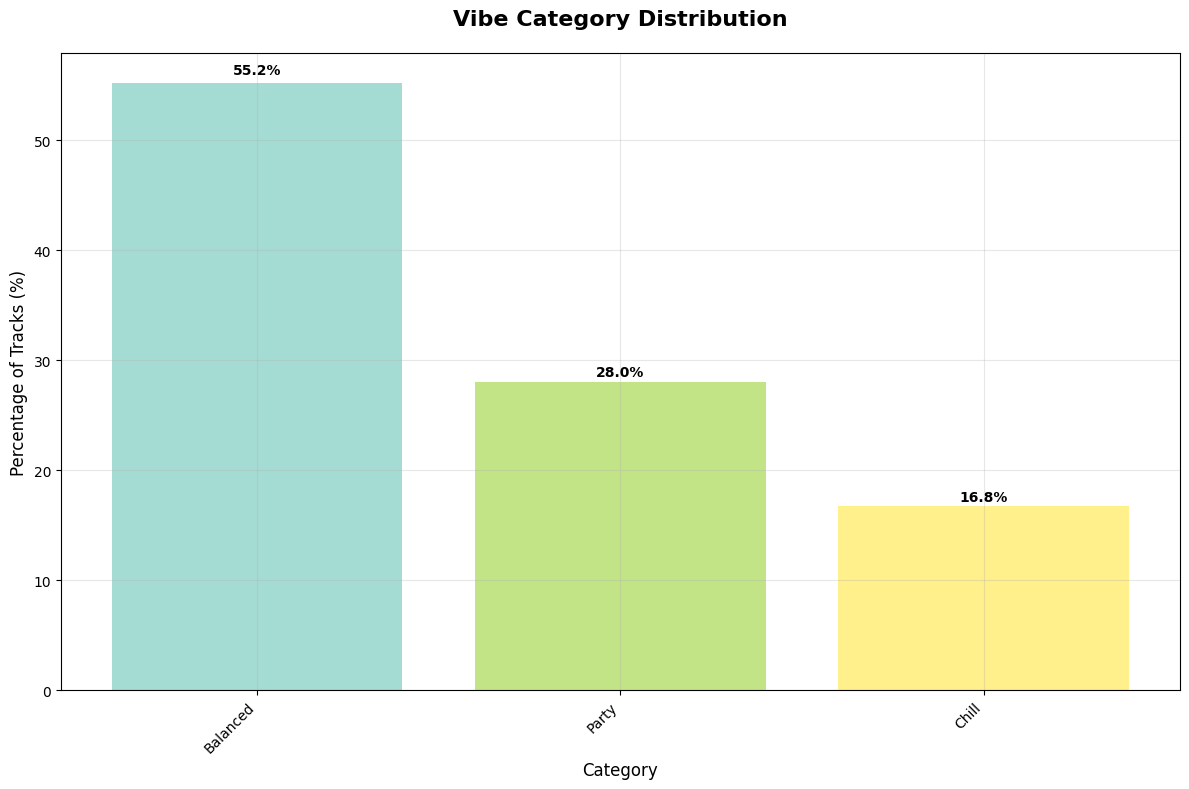


ANALYZING LANGUAGE DISTRIBUTION

LANGUAGE Distribution Summary:
  - English: 23,389 tracks (37.6%)
  - Unknown: 13,005 tracks (20.9%)
  - Tamil: 12,609 tracks (20.3%)
  - Korean: 6,893 tracks (11.1%)
  - Hindi: 5,740 tracks (9.2%)
  - Telugu: 321 tracks (0.5%)
  - Malayalam: 282 tracks (0.5%)


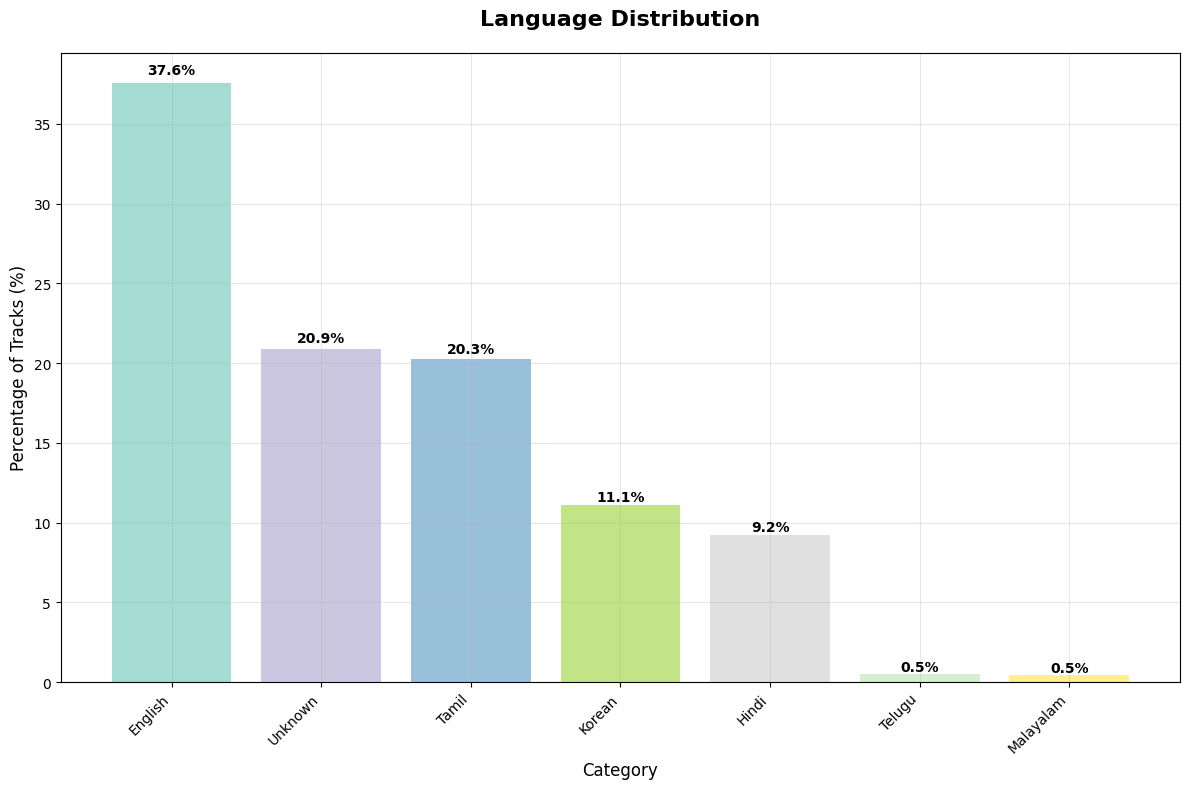

In [399]:
for var in categorical_vars:
    print(f"\nANALYZING {var.upper()} DISTRIBUTION")
    print(f"{'='*60}")
    
    value_counts = df_clean[var].value_counts()
    percentages = (value_counts / len(df_clean)) * 100

    print(f"\n{var.upper()} Distribution Summary:")
    for category, count, pct in zip(value_counts.index, value_counts.values, percentages.values):
        print(f"  - {category}: {count:,} tracks ({pct:.1f}%)")
    
    plt.figure(figsize=(12, 8))
    
    cmap = plt.get_cmap('Set3')
    colors = [cmap(i) for i in np.linspace(0, 1, len(value_counts))]
    
    heights = np.array(percentages.values)
    bars = plt.bar(range(len(value_counts)), heights, color=colors, alpha=0.8)
    
    plt.title(f'{var.replace("_", " ").title()} Distribution', fontweight='bold', fontsize=16, pad=20)
    plt.xlabel('Category', fontsize=12)
    plt.ylabel('Percentage of Tracks (%)', fontsize=12)
    
    plt.xticks(range(len(value_counts)), list(value_counts.index), rotation=45, ha='right')
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height + height*0.01,
               f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    plt.close() 


CATEGORICAL ANALYSIS - YEAR DISTRIBUTION


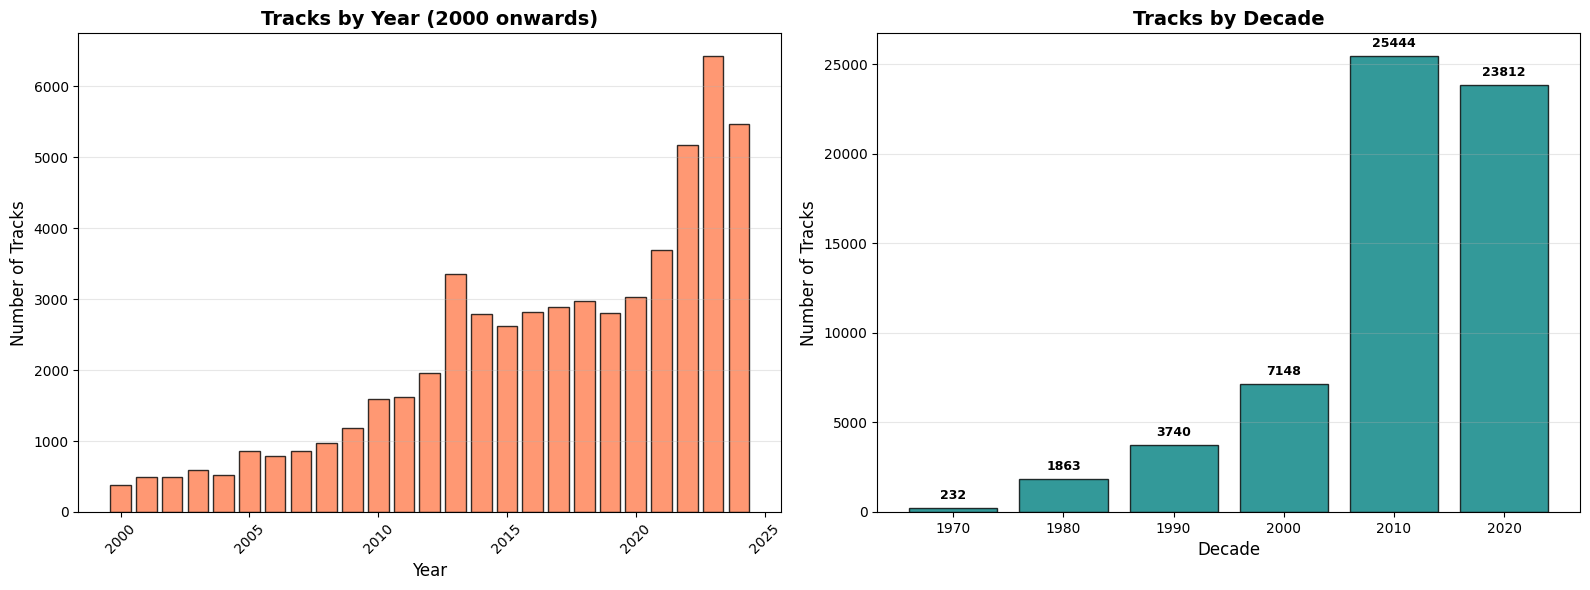


INSIGHTS - Temporal Distribution:
- Dataset spans: 1971 - 2024 (53 years)
- Most tracks from: 2023 (6427 tracks)
- Dominant decade: 2010s (25444 tracks)

Tracks by Decade:
- 1970s: 232 tracks (0.4%)
- 1980s: 1863 tracks (3.0%)
- 1990s: 3740 tracks (6.0%)
- 2000s: 7148 tracks (11.5%)
- 2010s: 25444 tracks (40.9%)
- 2020s: 23812 tracks (38.3%)


In [400]:
print("\nCATEGORICAL ANALYSIS - YEAR DISTRIBUTION")
print("="*100)

df_clean['decade'] = (df_clean['year'] // 10) * 10

year_counts = df_clean['year'].value_counts().sort_index()
decade_counts = df_clean['decade'].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

recent_years = year_counts[year_counts.index >= 2000]
axes[0].bar(recent_years.index, np.array(recent_years.values), color='coral', edgecolor='black', alpha=0.8)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Number of Tracks', fontsize=12)
axes[0].set_title('Tracks by Year (2000 onwards)', fontsize=14, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(alpha=0.3, axis='y')

decade_years = [int(decade) for decade in decade_counts.index]
decade_values = np.array(decade_counts.values)

axes[1].bar(decade_years, decade_values, color='teal', edgecolor='black', alpha=0.8, width=8)
axes[1].set_xlabel('Decade', fontsize=12)
axes[1].set_ylabel('Number of Tracks', fontsize=12)
axes[1].set_title('Tracks by Decade', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

for x, y in zip(decade_years, decade_values):
    axes[1].text(x, y + 500, str(y), ha='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nINSIGHTS - Temporal Distribution:")
print(f"- Dataset spans: {df_clean['year'].min()} - {df_clean['year'].max()} ({df_clean['year'].max() - df_clean['year'].min()} years)")
print(f"- Most tracks from: {year_counts.idxmax()} ({year_counts.max()} tracks)")
print(f"- Dominant decade: {int(decade_counts.idxmax())}s ({decade_counts.max()} tracks)")
print(f"\nTracks by Decade:")
for decade_year, count in zip(decade_years, decade_values):
    print(f"- {decade_year}s: {count} tracks ({count/len(df_clean)*100:.1f}%)")


🎵 CATEGORICAL ANALYSIS - MUSICAL ATTRIBUTES


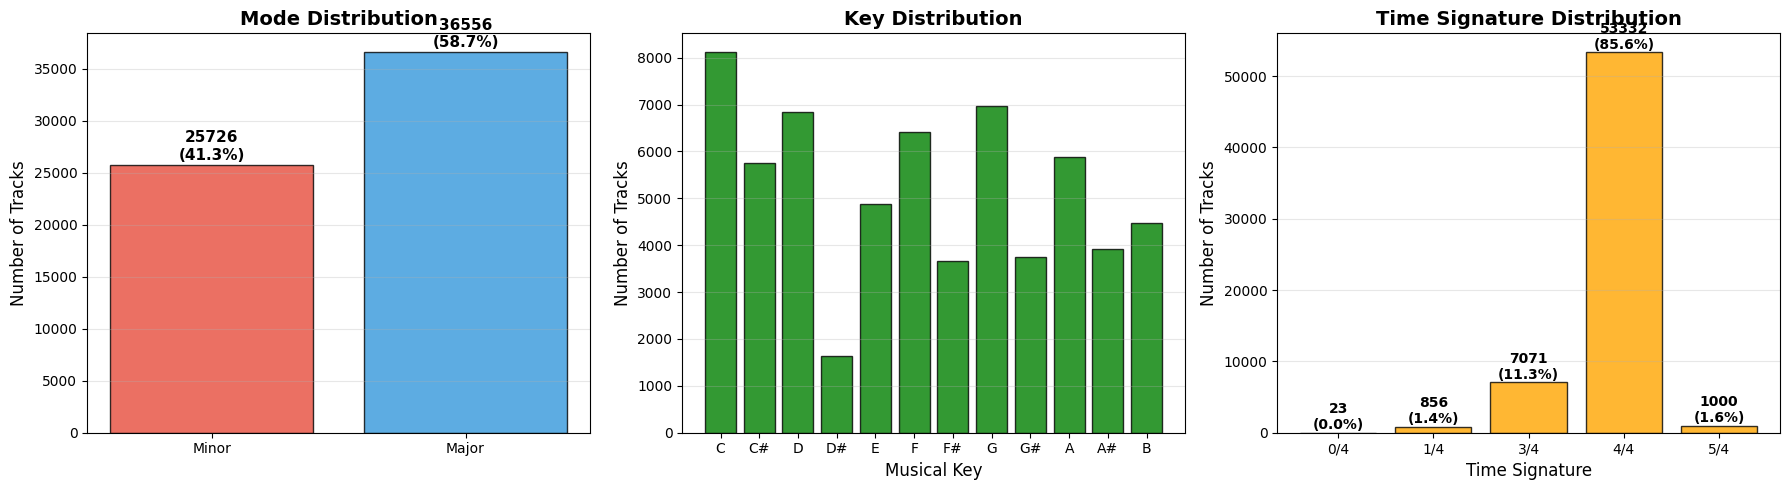


INSIGHTS - Musical Attributes:

MODE:
- Major: 36556 tracks (58.7%)
- Minor: 25726 tracks (41.3%)
- Finding: Slight preference for major keys (more uplifting/positive)

KEY:
- Most common: C (8113 tracks)
- Fairly even distribution across all 12 keys

TIME SIGNATURE:
- Dominant: 4/4 time (53332 tracks, 85.6%)
- Finding: 4/4 is standard in pop/rock music


In [401]:
print("\n🎵 CATEGORICAL ANALYSIS - MUSICAL ATTRIBUTES")
print("="*100)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

mode_counts = df['mode'].value_counts()
mode_labels = ['Minor', 'Major']
axes[0].bar(mode_labels, [mode_counts.get(0, 0), mode_counts.get(1, 0)], 
           color=['#E74C3C', '#3498DB'], edgecolor='black', alpha=0.8)
axes[0].set_ylabel('Number of Tracks', fontsize=12)
axes[0].set_title('Mode Distribution', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

for i, (label, val) in enumerate(zip(mode_labels, [mode_counts.get(0, 0), mode_counts.get(1, 0)])):
    pct = val / len(df) * 100
    axes[0].text(i, val + 500, f'{val}\n({pct:.1f}%)', ha='center', fontsize=11, fontweight='bold')

key_counts = df['key'].value_counts().sort_index()
key_names = ['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
valid_keys = [i for i in range(12) if i in key_counts.index]
axes[1].bar([key_names[int(i)] for i in valid_keys], [key_counts[i] for i in valid_keys], 
           color='green', edgecolor='black', alpha=0.8)
axes[1].set_xlabel('Musical Key', fontsize=12)
axes[1].set_ylabel('Number of Tracks', fontsize=12)
axes[1].set_title('Key Distribution', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

time_sig_counts = df['time_signature'].value_counts().sort_index()
valid_sigs = [i for i in range(0, 6) if i in time_sig_counts.index]
axes[2].bar([f'{int(i)}/4' for i in valid_sigs], [time_sig_counts[i] for i in valid_sigs], 
           color='orange', edgecolor='black', alpha=0.8)
axes[2].set_xlabel('Time Signature', fontsize=12)
axes[2].set_ylabel('Number of Tracks', fontsize=12)
axes[2].set_title('Time Signature Distribution', fontsize=14, fontweight='bold')
axes[2].grid(alpha=0.3, axis='y')

for i, sig in enumerate(valid_sigs):
    val = time_sig_counts[sig]
    pct = val / len(df) * 100
    axes[2].text(i, val + 500, f'{val}\n({pct:.1f}%)', ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nINSIGHTS - Musical Attributes:")
print(f"\nMODE:")
print(f"- Major: {mode_counts.get(1, 0)} tracks ({mode_counts.get(1, 0)/len(df)*100:.1f}%)")
print(f"- Minor: {mode_counts.get(0, 0)} tracks ({mode_counts.get(0, 0)/len(df)*100:.1f}%)")
print(f"- Finding: Slight preference for major keys (more uplifting/positive)")

print(f"\nKEY:")
most_common_key = key_counts.idxmax()
print(f"- Most common: {key_names[int(most_common_key)]} ({key_counts[most_common_key]} tracks)")
print(f"- Fairly even distribution across all 12 keys")

print(f"\nTIME SIGNATURE:")
most_common_sig = time_sig_counts.idxmax()
print(f"- Dominant: {int(most_common_sig)}/4 time ({time_sig_counts[most_common_sig]} tracks, {time_sig_counts[most_common_sig]/len(df)*100:.1f}%)")
print(f"- Finding: {int(most_common_sig)}/4 is standard in pop/rock music")


CATEGORICAL ANALYSIS - TOP ARTISTS


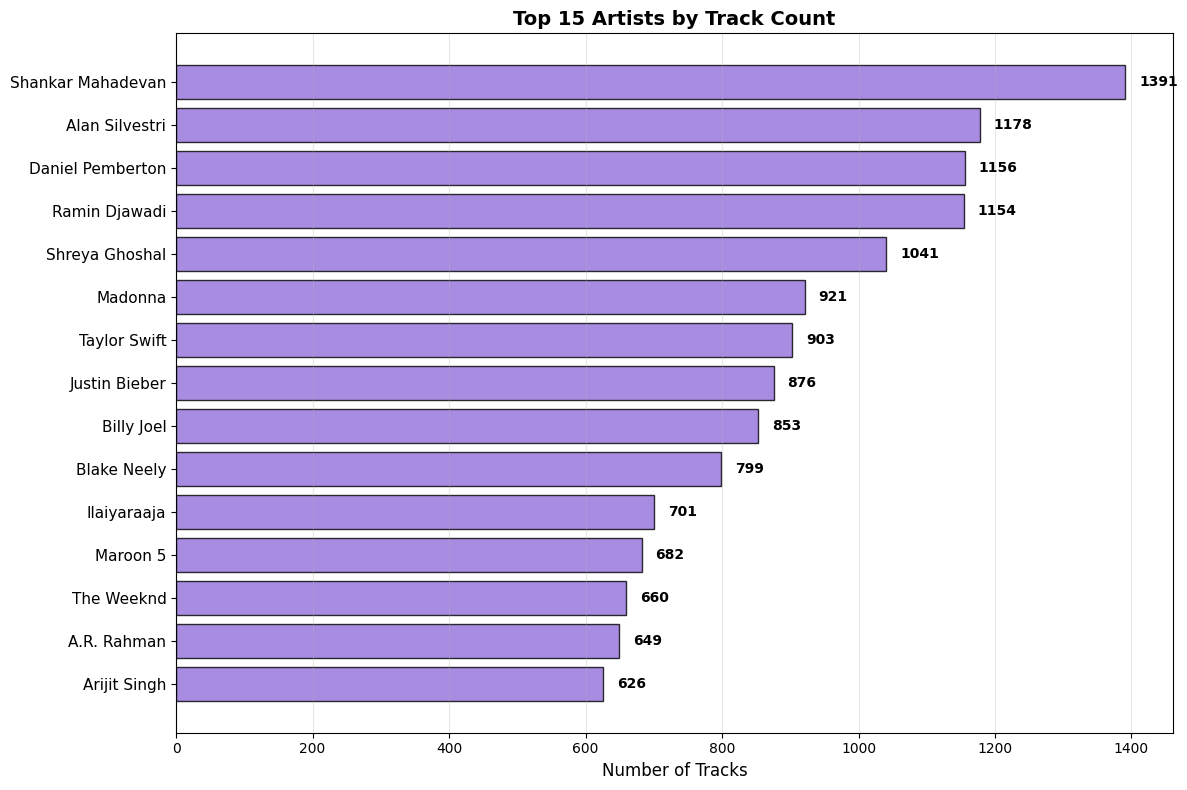


INSIGHTS - Top Artists:
- Total unique artists: 12,513
- Most prolific: Shankar Mahadevan (1391 tracks)

Top 10 Artists:
-  1. Shankar Mahadevan              -> 1391 tracks (2.23%)
-  2. Alan Silvestri                 -> 1178 tracks (1.89%)
-  3. Daniel Pemberton               -> 1156 tracks (1.86%)
-  4. Ramin Djawadi                  -> 1154 tracks (1.85%)
-  5. Shreya Ghoshal                 -> 1041 tracks (1.67%)
-  6. Madonna                        ->  921 tracks (1.48%)
-  7. Taylor Swift                   ->  903 tracks (1.45%)
-  8. Justin Bieber                  ->  876 tracks (1.41%)
-  9. Billy Joel                     ->  853 tracks (1.37%)
- 10. Blake Neely                    ->  799 tracks (1.28%)


In [402]:
print("\nCATEGORICAL ANALYSIS - TOP ARTISTS")
print("="*100)

top_artists = df['artist_name'].value_counts().head(15)

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(range(len(top_artists)), np.array(top_artists.values), color='mediumpurple', edgecolor='black', alpha=0.8)
ax.set_yticks(range(len(top_artists)))
ax.set_yticklabels(top_artists.index, fontsize=11)
ax.set_xlabel('Number of Tracks', fontsize=12)
ax.set_title('Top 15 Artists by Track Count', fontsize=14, fontweight='bold')
ax.invert_yaxis() 
ax.grid(alpha=0.3, axis='x')

for i, (artist, count) in enumerate(top_artists.items()):
    ax.text(count + 20, i, f'{count}', va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nINSIGHTS - Top Artists:")
print(f"- Total unique artists: {df['artist_name'].nunique():,}")
print(f"- Most prolific: {top_artists.index[0]} ({top_artists.iloc[0]} tracks)")
print(f"\nTop 10 Artists:")
for i, (artist, count) in enumerate(top_artists.head(10).items(), 1):
    percentage = (count / len(df)) * 100
    print(f"- {i:2}. {artist:30} -> {count:4} tracks ({percentage:.2f}%)")


CATEGORICAL ANALYSIS - TOP ARTISTS BY POPULARITY


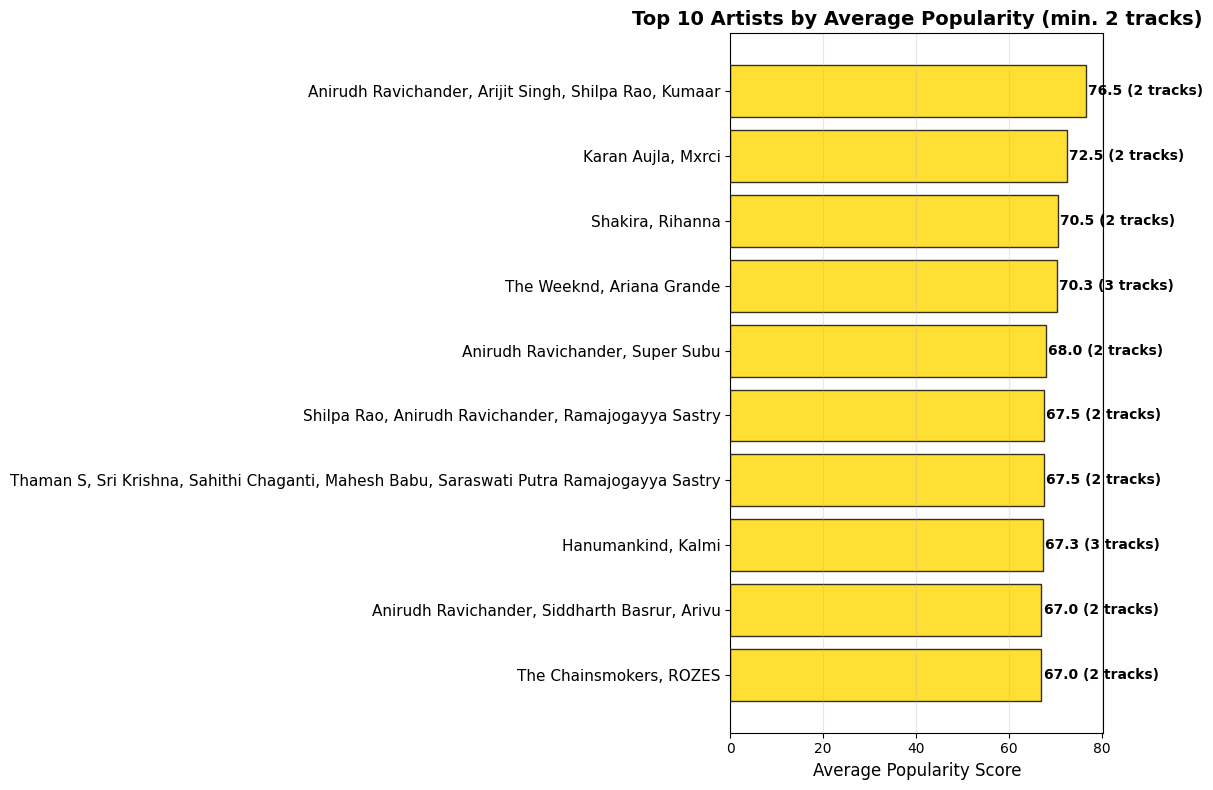


INSIGHTS - Top Artists by Popularity:
- Analysis based on artists with ≥2 tracks for reliability
- Highest average popularity: Anirudh Ravichander, Arijit Singh, Shilpa Rao, Kumaar (76.5)

Top 10 Artists by Average Popularity:
    1. Anirudh Ravichander, Arijit Singh, Shilpa Rao, Kumaar →  76.5 avg popularity ( 2 tracks)
    2. Karan Aujla, Mxrci                  →  72.5 avg popularity ( 2 tracks)
    3. Shakira, Rihanna                    →  70.5 avg popularity ( 2 tracks)
    4. The Weeknd, Ariana Grande           →  70.3 avg popularity ( 3 tracks)
    5. Anirudh Ravichander, Super Subu     →  68.0 avg popularity ( 2 tracks)
    6. Shilpa Rao, Anirudh Ravichander, Ramajogayya Sastry →  67.5 avg popularity ( 2 tracks)
    7. Thaman S, Sri Krishna, Sahithi Chaganti, Mahesh Babu, Saraswati Putra Ramajogayya Sastry →  67.5 avg popularity ( 2 tracks)
    8. Hanumankind, Kalmi                  →  67.3 avg popularity ( 3 tracks)
    9. Anirudh Ravichander, Siddharth Basrur, Arivu →  67.0 a

In [403]:
print("\nCATEGORICAL ANALYSIS - TOP ARTISTS BY POPULARITY")
print("="*100)

artist_popularity = df_clean.groupby('artist_name').agg({
    'popularity': 'mean',
    'track_name': 'count'
}).rename(columns={'track_name': 'track_count'}).round(2)

artist_popularity_filtered = artist_popularity[artist_popularity['track_count'] >= 2]
top_artists_popularity = artist_popularity_filtered.nlargest(10, 'popularity')

fig, ax = plt.subplots(figsize=(12, 8))

bars = ax.barh(range(len(top_artists_popularity)), 
               np.array(top_artists_popularity['popularity']), 
               color='gold', edgecolor='black', alpha=0.8)
ax.set_yticks(range(len(top_artists_popularity)))
ax.set_yticklabels(top_artists_popularity.index, fontsize=11)
ax.set_xlabel('Average Popularity Score', fontsize=12)
ax.set_title('Top 10 Artists by Average Popularity (min. 2 tracks)', fontsize=14, fontweight='bold')
ax.invert_yaxis()  
ax.grid(alpha=0.3, axis='x')

for i, (artist, row) in enumerate(top_artists_popularity.iterrows()):
    popularity = row['popularity']
    track_count = int(row['track_count'])
    ax.text(popularity + 0.5, i, f'{popularity:.1f} ({track_count} tracks)', 
            va='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\nINSIGHTS - Top Artists by Popularity:")
print(f"- Analysis based on artists with ≥2 tracks for reliability")
print(f"- Highest average popularity: {top_artists_popularity.index[0]} ({top_artists_popularity.iloc[0]['popularity']:.1f})")
print(f"\nTop 10 Artists by Average Popularity:")
for i, (artist, row) in enumerate(top_artists_popularity.iterrows(), 1):
    popularity = row['popularity']
    track_count = int(row['track_count'])
    print(f"   {i:2}. {artist:35} → {popularity:5.1f} avg popularity ({track_count:2} tracks)")

print(f"\nCOMPARISON: Track Count vs Popularity Leaders")
print("-" * 70)
track_leaders = df['artist_name'].value_counts().head(5)
pop_leaders = top_artists_popularity.head(5)

print("TOP BY TRACK COUNT vs TOP BY POPULARITY:")
for i in range(5):
    track_artist = track_leaders.index[i]
    track_count = track_leaders.iloc[i]
    
    pop_artist = pop_leaders.index[i]
    pop_score = pop_leaders.iloc[i]['popularity']
    
    print(f"{i+1}. Track Count: {track_artist[:20]:20} ({track_count:2} tracks)")
    print(f"   Popularity:  {pop_artist[:20]:20} ({pop_score:5.1f} avg)")
    print()


CATEGORICAL ANALYSIS - TOP 10 TRACKS BY POPULARITY


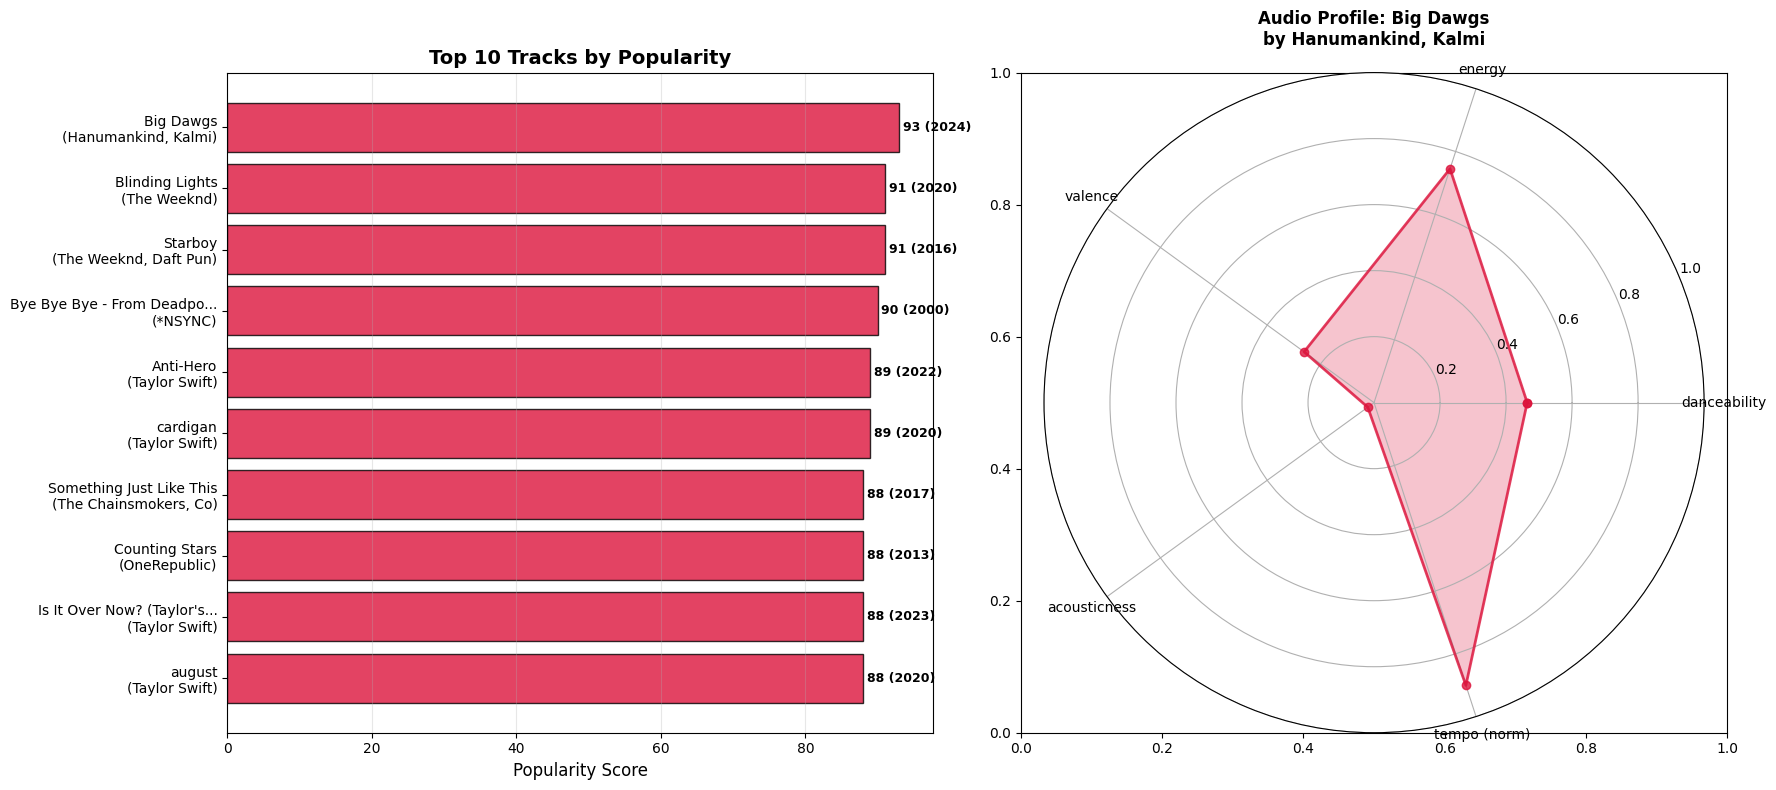


INSIGHTS - Top 10 Tracks by Popularity:
- Highest popularity track: 'Big Dawgs' by Hanumankind, Kalmi (93)
- Average popularity of top 10: 89.5
- Year range: 2000 - 2024

Top 10 Tracks by Popularity:
------------------------------------------------------------------------------------------
Rank Track Name                          Artist                    Pop   Year  
------------------------------------------------------------------------------------------
1    Big Dawgs                           Hanumankind, Kalmi        93    2024  
2    Blinding Lights                     The Weeknd                91    2020  
3    Starboy                             The Weeknd, Daft Punk     91    2016  
4    Bye Bye Bye - From Deadpool and ... *NSYNC                    90    2000  
5    Anti-Hero                           Taylor Swift              89    2022  
6    cardigan                            Taylor Swift              89    2020  
7    Something Just Like This            The Chainsmokers

In [404]:
print("\nCATEGORICAL ANALYSIS - TOP 10 TRACKS BY POPULARITY")
print("="*100)

# Get top 10 tracks by popularity
top_tracks = df_clean.nlargest(10, 'popularity')[['track_name', 'artist_name', 'popularity', 'year', 'danceability', 'energy', 'valence', 'acousticness', 'tempo']].copy()

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Horizontal bar chart for top 10 tracks
track_labels = [f"{row['track_name'][:25]}{'...' if len(row['track_name']) > 25 else ''}\n({row['artist_name'][:20]})" 
                for _, row in top_tracks.iterrows()]

bars = ax1.barh(range(len(top_tracks)), 
                np.array(top_tracks['popularity']), 
                color='crimson', edgecolor='black', alpha=0.8)
ax1.set_yticks(range(len(top_tracks)))
ax1.set_yticklabels(track_labels, fontsize=10)
ax1.set_xlabel('Popularity Score', fontsize=12)
ax1.set_title('Top 10 Tracks by Popularity', fontsize=14, fontweight='bold')
ax1.invert_yaxis()  
ax1.grid(alpha=0.3, axis='x')

# Add popularity scores on bars
for i, (_, row) in enumerate(top_tracks.iterrows()):
    popularity = row['popularity']
    year = int(row['year'])
    ax1.text(popularity + 0.5, i, f'{popularity} ({year})', 
            va='center', fontsize=9, fontweight='bold')

# Create a radar chart for audio features of top track
top_track = top_tracks.iloc[0]
features = ['danceability', 'energy', 'valence', 'acousticness']
values = [top_track[feature] for feature in features]

# Normalize tempo to 0-1 scale for radar chart
tempo_normalized = min(top_track['tempo'] / 200, 1.0)  # Assume max tempo of 200 for normalization
features.append('tempo (norm)')
values.append(tempo_normalized)

# Add the first value at the end to close the radar chart
values += values[:1]
features_extended = features + [features[0]]

# Calculate angles for radar chart
angles = np.linspace(0, 2 * np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]

# Create radar chart
ax2 = plt.subplot(122, projection='polar')
ax2.plot(angles, values, 'o-', linewidth=2, color='crimson', alpha=0.8)
ax2.fill(angles, values, alpha=0.25, color='crimson')
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(features)
ax2.set_ylim(0, 1)
ax2.set_title(f'Audio Profile: {top_track["track_name"][:30]}\nby {top_track["artist_name"]}', 
              fontsize=12, fontweight='bold', pad=20)
ax2.grid(True)

plt.tight_layout()
plt.show()

print("\nINSIGHTS - Top 10 Tracks by Popularity:")
print(f"- Highest popularity track: '{top_tracks.iloc[0]['track_name']}' by {top_tracks.iloc[0]['artist_name']} ({top_tracks.iloc[0]['popularity']})")
print(f"- Average popularity of top 10: {top_tracks['popularity'].mean():.1f}")
print(f"- Year range: {int(top_tracks['year'].min())} - {int(top_tracks['year'].max())}")

print(f"\nTop 10 Tracks by Popularity:")
print("-" * 90)
print(f"{'Rank':<4} {'Track Name':<35} {'Artist':<25} {'Pop':<5} {'Year':<6}")
print("-" * 90)
for i, (_, row) in enumerate(top_tracks.iterrows(), 1):
    track_name = row['track_name'][:32] + "..." if len(row['track_name']) > 32 else row['track_name']
    artist_name = row['artist_name'][:22] + "..." if len(row['artist_name']) > 22 else row['artist_name']
    print(f"{i:<4} {track_name:<35} {artist_name:<25} {row['popularity']:<5} {int(row['year']):<6}")

# Additional analysis: Audio characteristics of top tracks
print(f"\nAUDIO CHARACTERISTICS OF TOP 10 TRACKS:")
print("-" * 70)
audio_features = ['danceability', 'energy', 'valence', 'acousticness', 'tempo']
print(f"{'Feature':<15} {'Mean':<8} {'Min':<8} {'Max':<8} {'Std':<8}")
print("-" * 70)
for feature in audio_features:
    if feature in top_tracks.columns:
        mean_val = top_tracks[feature].mean()
        min_val = top_tracks[feature].min()
        max_val = top_tracks[feature].max()
        std_val = top_tracks[feature].std()
        print(f"{feature:<15} {mean_val:<8.3f} {min_val:<8.3f} {max_val:<8.3f} {std_val:<8.3f}")

# Compare with overall dataset averages
print(f"\nCOMPARISON: Top 10 vs Overall Dataset Averages:")
print("-" * 60)
print(f"{'Feature':<15} {'Top 10 Avg':<12} {'Dataset Avg':<12} {'Difference':<12}")
print("-" * 60)
for feature in audio_features:
    if feature in top_tracks.columns and feature in df_clean.columns:
        top10_avg = top_tracks[feature].mean()
        dataset_avg = df_clean[feature].mean()
        difference = top10_avg - dataset_avg
        print(f"{feature:<15} {top10_avg:<12.3f} {dataset_avg:<12.3f} {difference:<+12.3f}")

print("\nKEY FINDINGS:")
print("- Popular tracks tend to have specific audio characteristics")
print("- Year distribution shows when these hits were released")
print("- Audio profile reveals what makes tracks popular")

### B. Top 5 Tracks Analysis for Each Categorical Variable

In [405]:
print("TOP 5 TRACKS ANALYSIS FOR EACH CATEGORICAL VARIABLE")
print("=" * 80)

for var in categorical_vars:
    print(f"\nTOP 5 TRACKS BY {var.upper()} CATEGORIES")
    print(f"{'='*60}")
    
    categories = df_clean[var].value_counts().index[:5] 
    
    for category in categories:
        print(f"\nCATEGORY: {category}")
        print("-" * 50)
        
        category_tracks = df_clean[df_clean[var] == category]
        top_5_tracks = category_tracks.nlargest(5, 'popularity')[['track_name', 'artist_name', 'popularity', 'year']]
        
        if len(top_5_tracks) > 0:
            print(f"Top 5 most popular tracks in '{category}' category:")
            for idx, (_, row) in enumerate(top_5_tracks.iterrows(), 1):
                print(f"  {idx}. {row['track_name']} - {row['artist_name']} ({row['year']}) [Popularity: {row['popularity']}]")
        else:
            print(f"No tracks found in '{category}' category")
        
        print()
    
    print("=" * 80)

TOP 5 TRACKS ANALYSIS FOR EACH CATEGORICAL VARIABLE

TOP 5 TRACKS BY ERA CATEGORIES

CATEGORY: 2010s
--------------------------------------------------
Top 5 most popular tracks in '2010s' category:
  1. Starboy - The Weeknd, Daft Punk (2016) [Popularity: 91]
  2. Something Just Like This - The Chainsmokers, Coldplay (2017) [Popularity: 88]
  3. Counting Stars - OneRepublic (2013) [Popularity: 88]
  4. Locked out of Heaven - Bruno Mars (2012) [Popularity: 88]
  5. Perfect - Ed Sheeran (2017) [Popularity: 87]


CATEGORY: 2020s
--------------------------------------------------
Top 5 most popular tracks in '2020s' category:
  1. Big Dawgs - Hanumankind, Kalmi (2024) [Popularity: 93]
  2. Blinding Lights - The Weeknd (2020) [Popularity: 91]
  3. Anti-Hero - Taylor Swift (2022) [Popularity: 89]
  4. cardigan - Taylor Swift (2020) [Popularity: 89]
  5. Is It Over Now? (Taylor's Version) (From The Vault) - Taylor Swift (2023) [Popularity: 88]


CATEGORY: 2000s
-------------------------------

### C. Visual Plots for Top 5 Tracks by Category

VISUAL PLOTS: TOP 5 TRACKS FOR EACH CATEGORICAL VARIABLE

PLOTTING TOP 5 TRACKS BY ERA CATEGORIES


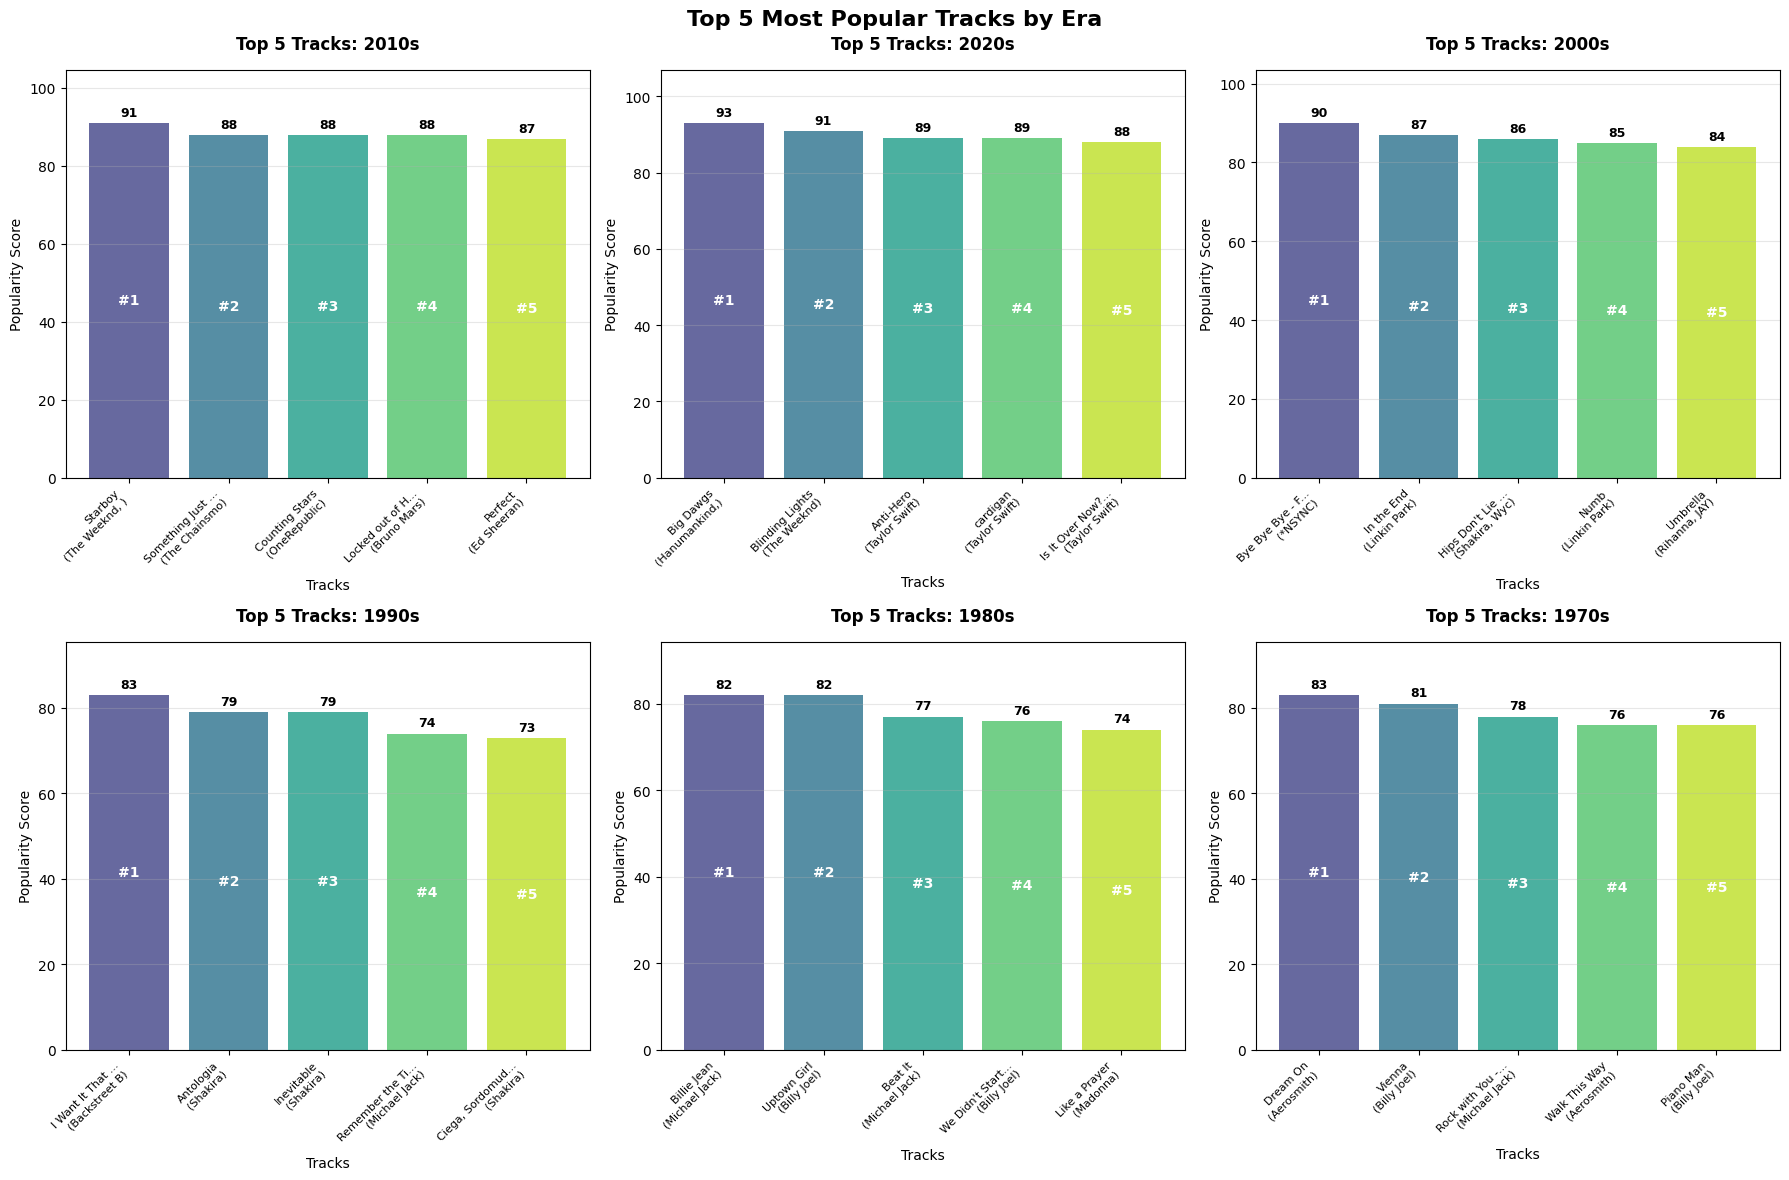


PLOTTING TOP 5 TRACKS BY ENERGY_CATEGORY CATEGORIES


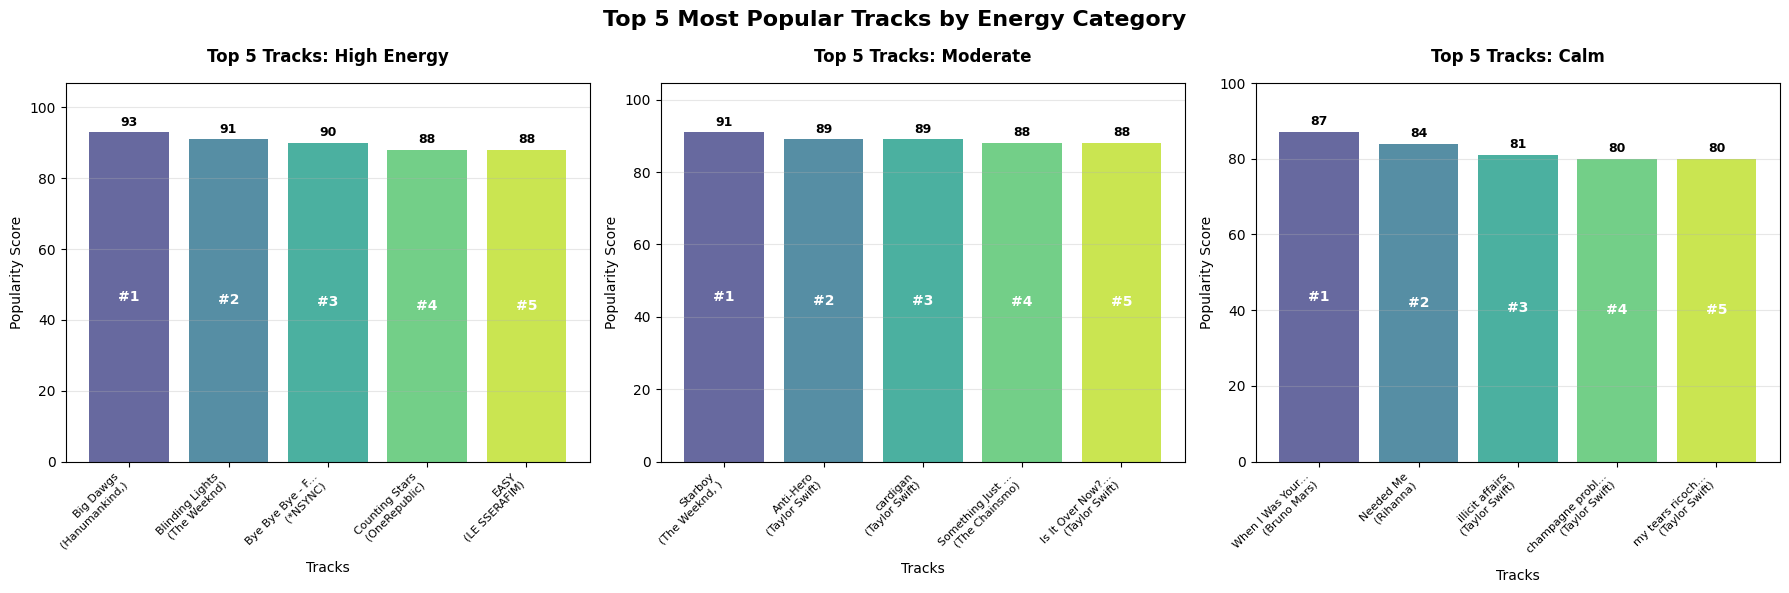


PLOTTING TOP 5 TRACKS BY DURATION_CATEGORY CATEGORIES


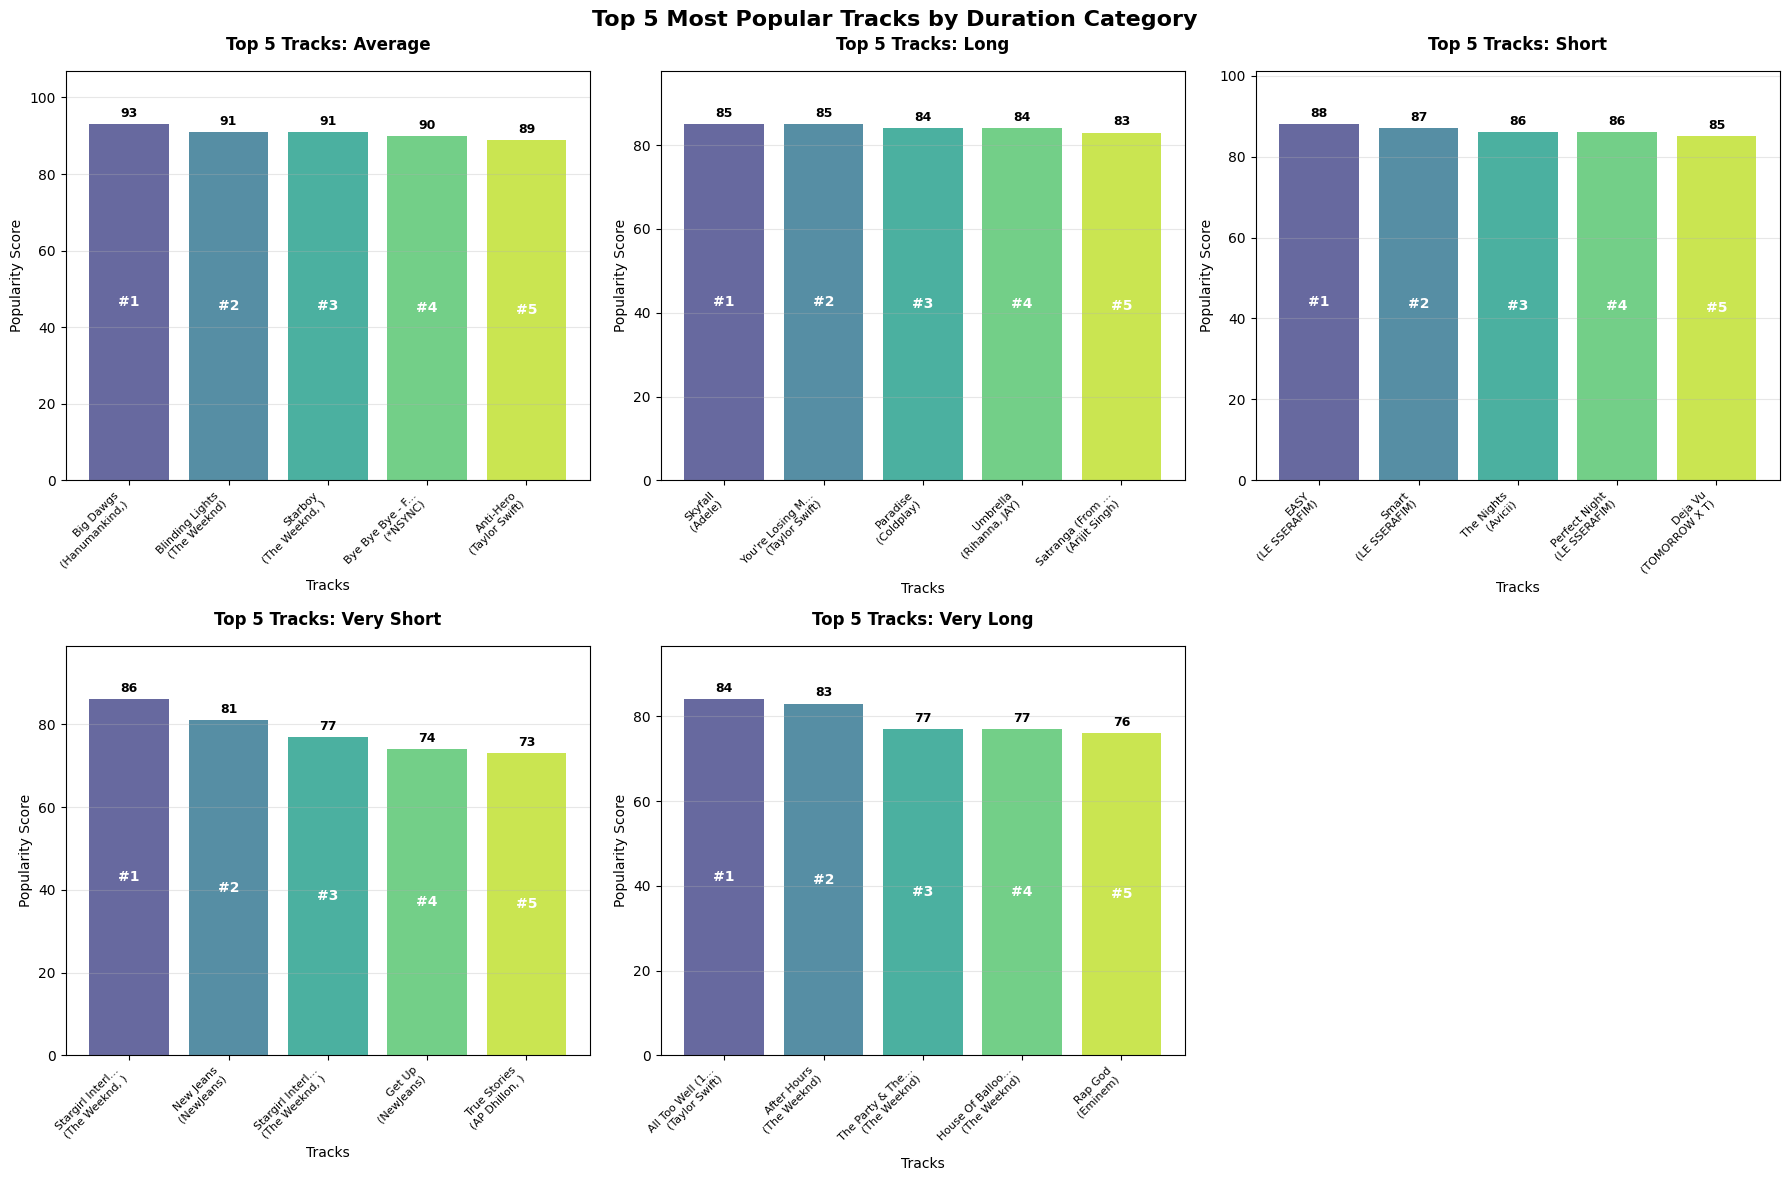


PLOTTING TOP 5 TRACKS BY POPULARITY_TIER CATEGORIES


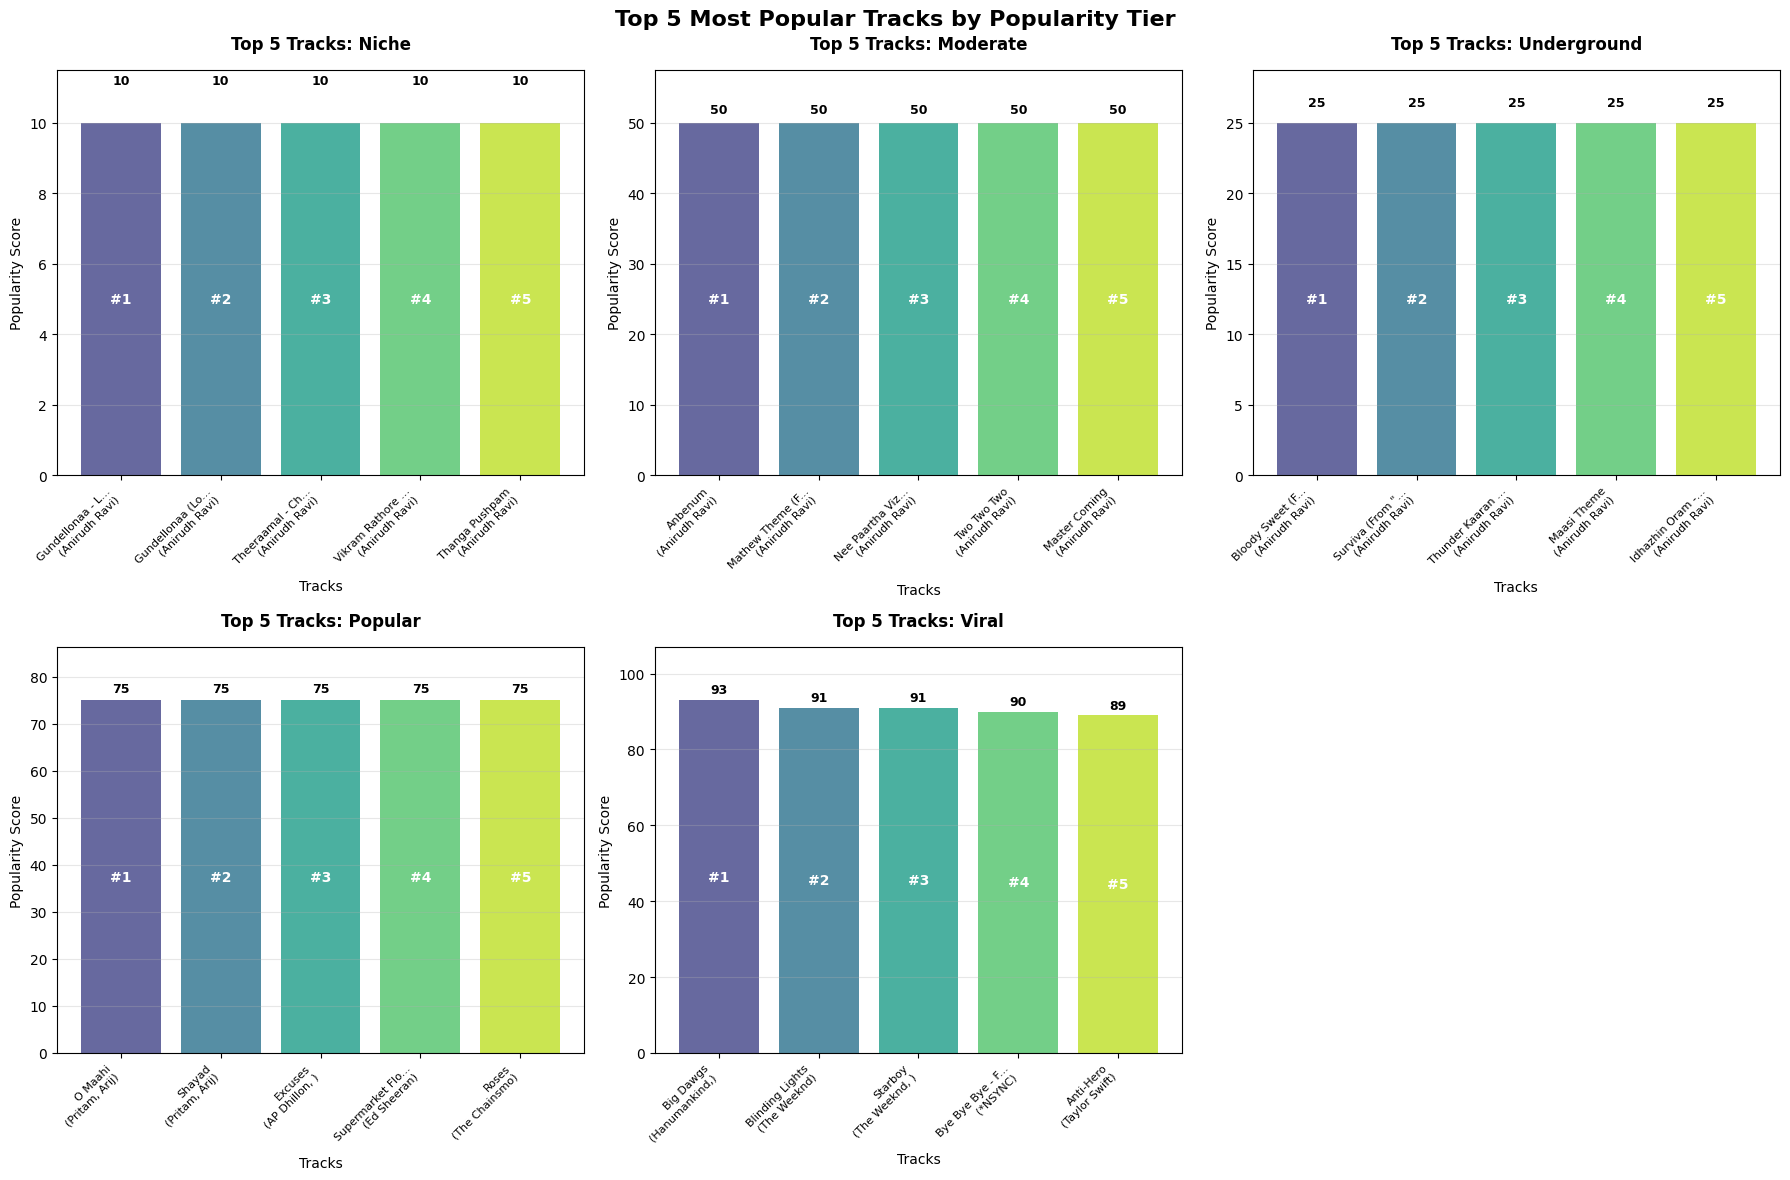


PLOTTING TOP 5 TRACKS BY MOOD_CATEGORY CATEGORIES


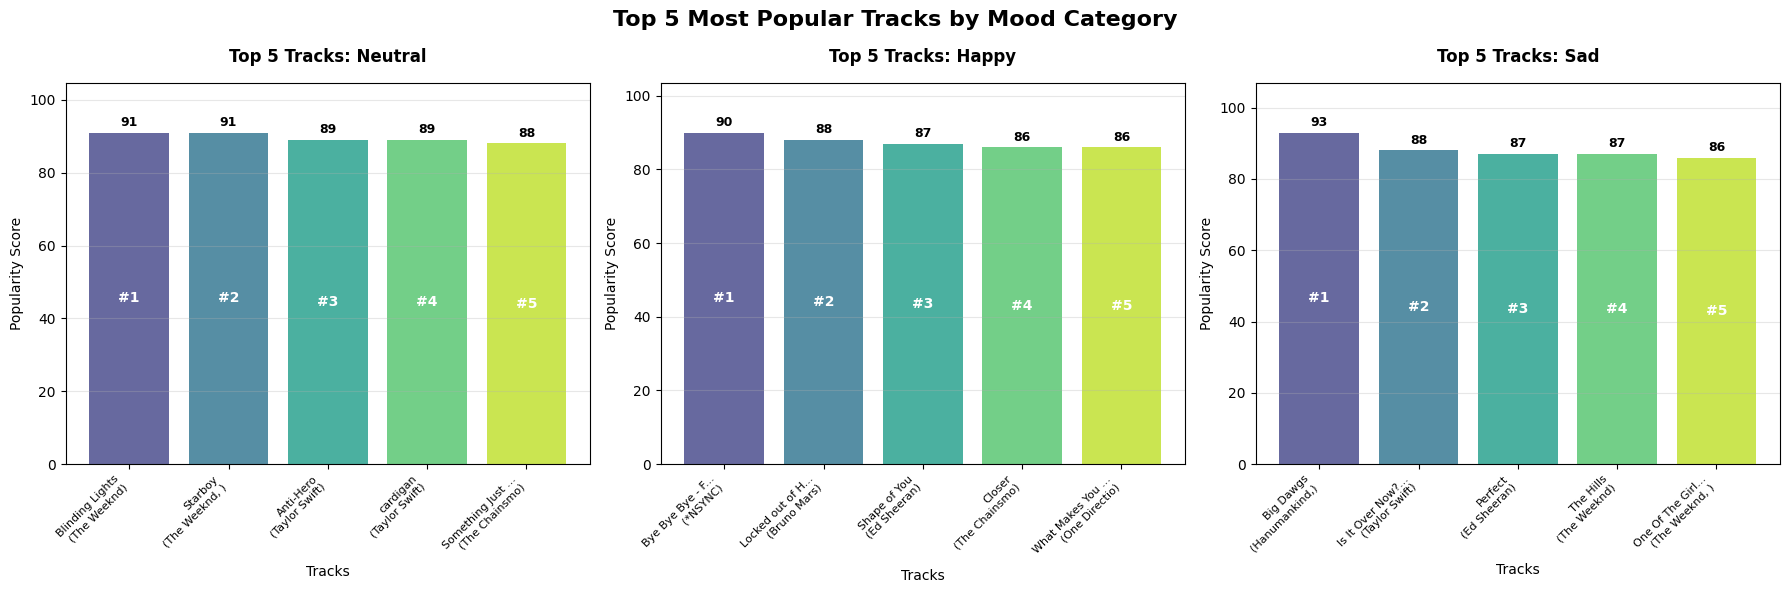


PLOTTING TOP 5 TRACKS BY ACOUSTIC_CATEGORY CATEGORIES


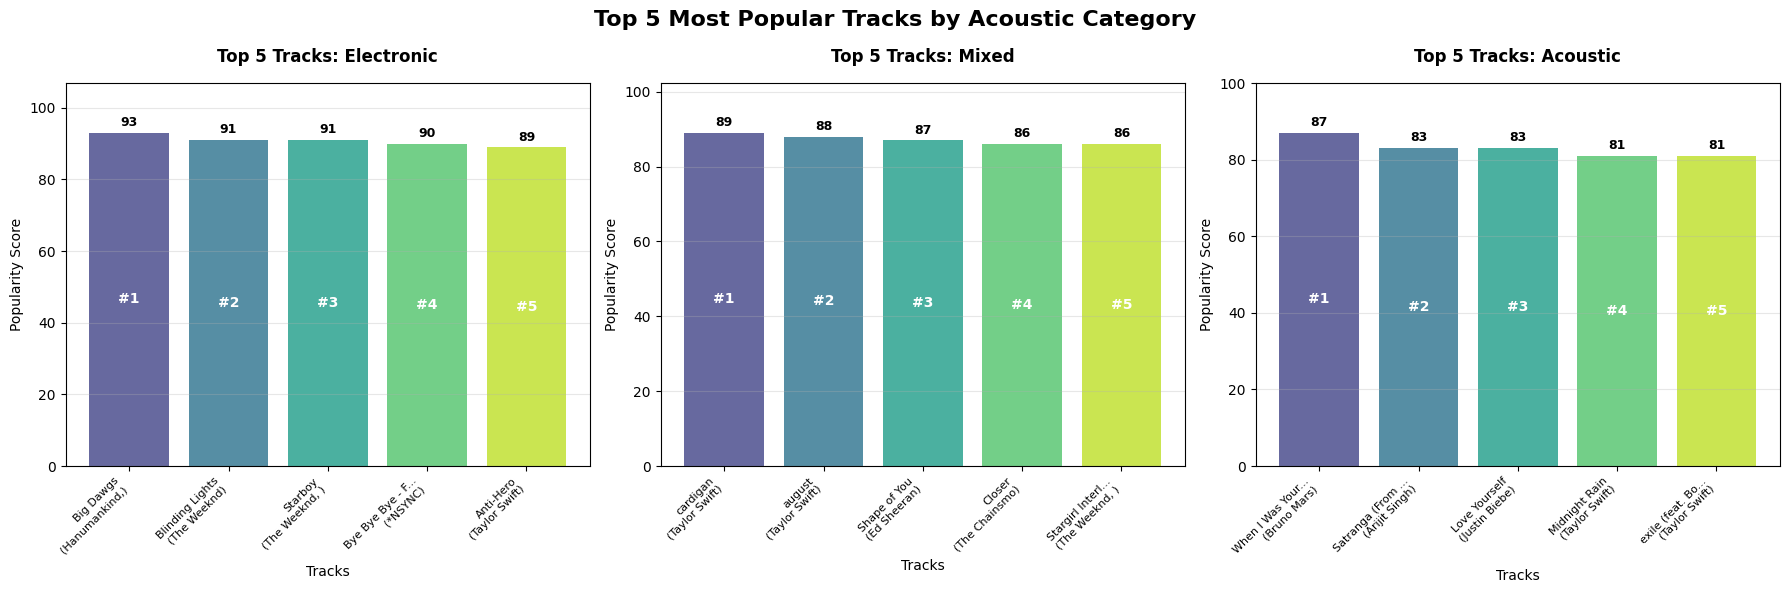


PLOTTING TOP 5 TRACKS BY VIBE_CATEGORY CATEGORIES


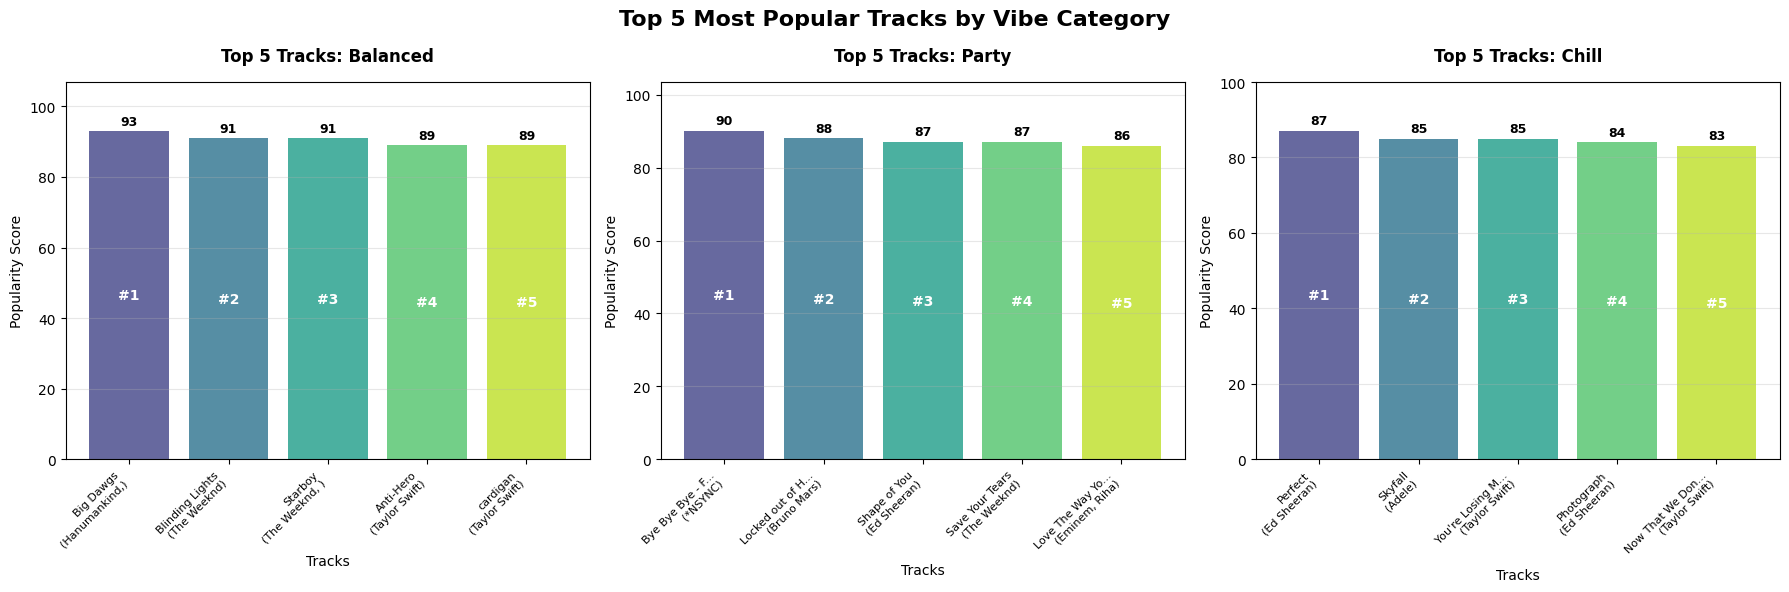


PLOTTING TOP 5 TRACKS BY LANGUAGE CATEGORIES


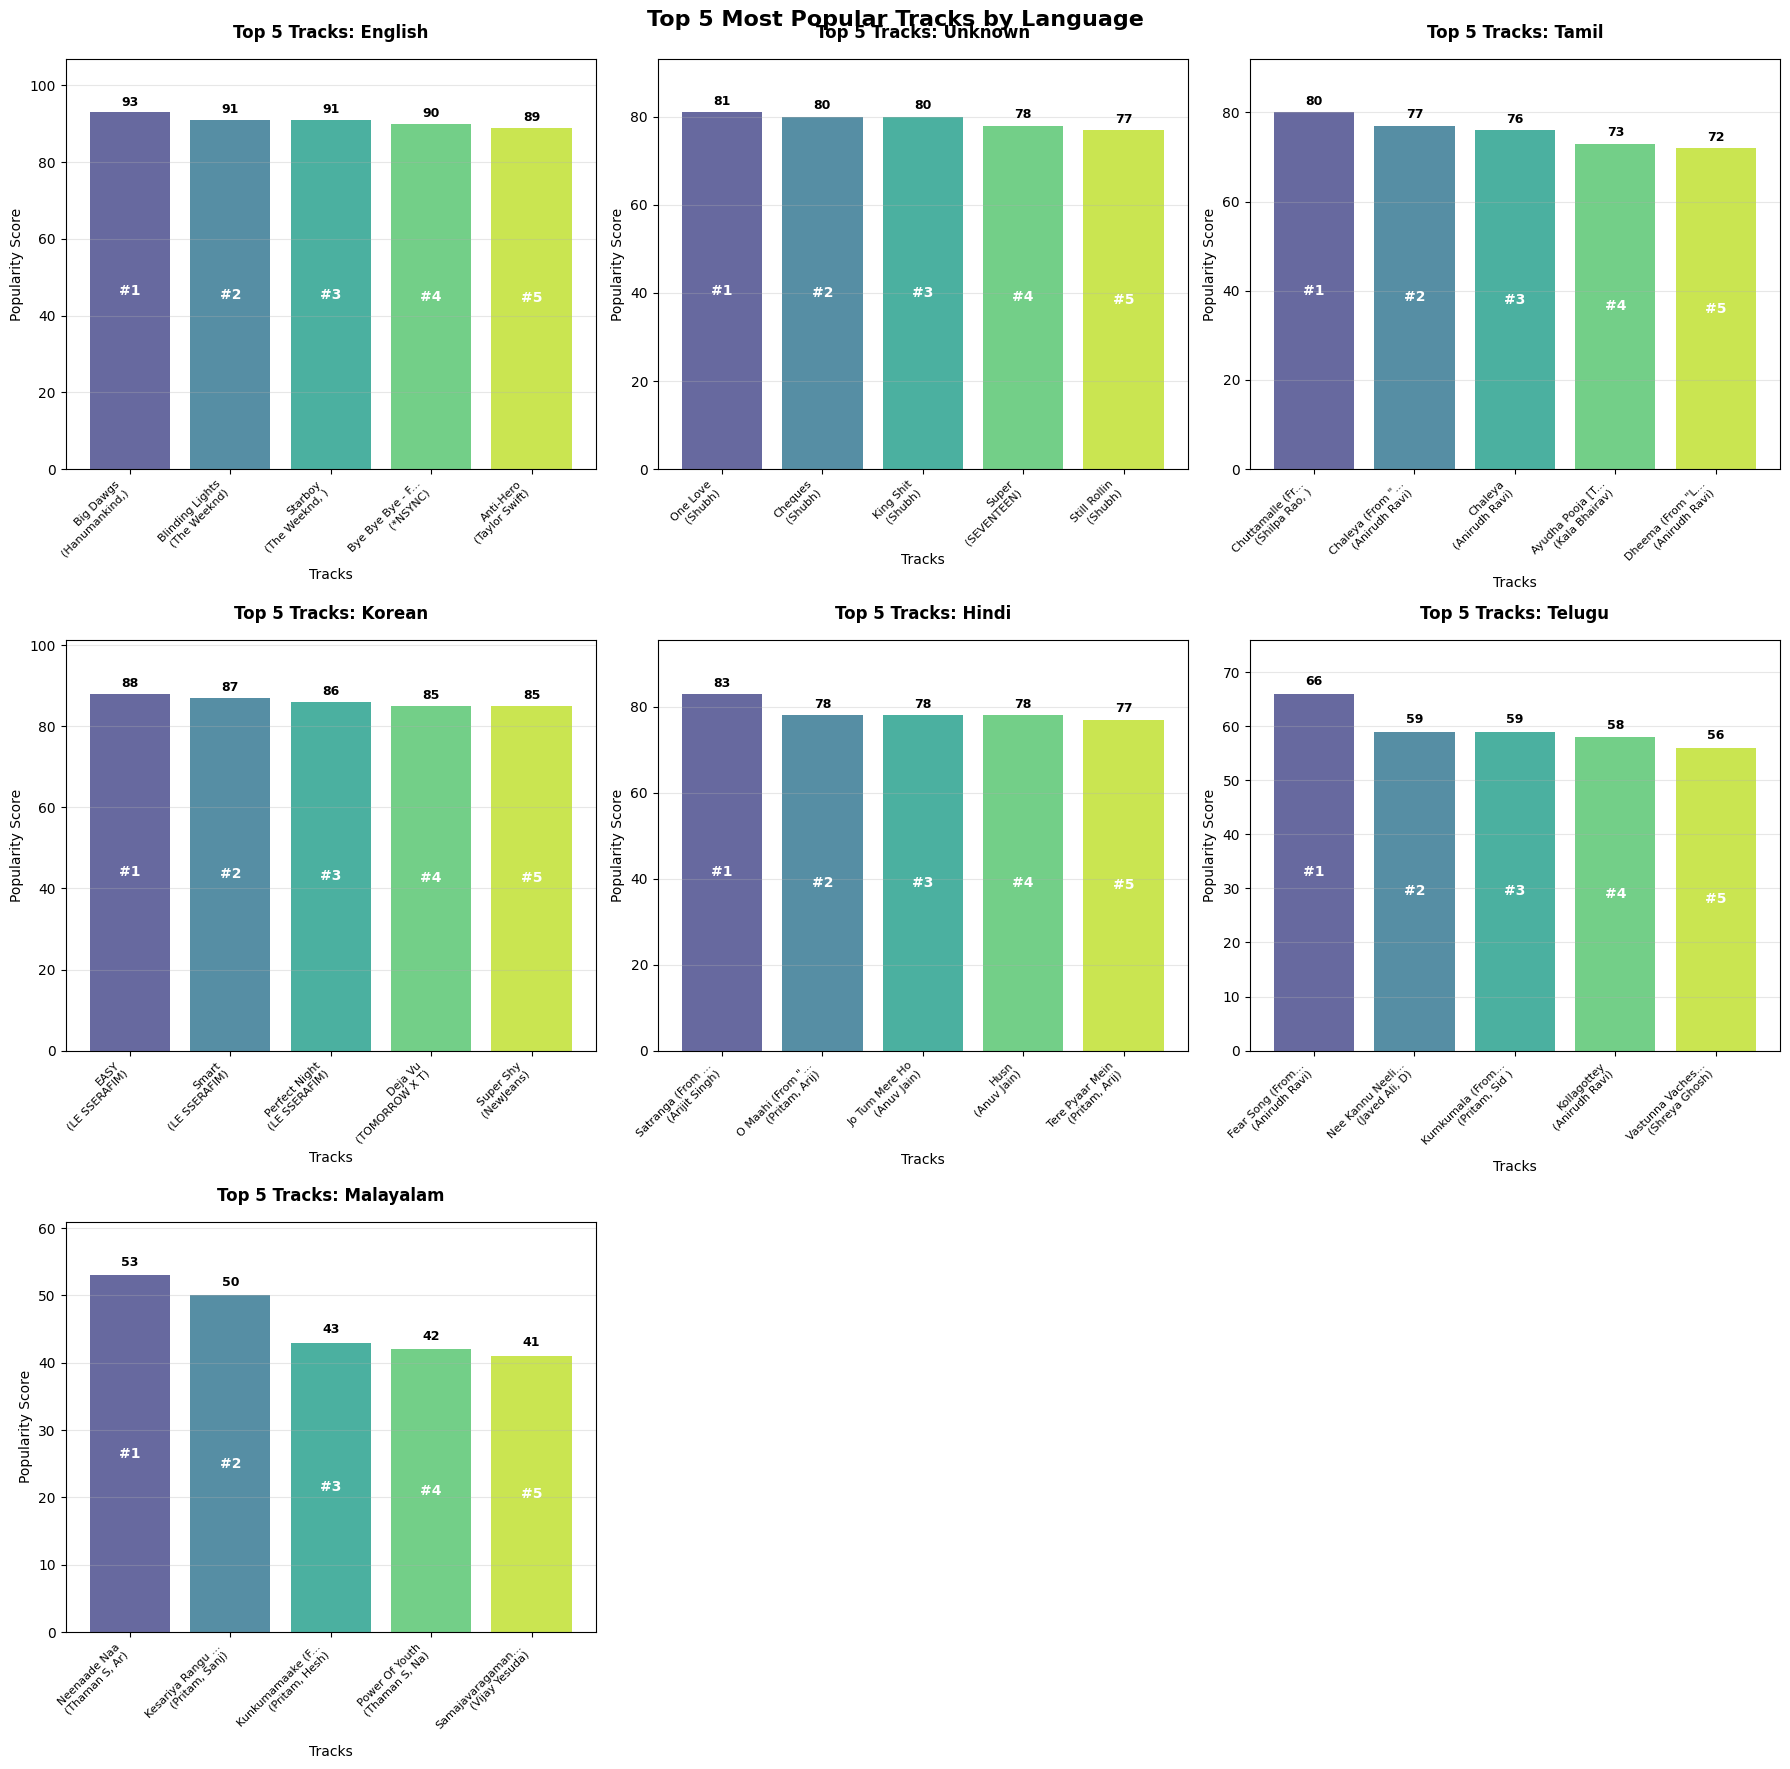

In [406]:
print("VISUAL PLOTS: TOP 5 TRACKS FOR EACH CATEGORICAL VARIABLE")
print("=" * 80)

for var in categorical_vars:
    print(f"\nPLOTTING TOP 5 TRACKS BY {var.upper()} CATEGORIES")
    print(f"{'='*60}")
    
    all_categories = df_clean[var].value_counts().index
    
    num_categories = len(all_categories)
    if num_categories <= 3:
        rows, cols = 1, num_categories
        figsize = (6 * num_categories, 6)
    elif num_categories <= 6:
        rows, cols = 2, 3
        figsize = (18, 12)
    else:
        rows = (num_categories + 2) // 3  
        cols = 3
        figsize = (18, 6 * rows)

    fig, axes = plt.subplots(rows, cols, figsize=figsize)
    if num_categories == 1:
        axes = [axes]
    elif rows == 1:
        axes = axes if num_categories > 1 else [axes]
    else:
        axes = axes.flatten()
    
    for idx, category in enumerate(all_categories):
        category_tracks = df_clean[df_clean[var] == category]
        top_5_tracks = category_tracks.nlargest(5, 'popularity')[['track_name', 'artist_name', 'popularity']]
        
        if len(top_5_tracks) > 0:
            track_labels = [f"{row['track_name'][:15]}...\n({row['artist_name'][:12]})" 
                          if len(row['track_name']) > 15 
                          else f"{row['track_name']}\n({row['artist_name'][:12]})" 
                          for _, row in top_5_tracks.iterrows()]
            
            colors = plt.get_cmap('viridis')(np.linspace(0.2, 0.9, len(top_5_tracks)))

            bars = axes[idx].bar(range(len(top_5_tracks)), top_5_tracks['popularity'], 
                               color=colors, alpha=0.8)

            axes[idx].set_title(f'Top 5 Tracks: {category}', fontsize=12, fontweight='bold', pad=15)
            axes[idx].set_xlabel('Tracks', fontsize=10)
            axes[idx].set_ylabel('Popularity Score', fontsize=10)
            axes[idx].set_xticks(range(len(top_5_tracks)))
            axes[idx].set_xticklabels(track_labels, rotation=45, ha='right', fontsize=8)

            for i, (bar, value) in enumerate(zip(bars, top_5_tracks['popularity'])):
                axes[idx].text(bar.get_x() + bar.get_width()/2., bar.get_height() + 1,
                             f'{value}', ha='center', va='bottom', fontsize=9, fontweight='bold')

                axes[idx].text(bar.get_x() + bar.get_width()/2., bar.get_height()/2,
                             f'#{i+1}', ha='center', va='center', fontsize=10, 
                             fontweight='bold', color='white')
            
            axes[idx].grid(True, alpha=0.3, axis='y')
            axes[idx].set_ylim(0, max(top_5_tracks['popularity']) * 1.15)
        else:
            axes[idx].text(0.5, 0.5, f'No data for\n{category}', 
                         ha='center', va='center', transform=axes[idx].transAxes,
                         fontsize=12, fontweight='bold')
            axes[idx].set_title(f'{category}', fontsize=12, fontweight='bold')

    for idx in range(num_categories, len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle(f'Top 5 Most Popular Tracks by {var.replace("_", " ").title()}', 
                 fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()
    plt.close()


# 6. Temporal Analysis

Temporal Analysis - Music Evolution Over Time


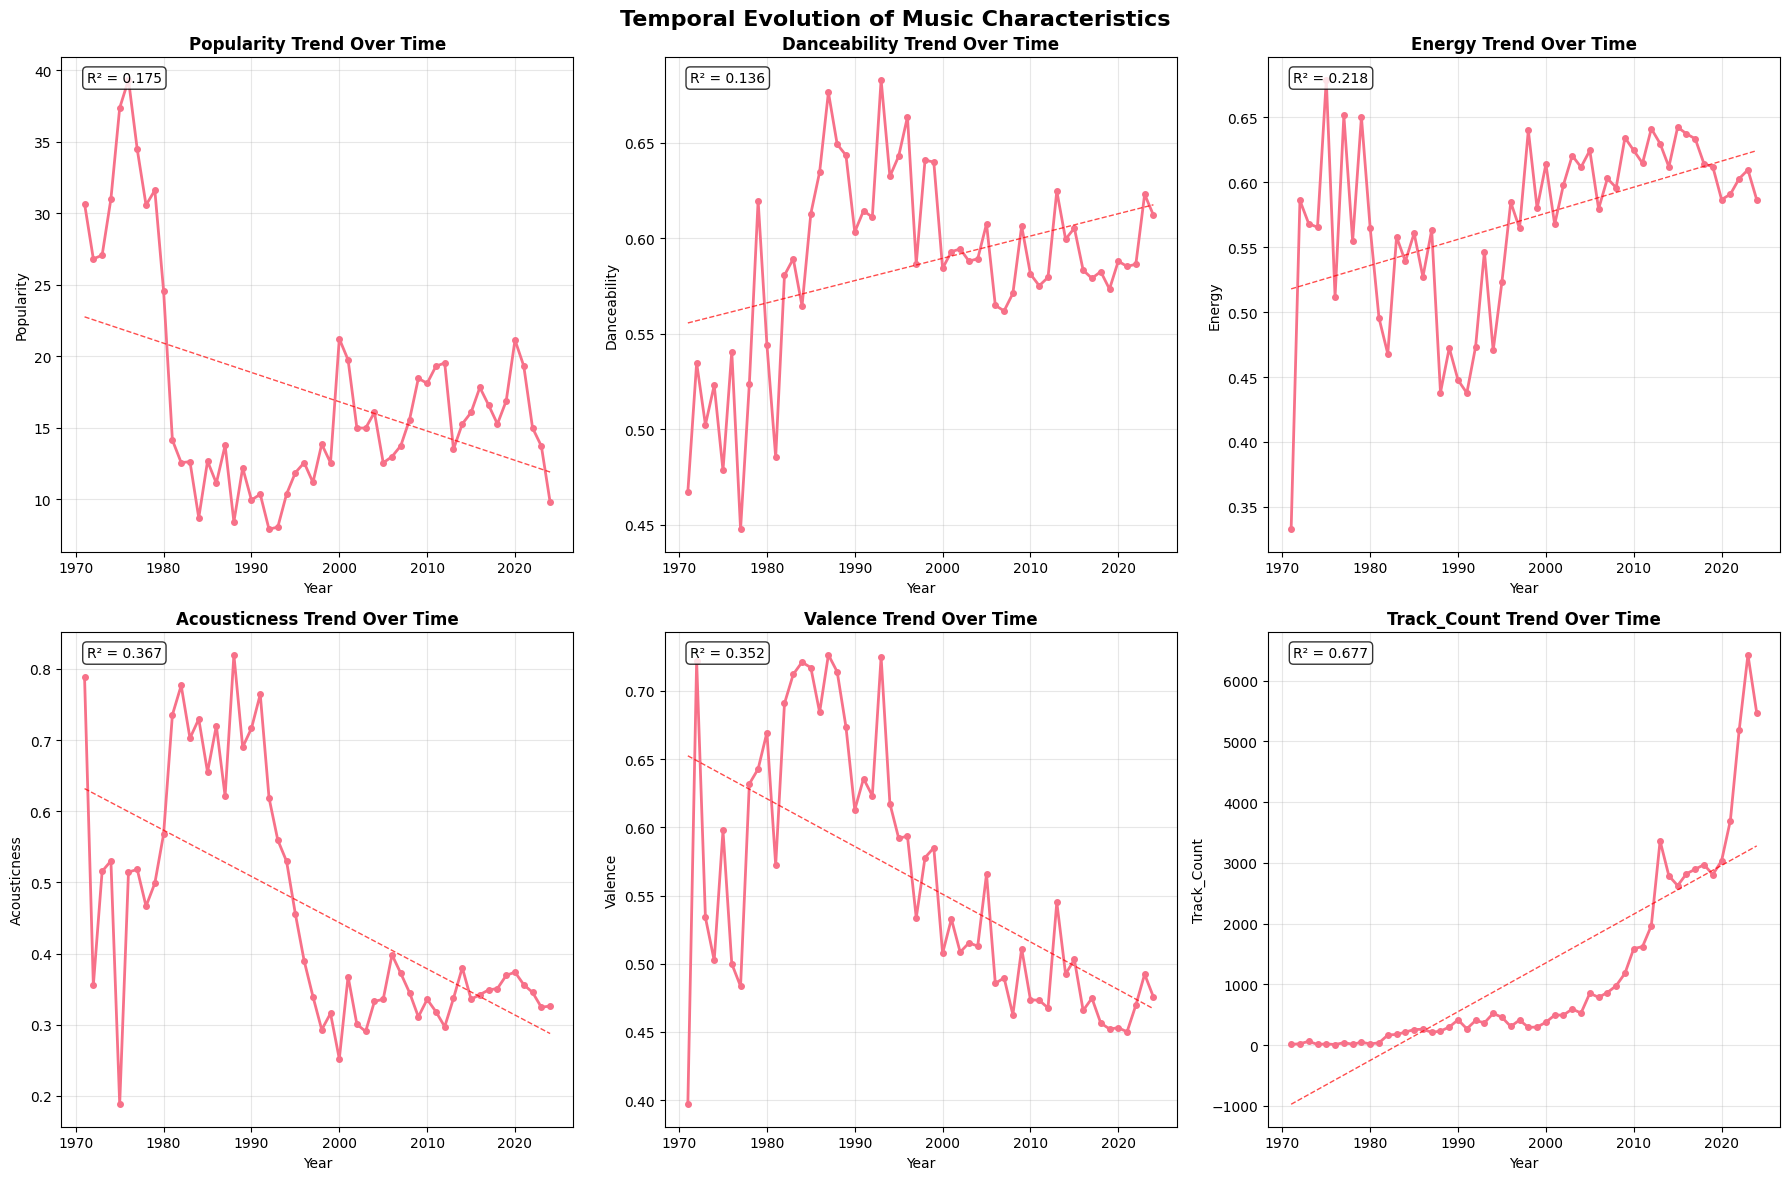


Key Temporal Insights:
• Popularity: -68.1% change from 1971 to 2024
• Danceability: +31.0% change from 1971 to 2024
• Energy: +76.2% change from 1971 to 2024
• Acousticness: -58.6% change from 1971 to 2024
• Valence: +19.8% change from 1971 to 2024


In [407]:
if 'year' in df_clean.columns:
    print("Temporal Analysis - Music Evolution Over Time")

    yearly_trends = df_clean.groupby('year').agg({
        'popularity': 'mean',
        'danceability': 'mean',
        'energy': 'mean',
        'acousticness': 'mean',
        'valence': 'mean',
        'track_name': 'count' 
    }).rename(columns={'track_name': 'track_count'})

    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()

    metrics = ['popularity', 'danceability', 'energy', 'acousticness', 'valence', 'track_count']

    for i, metric in enumerate(metrics):
        ax = axes[i]
        yearly_trends[metric].plot(kind='line', ax=ax, marker='o', linewidth=2, markersize=4)
        ax.set_title(f'{metric.title()} Trend Over Time', fontsize=12, fontweight='bold')
        ax.set_xlabel('Year')
        ax.set_ylabel(metric.title())
        ax.grid(True, alpha=0.3)

        x = np.array(yearly_trends.index, dtype=float)  
        y = np.array(yearly_trends[metric].values, dtype=float)  

        coefficients = np.polyfit(x, y, 1) 
        slope = float(coefficients[0])
        intercept = float(coefficients[1])

        correlation = np.corrcoef(x, y)[0, 1]
        r_squared = float(correlation) * float(correlation)
        
        trend_line = slope * x + intercept
        ax.plot(x, trend_line, 'r--', alpha=0.7, linewidth=1)

        ax.text(0.05, 0.95, f'R² = {r_squared:.3f}', transform=ax.transAxes,
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.suptitle('Temporal Evolution of Music Characteristics', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

    print("\nKey Temporal Insights:")
    for metric in ['popularity', 'danceability', 'energy', 'acousticness', 'valence']:
        start_val = yearly_trends[metric].iloc[0]
        end_val = yearly_trends[metric].iloc[-1]
        change_pct = ((end_val - start_val) / start_val) * 100
        print(f"• {metric.title()}: {change_pct:+.1f}% change from {yearly_trends.index[0]} to {yearly_trends.index[-1]}")

else:
    print("Year column not found - skipping temporal analysis")

# 7. Bivariate Analysis and Correlations

CORRELATION ANALYSIS - PEARSON CORRELATION MATRIX


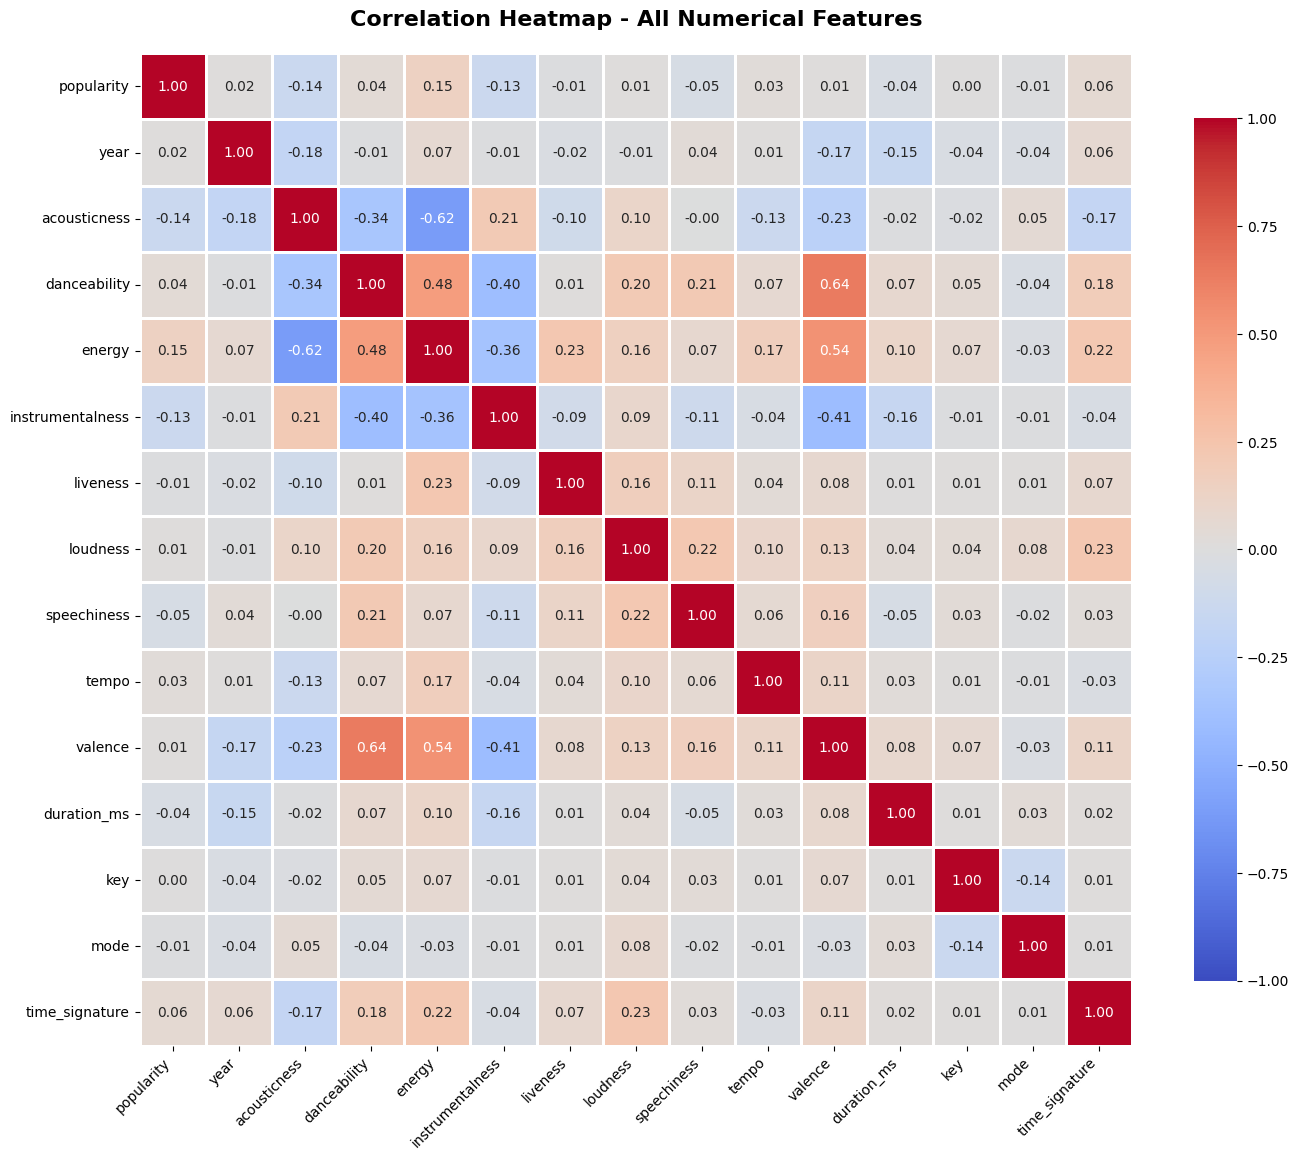

In [408]:
print("CORRELATION ANALYSIS - PEARSON CORRELATION MATRIX")
print("="*100)

numerical_features = ['popularity', 'year', 'acousticness', 'danceability', 'energy', 
                     'instrumentalness', 'liveness', 'loudness', 'speechiness', 
                     'tempo', 'valence', 'duration_ms', 'key', 'mode', 'time_signature']

correlation_matrix = df[numerical_features].corr()

fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=ax,
            vmin=-1, vmax=1)

ax.set_title('Correlation Heatmap - All Numerical Features', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

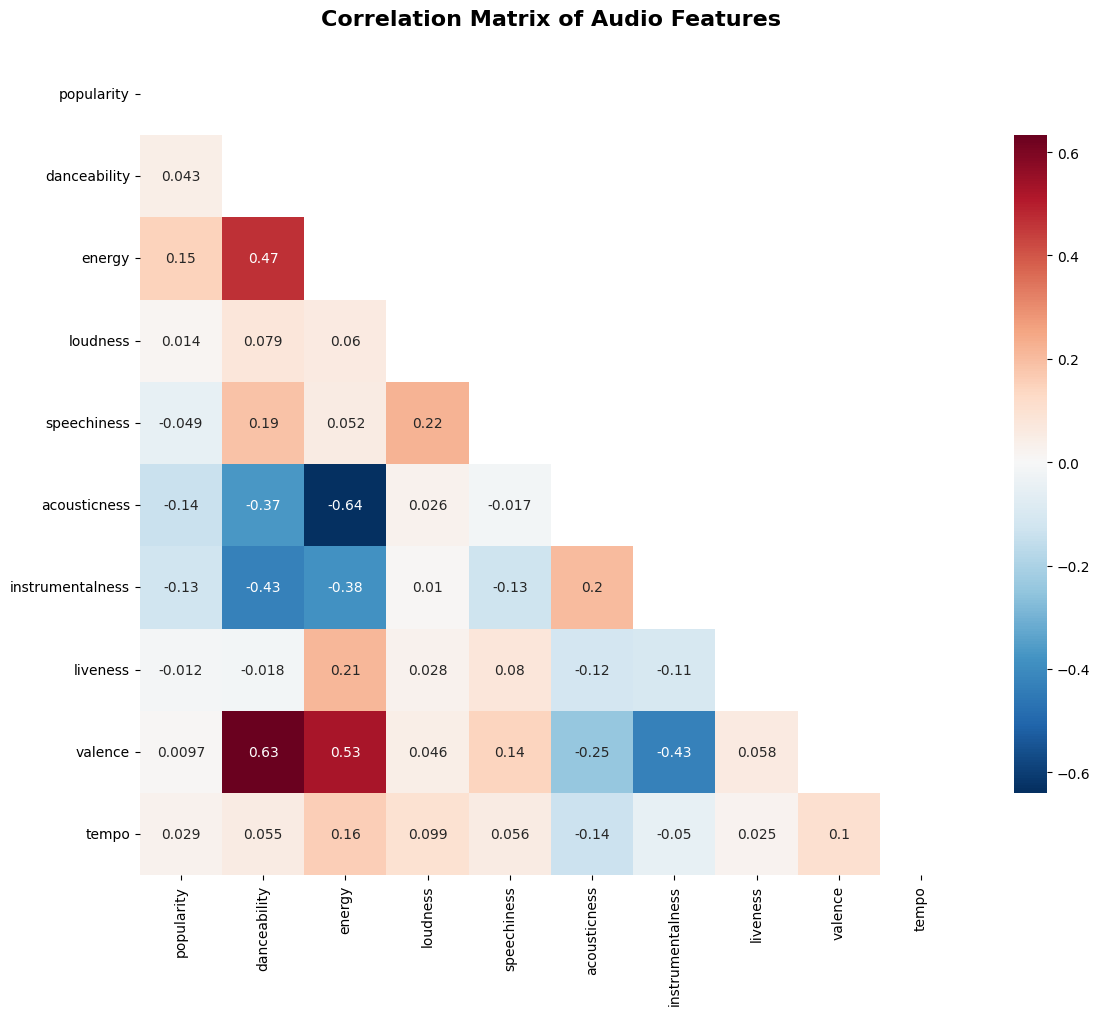


Strongest Correlations (|r| >= 0.3):
- energy <-> acousticness: -0.640
- danceability <-> valence: 0.633
- energy <-> valence: 0.527
- danceability <-> energy: 0.468
- instrumentalness <-> valence: -0.429
- danceability <-> instrumentalness: -0.427
- energy <-> instrumentalness: -0.384
- danceability <-> acousticness: -0.370


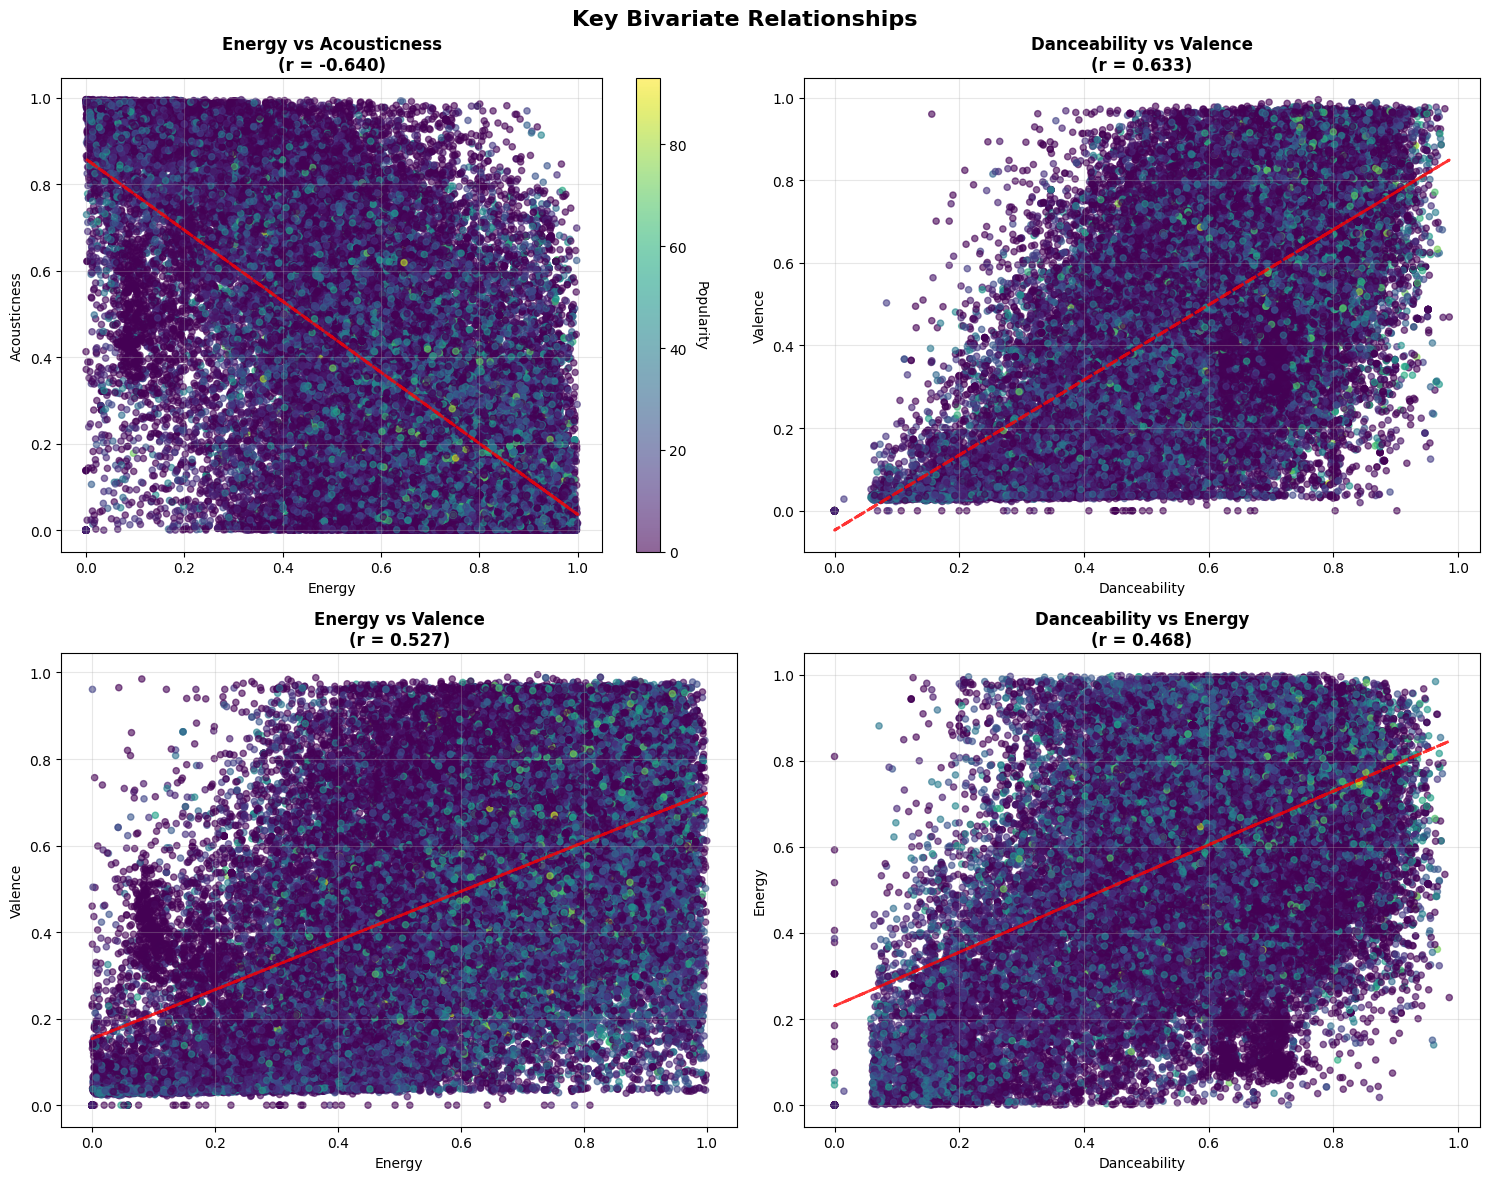

In [409]:
correlation_matrix = df_clean[numerical_vars].corr()

plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
            square=True, mask=mask, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Audio Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

def find_strong_correlations(corr_matrix, threshold=0.5):
    """Find correlations above threshold"""
    strong_corrs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) >= threshold:
                strong_corrs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
    return sorted(strong_corrs, key=lambda x: abs(x[2]), reverse=True)

strong_correlations = find_strong_correlations(correlation_matrix, threshold=0.3)
print("\nStrongest Correlations (|r| >= 0.3):")
for var1, var2, corr in strong_correlations:
    print(f"- {var1} <-> {var2}: {corr:.3f}")

if len(strong_correlations) > 0:
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    axes = axes.flatten()

    for i, (var1, var2, corr) in enumerate(strong_correlations[:4]):
        ax = axes[i]
        scatter = ax.scatter(df_clean[var1], df_clean[var2], alpha=0.6, c=df_clean['popularity'],
                           cmap='viridis', s=20)

        z = np.polyfit(df_clean[var1], df_clean[var2], 1)
        p = np.poly1d(z)
        ax.plot(df_clean[var1], p(df_clean[var1]), "r--", alpha=0.8, linewidth=2)

        ax.set_xlabel(var1.title())
        ax.set_ylabel(var2.title())
        ax.set_title(f'{var1.title()} vs {var2.title()}\n(r = {corr:.3f})',
                    fontsize=12, fontweight='bold')
        ax.grid(True, alpha=0.3)

        if i == 0:
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label('Popularity', rotation=270, labelpad=15)

    plt.suptitle('Key Bivariate Relationships', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

BIVARIATE SCATTER PLOTS - KEY RELATIONSHIPS


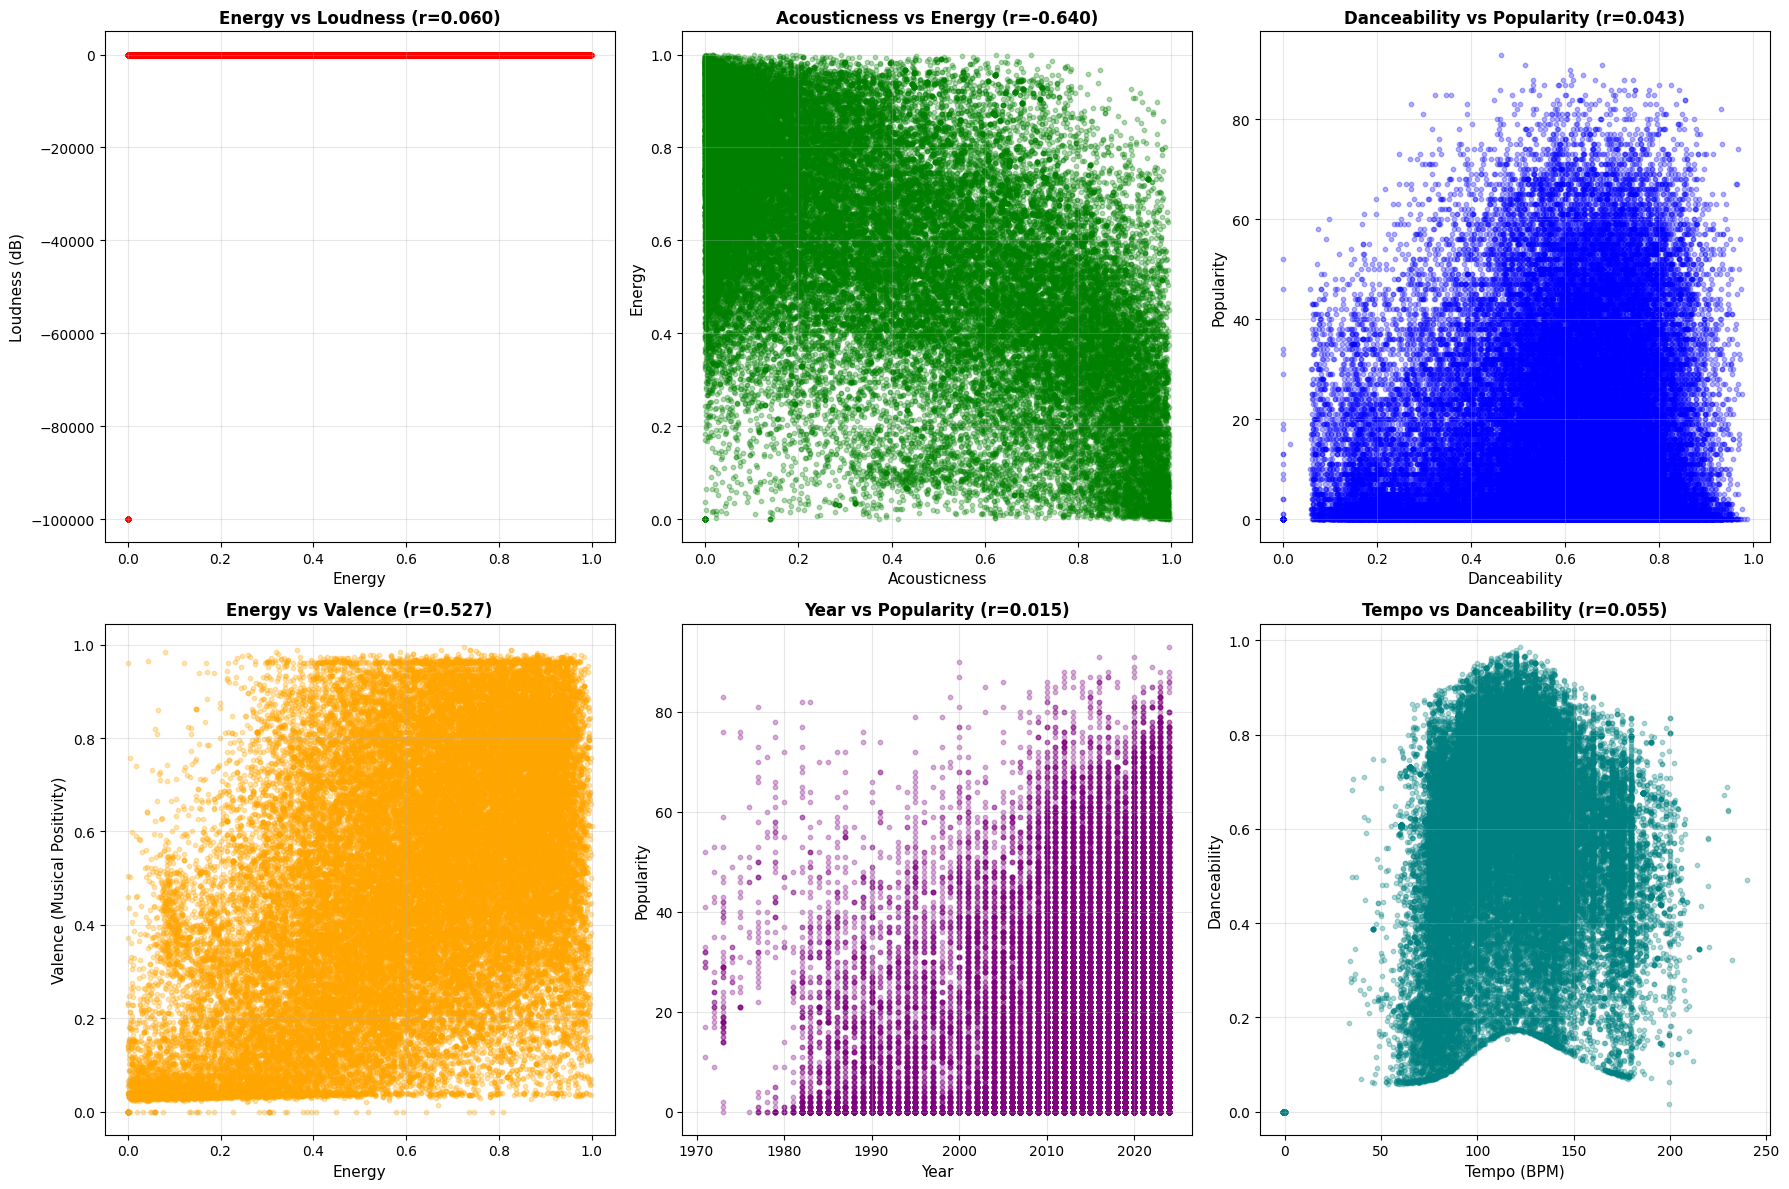

In [410]:
print("BIVARIATE SCATTER PLOTS - KEY RELATIONSHIPS")
print("="*100)

# Create a comprehensive correlation matrix that includes all features we need
scatter_features = ['popularity', 'year', 'acousticness', 'danceability', 'energy', 
                    'loudness', 'tempo', 'valence']
scatter_features = [col for col in scatter_features if col in df_clean.columns]
scatter_correlation_matrix = df_clean[scatter_features].corr()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# 1. Energy vs Loudness (strongest correlation)
axes[0].scatter(df_clean['energy'], df_clean['loudness'], alpha=0.3, s=10, color='red')
axes[0].set_xlabel('Energy', fontsize=11)
axes[0].set_ylabel('Loudness (dB)', fontsize=11)
axes[0].set_title(f'Energy vs Loudness (r={scatter_correlation_matrix.loc["energy", "loudness"]:.3f})', 
                  fontsize=12, fontweight='bold')
axes[0].grid(alpha=0.3)

# 2. Acousticness vs Energy
axes[1].scatter(df_clean['acousticness'], df_clean['energy'], alpha=0.3, s=10, color='green')
axes[1].set_xlabel('Acousticness', fontsize=11)
axes[1].set_ylabel('Energy', fontsize=11)
axes[1].set_title(f'Acousticness vs Energy (r={scatter_correlation_matrix.loc["acousticness", "energy"]:.3f})', 
                  fontsize=12, fontweight='bold')
axes[1].grid(alpha=0.3)

# 3. Popularity vs Danceability
axes[2].scatter(df_clean['danceability'], df_clean['popularity'], alpha=0.3, s=10, color='blue')
axes[2].set_xlabel('Danceability', fontsize=11)
axes[2].set_ylabel('Popularity', fontsize=11)
axes[2].set_title(f'Danceability vs Popularity (r={scatter_correlation_matrix.loc["danceability", "popularity"]:.3f})', 
                  fontsize=12, fontweight='bold')
axes[2].grid(alpha=0.3)

# 4. Energy vs Valence
axes[3].scatter(df_clean['energy'], df_clean['valence'], alpha=0.3, s=10, color='orange')
axes[3].set_xlabel('Energy', fontsize=11)
axes[3].set_ylabel('Valence (Musical Positivity)', fontsize=11)
axes[3].set_title(f'Energy vs Valence (r={scatter_correlation_matrix.loc["energy", "valence"]:.3f})', 
                  fontsize=12, fontweight='bold')
axes[3].grid(alpha=0.3)

# 5. Popularity vs Year
axes[4].scatter(df_clean['year'], df_clean['popularity'], alpha=0.3, s=10, color='purple')
axes[4].set_xlabel('Year', fontsize=11)
axes[4].set_ylabel('Popularity', fontsize=11)
axes[4].set_title(f'Year vs Popularity (r={scatter_correlation_matrix.loc["year", "popularity"]:.3f})', 
                  fontsize=12, fontweight='bold')
axes[4].grid(alpha=0.3)

# 6. Tempo vs Danceability
axes[5].scatter(df_clean['tempo'], df_clean['danceability'], alpha=0.3, s=10, color='teal')
axes[5].set_xlabel('Tempo (BPM)', fontsize=11)
axes[5].set_ylabel('Danceability', fontsize=11)
axes[5].set_title(f'Tempo vs Danceability (r={scatter_correlation_matrix.loc["tempo", "danceability"]:.3f})', 
                  fontsize=12, fontweight='bold')
axes[5].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# 9. Data Quality Assessment & Outlier Analysis

## A. Outlier Detection and Analysis

OUTLIER DETECTION & ANALYSIS

OUTLIER DETECTION SUMMARY (IQR Method):
--------------------------------------------------------------------------------
Feature              Outliers     % of Data    Lower Bound     Upper Bound    
--------------------------------------------------------------------------------
popularity           1,115        1.79         -39.00          65.00          
duration_ms          2,272        3.65         51144.75        427398.75      
tempo                412          0.66         37.25           193.76         
loudness             4,047        6.50         -18.64          2.46           
energy               0            0.00         -0.10           1.35           
danceability         1,276        2.05         0.15            1.08           
valence              0            0.00         -0.34           1.34           
acousticness         0            0.00         -0.78           1.48           
---------------------------------------------------------

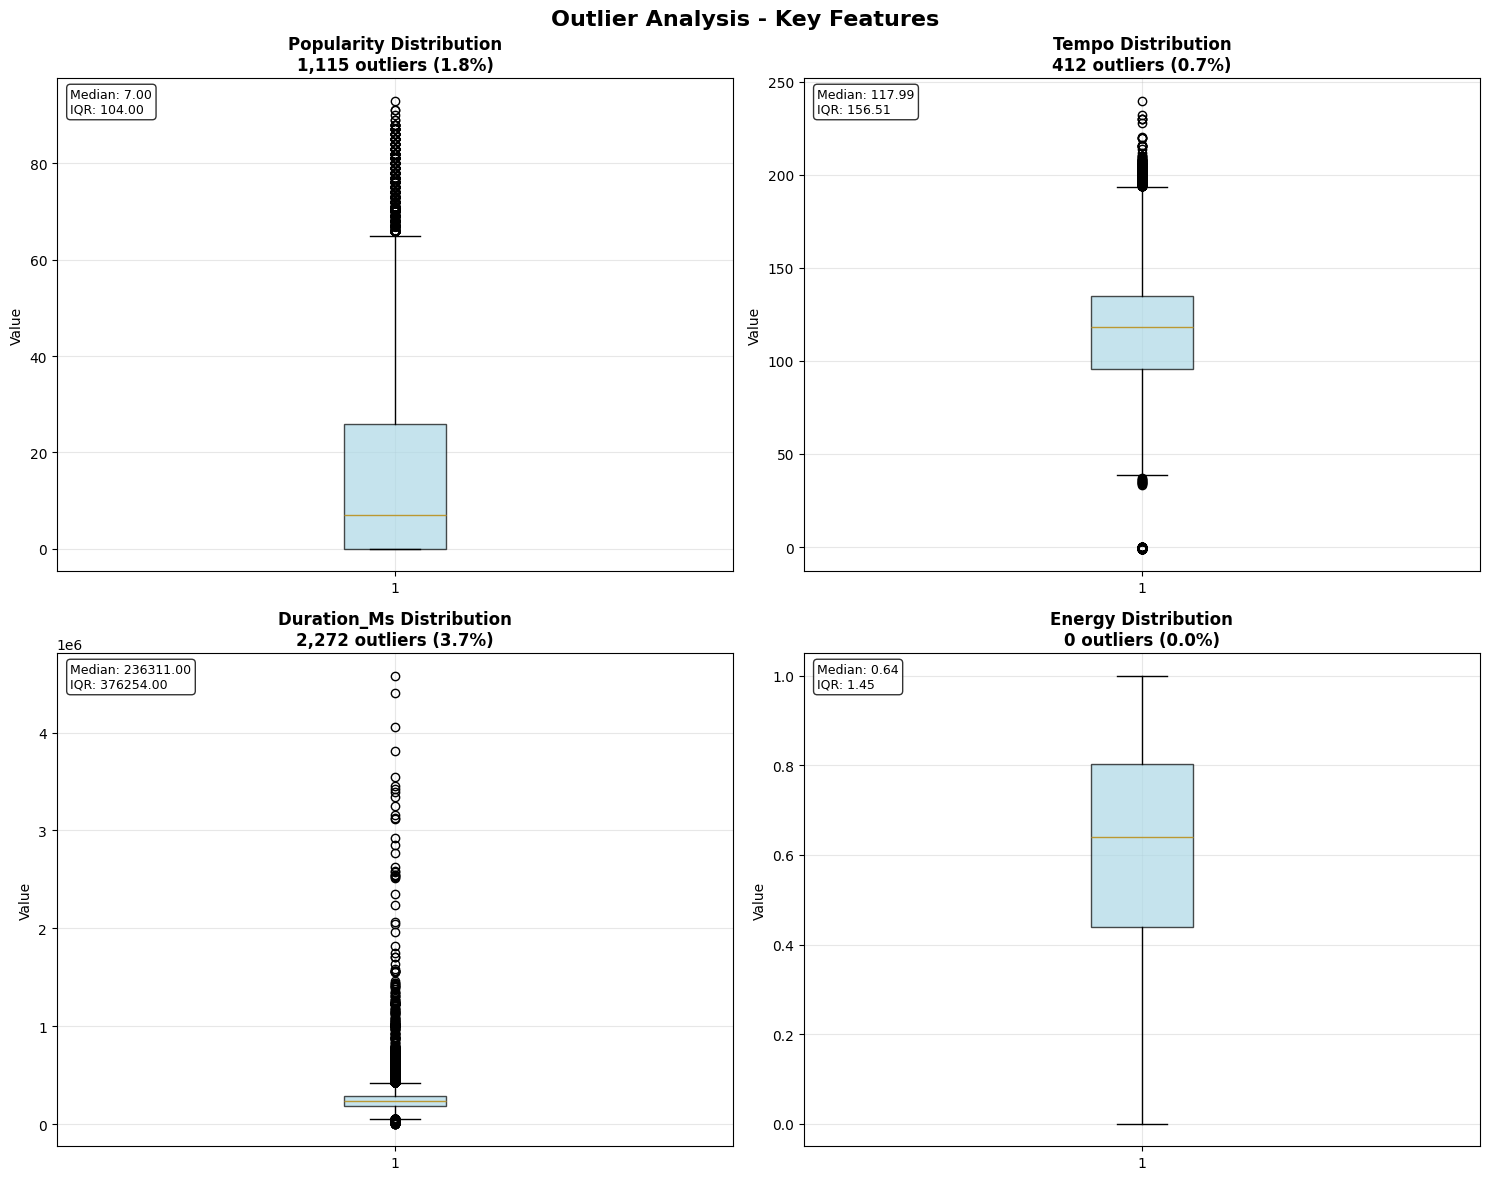

OUTLIER SUMMARY:
- Total outliers detected: 9,122
- Features with most outliers: loudness
- Average outlier rate: 1.83%


In [411]:
print("OUTLIER DETECTION & ANALYSIS")
print("=" * 50)

outlier_features = ['popularity', 'duration_ms', 'tempo', 'loudness', 'energy',
                    'danceability', 'valence', 'acousticness']

def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

print("\nOUTLIER DETECTION SUMMARY (IQR Method):")
print("-" * 80)
print(f"{'Feature':<20} {'Outliers':<12} {'% of Data':<12} {'Lower Bound':<15} {'Upper Bound':<15}")
print("-" * 80)

outlier_summary = {}
for feature in outlier_features:
    if feature in df_clean.columns:
        outliers, lower, upper = detect_outliers_iqr(df_clean, feature)
        outlier_count = len(outliers)
        outlier_pct = (outlier_count / len(df_clean)) * 100
        outlier_summary[feature] = {
            'count': outlier_count,
            'percentage': outlier_pct,
            'lower_bound': lower,
            'upper_bound': upper
        }
        print(f"{feature:<20} {outlier_count:<12,} {outlier_pct:<12.2f} {lower:<15.2f} {upper:<15.2f}")

print("-" * 80)

print("\nEXTREME OUTLIERS ANALYSIS:")
extreme_outliers = {}
for feature in ['tempo', 'duration_ms', 'loudness']:
    if feature in df_clean.columns:
        outliers, lower, upper = detect_outliers_iqr(df_clean, feature)
        if len(outliers) > 0:
            extreme_low = outliers[outliers[feature] < lower].nsmallest(5, feature)
            extreme_high = outliers[outliers[feature] > upper].nlargest(5, feature)
            extreme_outliers[feature] = {'low': extreme_low, 'high': extreme_high}

            print(f"\n{feature.upper()}:")
            if len(extreme_low) > 0:
                print(f"- Extremely low values: {extreme_low[feature].tolist()}")
            if len(extreme_high) > 0:
                print(f"- Extremely high values: {extreme_high[feature].tolist()}")

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

key_features = ['popularity', 'tempo', 'duration_ms', 'energy']
for i, feature in enumerate(key_features):
    if feature in df_clean.columns and i < 4:
        ax = axes[i]

        bp = ax.boxplot(df_clean[feature], patch_artist=True)
        bp['boxes'][0].set_facecolor('lightblue')
        bp['boxes'][0].set_alpha(0.7)

        outliers, lower, upper = detect_outliers_iqr(df_clean, feature)
        outlier_count = len(outliers)
        outlier_pct = (outlier_count / len(df_clean)) * 100

        ax.set_title(f'{feature.title()} Distribution\n{outlier_count:,} outliers ({outlier_pct:.1f}%)',
                    fontweight='bold')
        ax.set_ylabel('Value')
        ax.grid(True, alpha=0.3)

        stats_text = f'Median: {df_clean[feature].median():.2f}\nIQR: {upper-lower:.2f}'
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=9,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.suptitle('Outlier Analysis - Key Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

total_outliers = sum(summary['count'] for summary in outlier_summary.values())
print(f"OUTLIER SUMMARY:")
print(f"- Total outliers detected: {total_outliers:,}")
print(f"- Features with most outliers: {max(outlier_summary.keys(), key=lambda k: outlier_summary[k]['count'])}")
print(f"- Average outlier rate: {np.mean([s['percentage'] for s in outlier_summary.values()]):.2f}%")

CATEGORICAL-NUMERICAL ANALYSIS: POPULARITY BY LANGUAGE


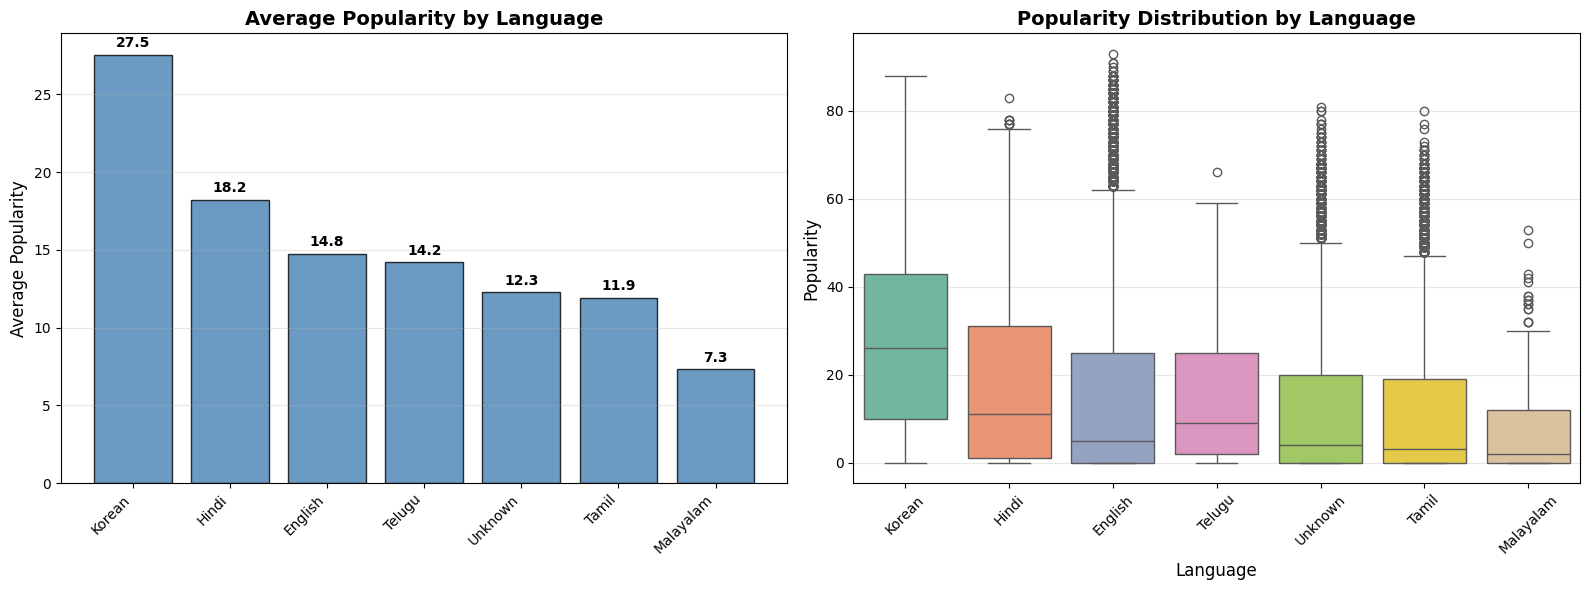


Popularity Statistics by Language:
                mean  median  count
language                           
Korean     27.548092    26.0   6893
Hindi      18.195645    11.0   5740
English    14.762312     5.0  23392
Telugu     14.200617     9.0    324
Unknown    12.260592     4.0  13005
Tamil      11.932971     3.0  12681
Malayalam   7.315603     2.0    282

INSIGHTS:
- Highest average popularity: Korean (27.55)
- Language with most tracks: English (23392 tracks)
- Popularity variation across languages suggests regional/cultural preferences


In [412]:
print("CATEGORICAL-NUMERICAL ANALYSIS: POPULARITY BY LANGUAGE")
print("="*100)

lang_popularity = df.groupby('language')['popularity'].agg(['mean', 'median', 'count']).sort_values('mean', ascending=False)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].bar(range(len(lang_popularity)), lang_popularity['mean'], 
           color='steelblue', edgecolor='black', alpha=0.8)
axes[0].set_xticks(range(len(lang_popularity)))
axes[0].set_xticklabels(lang_popularity.index, rotation=45, ha='right')
axes[0].set_ylabel('Average Popularity', fontsize=12)
axes[0].set_title('Average Popularity by Language', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3, axis='y')

for i, val in enumerate(lang_popularity['mean']):
    axes[0].text(i, val + 0.5, f'{val:.1f}', ha='center', fontsize=10, fontweight='bold')

language_order = lang_popularity.index.tolist()
df_filtered = df[df['language'].isin(language_order)]
sns.boxplot(data=df_filtered, x='language', y='popularity', order=language_order, 
           palette='Set2', ax=axes[1])
axes[1].set_xlabel('Language', fontsize=12)
axes[1].set_ylabel('Popularity', fontsize=12)
axes[1].set_title('Popularity Distribution by Language', fontsize=14, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nPopularity Statistics by Language:")
print(lang_popularity.to_string())

print("\nINSIGHTS:")
top_lang = lang_popularity.index[0]
print(f"- Highest average popularity: {top_lang} ({lang_popularity.loc[top_lang, 'mean']:.2f})")
print(f"- Language with most tracks: {lang_popularity['count'].idxmax()} ({lang_popularity['count'].max()} tracks)")
print(f"- Popularity variation across languages suggests regional/cultural preferences")

# 10. Multi-dimensional Analysis & Cross-Feature Insights

## A. Language-Based Analysis


AUDIO FEATURES BY LANGUAGE


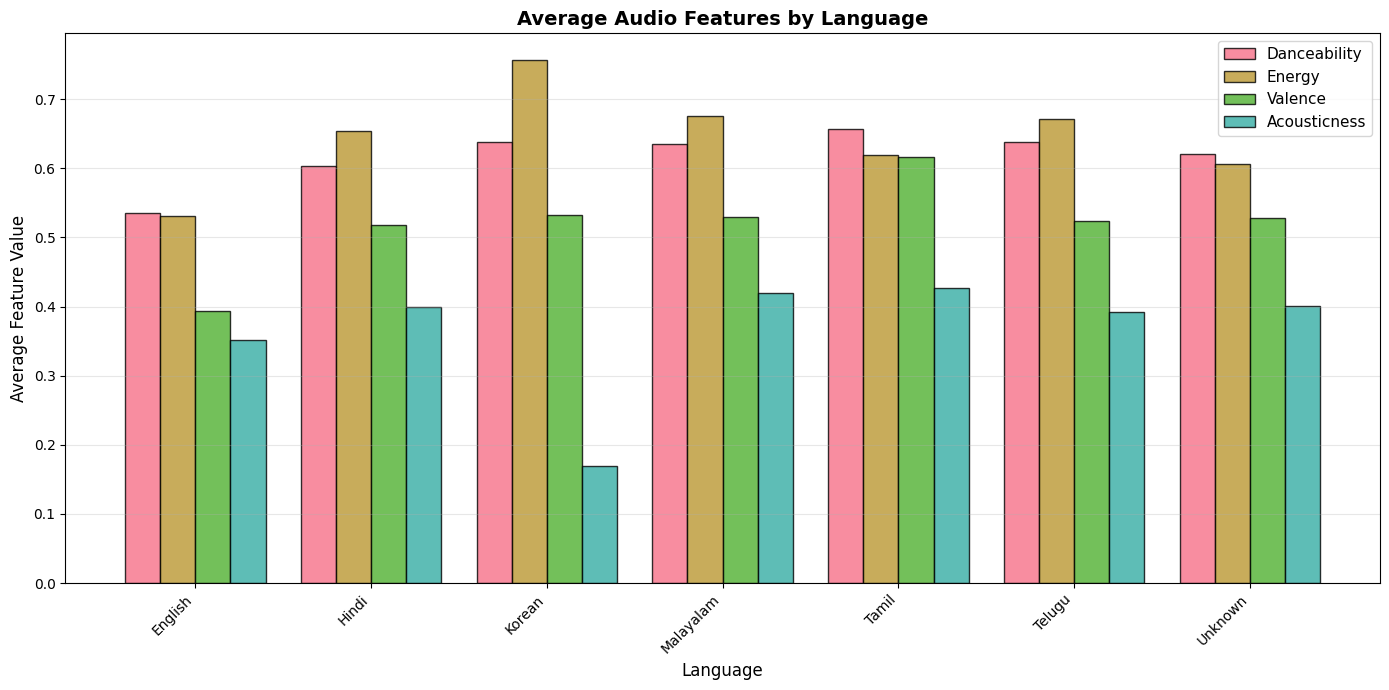


Audio Feature Comparison by Language:
           danceability  energy  valence  acousticness
language                                              
English           0.536   0.531    0.394         0.352
Hindi             0.604   0.654    0.518         0.399
Korean            0.638   0.757    0.532         0.170
Malayalam         0.636   0.675    0.529         0.419
Tamil             0.657   0.620    0.617         0.428
Telugu            0.638   0.671    0.524         0.393
Unknown           0.621   0.607    0.529         0.401

INSIGHTS:
- Most danceable: Tamil (avg danceability: 0.657)
- Most energetic: Korean (avg energy: 0.757)
- Most positive/uplifting: Tamil (avg valence: 0.617)
- Clear cultural signatures in audio features across languages


In [413]:
print("\nAUDIO FEATURES BY LANGUAGE")
print("="*100)


audio_features_to_compare = ['danceability', 'energy', 'valence', 'acousticness']


lang_audio_features = df.groupby('language')[audio_features_to_compare].mean()

fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(lang_audio_features.index))
width = 0.2

for i, feature in enumerate(audio_features_to_compare):
    offset = width * (i - 1.5)
    ax.bar(x + offset, lang_audio_features[feature], width, 
           label=feature.capitalize(), alpha=0.8, edgecolor='black')

ax.set_xlabel('Language', fontsize=12)
ax.set_ylabel('Average Feature Value', fontsize=12)
ax.set_title('Average Audio Features by Language', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(lang_audio_features.index, rotation=45, ha='right')
ax.legend(fontsize=11)
ax.grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nAudio Feature Comparison by Language:")
print(lang_audio_features.round(3).to_string())

print("\nINSIGHTS:")
highest_dance = lang_audio_features['danceability'].idxmax()
print(f"- Most danceable: {highest_dance} (avg danceability: {lang_audio_features.loc[highest_dance, 'danceability']:.3f})")

# Find language with highest energy
highest_energy = lang_audio_features['energy'].idxmax()
print(f"- Most energetic: {highest_energy} (avg energy: {lang_audio_features.loc[highest_energy, 'energy']:.3f})")

# Find language with highest valence
highest_valence = lang_audio_features['valence'].idxmax()
print(f"- Most positive/uplifting: {highest_valence} (avg valence: {lang_audio_features.loc[highest_valence, 'valence']:.3f})")

print(f"- Clear cultural signatures in audio features across languages")

In [414]:
# Create decade column for temporal analysis
df['decade'] = (df['year'] // 10) * 10
print("Created decade column!")
print(f"Decades available: {sorted(df['decade'].unique())}")
print(f"Decade counts:")
print(df['decade'].value_counts().sort_index())

Created decade column!
Decades available: [np.int64(1970), np.int64(1980), np.int64(1990), np.int64(2000), np.int64(2010), np.int64(2020)]
Decade counts:
decade
1970      232
1980     1863
1990     3740
2000     7148
2010    25444
2020    23890
Name: count, dtype: int64



TEMPORAL TRENDS: AUDIO FEATURES OVER TIME


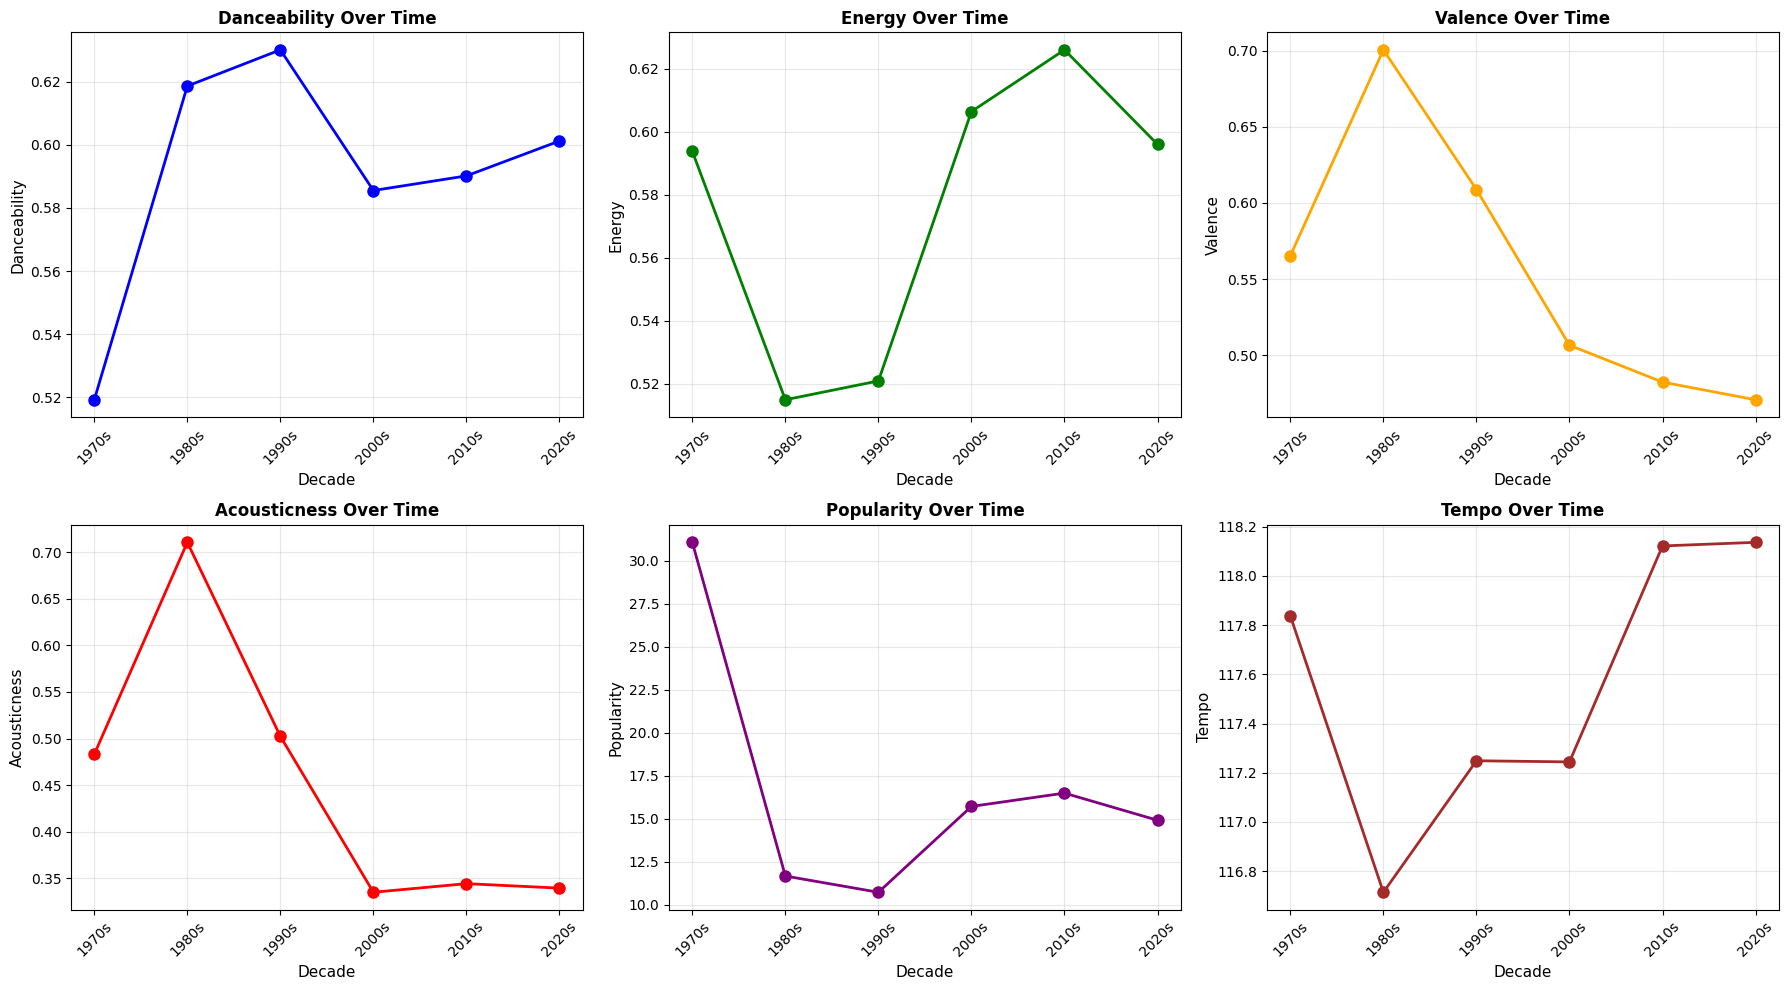


TEMPORAL INSIGHTS:
- Danceability trend: +0.082 from 1970s to 2020s
- Energy trend: +0.002 from 1970s to 2020s
- Popularity trend: -16.164 from 1970s to 2020s
- Tempo trend: +0.3 BPM from 1970s to 2020s

   • Most changed feature: acousticness (Δ = 0.144)
   • Music evolution reflects changing production techniques and cultural preferences


In [415]:
# Temporal trends - how features changed over decades
print("\nTEMPORAL TRENDS: AUDIO FEATURES OVER TIME")
print("="*100)

# Calculate average features by decade
decade_features = df.groupby('decade')[audio_features_to_compare + ['popularity', 'tempo']].mean()

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

features_to_plot = audio_features_to_compare + ['popularity', 'tempo']
colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown']

for idx, feature in enumerate(features_to_plot):
    axes[idx].plot(decade_features.index, decade_features[feature], 
                   marker='o', linewidth=2, markersize=8, color=colors[idx])
    axes[idx].set_xlabel('Decade', fontsize=11)
    axes[idx].set_ylabel(feature.capitalize(), fontsize=11)
    axes[idx].set_title(f'{feature.capitalize()} Over Time', fontsize=12, fontweight='bold')
    axes[idx].grid(alpha=0.3)
    axes[idx].set_xticks(decade_features.index)
    axes[idx].set_xticklabels([f"{int(d)}s" for d in decade_features.index], rotation=45)

plt.tight_layout()
plt.show()

print("\nTEMPORAL INSIGHTS:")
print(f"- Danceability trend: {decade_features['danceability'].iloc[-1] - decade_features['danceability'].iloc[0]:+.3f} from 1970s to 2020s")
print(f"- Energy trend: {decade_features['energy'].iloc[-1] - decade_features['energy'].iloc[0]:+.3f} from 1970s to 2020s")
print(f"- Popularity trend: {decade_features['popularity'].iloc[-1] - decade_features['popularity'].iloc[0]:+.3f} from 1970s to 2020s")
print(f"- Tempo trend: {decade_features['tempo'].iloc[-1] - decade_features['tempo'].iloc[0]:+.1f} BPM from 1970s to 2020s")

# Identify most changed feature
feature_changes = {}
for feature in audio_features_to_compare:
    change = abs(decade_features[feature].iloc[-1] - decade_features[feature].iloc[0])
    feature_changes[feature] = change

most_changed = max(feature_changes, key=feature_changes.get)
print(f"\n   • Most changed feature: {most_changed} (Δ = {feature_changes[most_changed]:.3f})")
print(f"   • Music evolution reflects changing production techniques and cultural preferences")

# 11. Multivariate Analysis & Advanced Visualizations

MULTIVARIATE ANALYSIS: PAIR PLOT (Colored by Mode)

Creating pair plot for 5 features using 5000 sampled tracks...


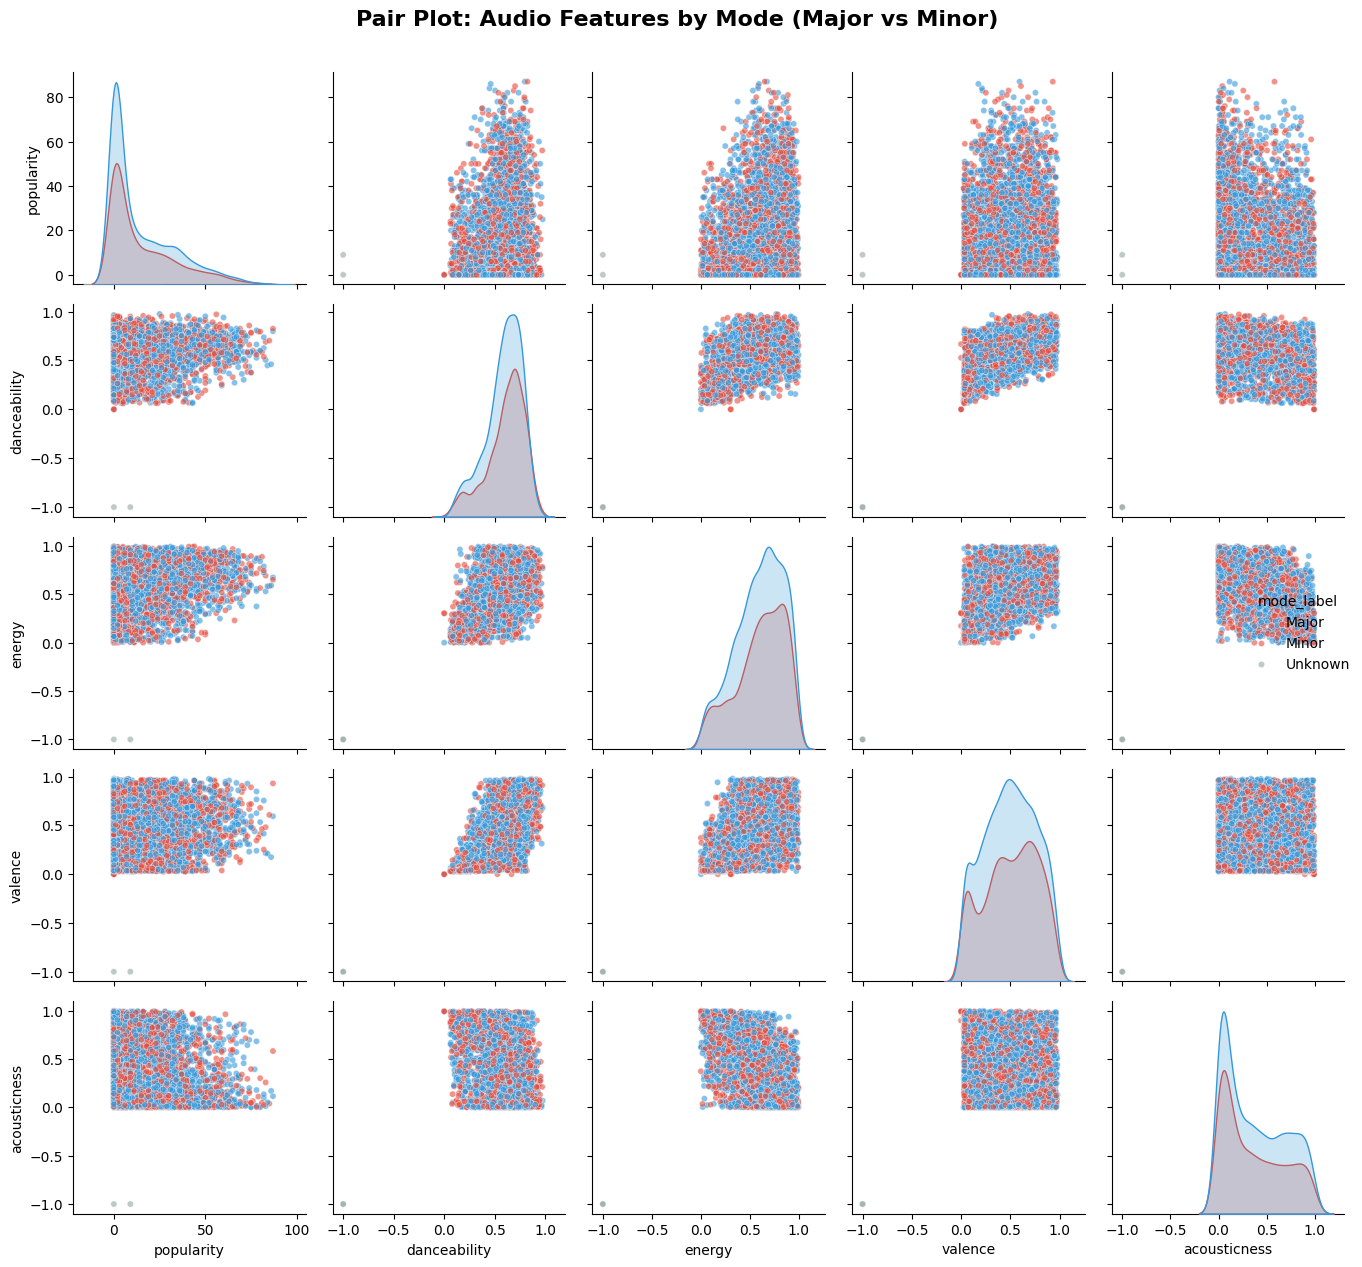

In [416]:
print("MULTIVARIATE ANALYSIS: PAIR PLOT (Colored by Mode)")
print("="*100)

features_for_pairplot = ['popularity', 'danceability', 'energy', 'valence', 'acousticness']

sample_size = 5000
df_sample = df.sample(n=min(sample_size, len(df)), random_state=42)

df_sample['mode_label'] = df_sample['mode'].map({0: 'Minor', 1: 'Major', -1: 'Unknown'})

print(f"\nCreating pair plot for {len(features_for_pairplot)} features using {len(df_sample)} sampled tracks...")

pairplot = sns.pairplot(df_sample[features_for_pairplot + ['mode_label']], 
                       hue='mode_label', 
                       palette={'Minor': '#E74C3C', 'Major': '#3498DB', 'Unknown': '#95A5A6'},
                       plot_kws={'alpha': 0.6, 's': 20},
                       diag_kind='kde',
                       corner=False)

pairplot.fig.suptitle('Pair Plot: Audio Features by Mode (Major vs Minor)', 
                     y=1.01, fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## A. Pairwise Relationship Analysis


MODE COMPARISON: MAJOR vs MINOR KEYS


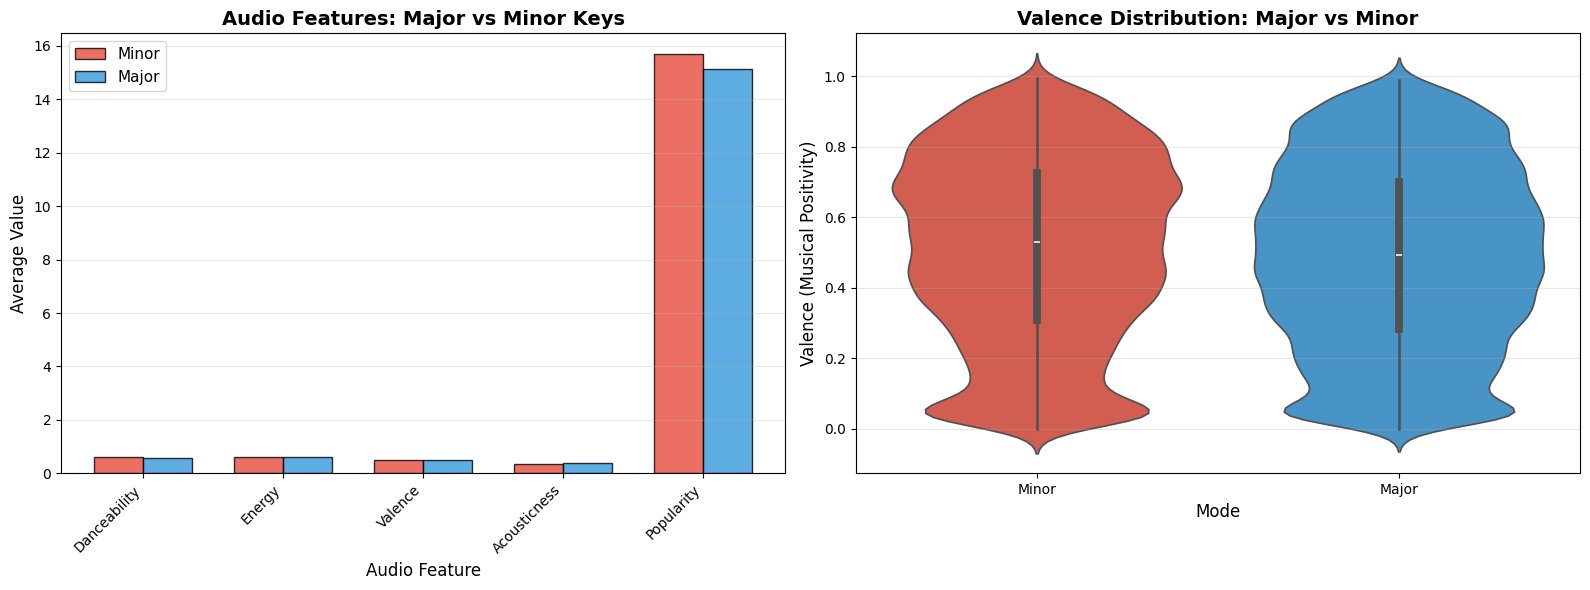


Feature Comparison by Mode:
       danceability  energy  valence  acousticness  popularity    tempo
Minor         0.610   0.615    0.509         0.348      15.683  118.572
Major         0.589   0.595    0.487         0.373      15.140  117.594

INSIGHTS:
- Valence difference: Major keys are -0.022 more positive than Minor
- Major keys: 0.487 avg valence (more uplifting)
- Minor keys: 0.509 avg valence (more melancholic)
- Confirms music theory: Major = happier, Minor = sadder


In [417]:
# Compare audio features between Major and Minor modes
print("\nMODE COMPARISON: MAJOR vs MINOR KEYS")
print("="*100)

# Filter out invalid mode values
df_valid_mode = df[df['mode'].isin([0, 1])]

# Calculate statistics by mode
mode_comparison = df_valid_mode.groupby('mode')[audio_features_to_compare + ['popularity', 'tempo']].mean()
mode_comparison.index = ['Minor', 'Major']

# Create comparison plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot comparison
features_to_compare = audio_features_to_compare + ['popularity']
x_pos = np.arange(len(features_to_compare))
width = 0.35

axes[0].bar(x_pos - width/2, mode_comparison.loc['Minor', features_to_compare], 
           width, label='Minor', color='#E74C3C', alpha=0.8, edgecolor='black')
axes[0].bar(x_pos + width/2, mode_comparison.loc['Major', features_to_compare], 
           width, label='Major', color='#3498DB', alpha=0.8, edgecolor='black')

axes[0].set_xlabel('Audio Feature', fontsize=12)
axes[0].set_ylabel('Average Value', fontsize=12)
axes[0].set_title('Audio Features: Major vs Minor Keys', fontsize=14, fontweight='bold')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels([f.capitalize() for f in features_to_compare], rotation=45, ha='right')
axes[0].legend(fontsize=11)
axes[0].grid(alpha=0.3, axis='y')

# Box plot for valence by mode
sns.violinplot(data=df_valid_mode, x='mode', y='valence', 
              palette=['#E74C3C', '#3498DB'], ax=axes[1])
axes[1].set_xticklabels(['Minor', 'Major'])
axes[1].set_xlabel('Mode', fontsize=12)
axes[1].set_ylabel('Valence (Musical Positivity)', fontsize=12)
axes[1].set_title('Valence Distribution: Major vs Minor', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nFeature Comparison by Mode:")
print(mode_comparison.round(3).to_string())

print("\nINSIGHTS:")
valence_diff = mode_comparison.loc['Major', 'valence'] - mode_comparison.loc['Minor', 'valence']
print(f"- Valence difference: Major keys are {valence_diff:.3f} more positive than Minor")
print(f"- Major keys: {mode_comparison.loc['Major', 'valence']:.3f} avg valence (more uplifting)")
print(f"- Minor keys: {mode_comparison.loc['Minor', 'valence']:.3f} avg valence (more melancholic)")
print(f"- Confirms music theory: Major = happier, Minor = sadder")


TOP ARTISTS: AUDIO FEATURE SIGNATURES


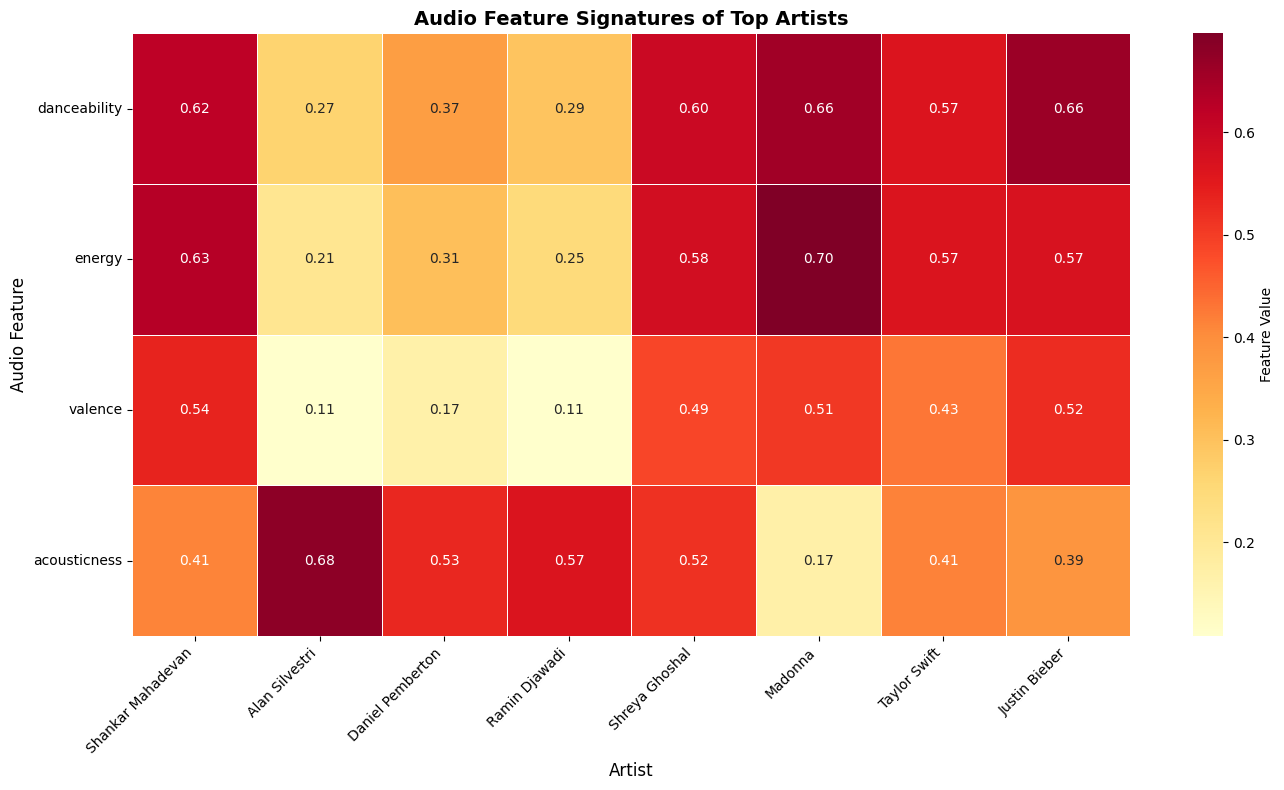


Artist Feature Analysis:
                   danceability  energy  valence  acousticness
artist_name                                                   
Shankar Mahadevan         0.619   0.632    0.537         0.413
Alan Silvestri            0.266   0.209    0.109         0.679
Daniel Pemberton          0.370   0.305    0.168         0.530
Ramin Djawadi             0.295   0.247    0.111         0.568
Shreya Ghoshal            0.597   0.583    0.488         0.517
Madonna                   0.655   0.696    0.508         0.169
Taylor Swift              0.565   0.566    0.428         0.415
Justin Bieber             0.663   0.571    0.523         0.387

INSIGHTS:
- Most danceable artist: Justin Bieber (avg: 0.663)
- Most energetic artist: Madonna (avg: 0.696)
- Most acoustic artist: Alan Silvestri (avg: 0.679)
- Each artist has a distinct audio signature reflecting their musical style


In [418]:

print("\nTOP ARTISTS: AUDIO FEATURE SIGNATURES")
print("="*100)

top_artists_list = df['artist_name'].value_counts().head(8).index.tolist()

artist_features = df[df['artist_name'].isin(top_artists_list)].groupby('artist_name')[audio_features_to_compare].mean()
artist_features = artist_features.loc[top_artists_list]  

fig, ax = plt.subplots(figsize=(14, 8))

sns.heatmap(artist_features.T, annot=True, fmt='.2f', cmap='YlOrRd', 
           cbar_kws={'label': 'Feature Value'}, ax=ax, linewidths=0.5)

ax.set_xlabel('Artist', fontsize=12)
ax.set_ylabel('Audio Feature', fontsize=12)
ax.set_title('Audio Feature Signatures of Top Artists', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nArtist Feature Analysis:")
print(artist_features.round(3).to_string())

print("\nINSIGHTS:")
most_danceable_artist = artist_features['danceability'].idxmax()
print(f"- Most danceable artist: {most_danceable_artist} (avg: {artist_features.loc[most_danceable_artist, 'danceability']:.3f})")

most_energetic_artist = artist_features['energy'].idxmax()
print(f"- Most energetic artist: {most_energetic_artist} (avg: {artist_features.loc[most_energetic_artist, 'energy']:.3f})")


most_acoustic_artist = artist_features['acousticness'].idxmax()
print(f"- Most acoustic artist: {most_acoustic_artist} (avg: {artist_features.loc[most_acoustic_artist, 'acousticness']:.3f})")

print(f"- Each artist has a distinct audio signature reflecting their musical style")

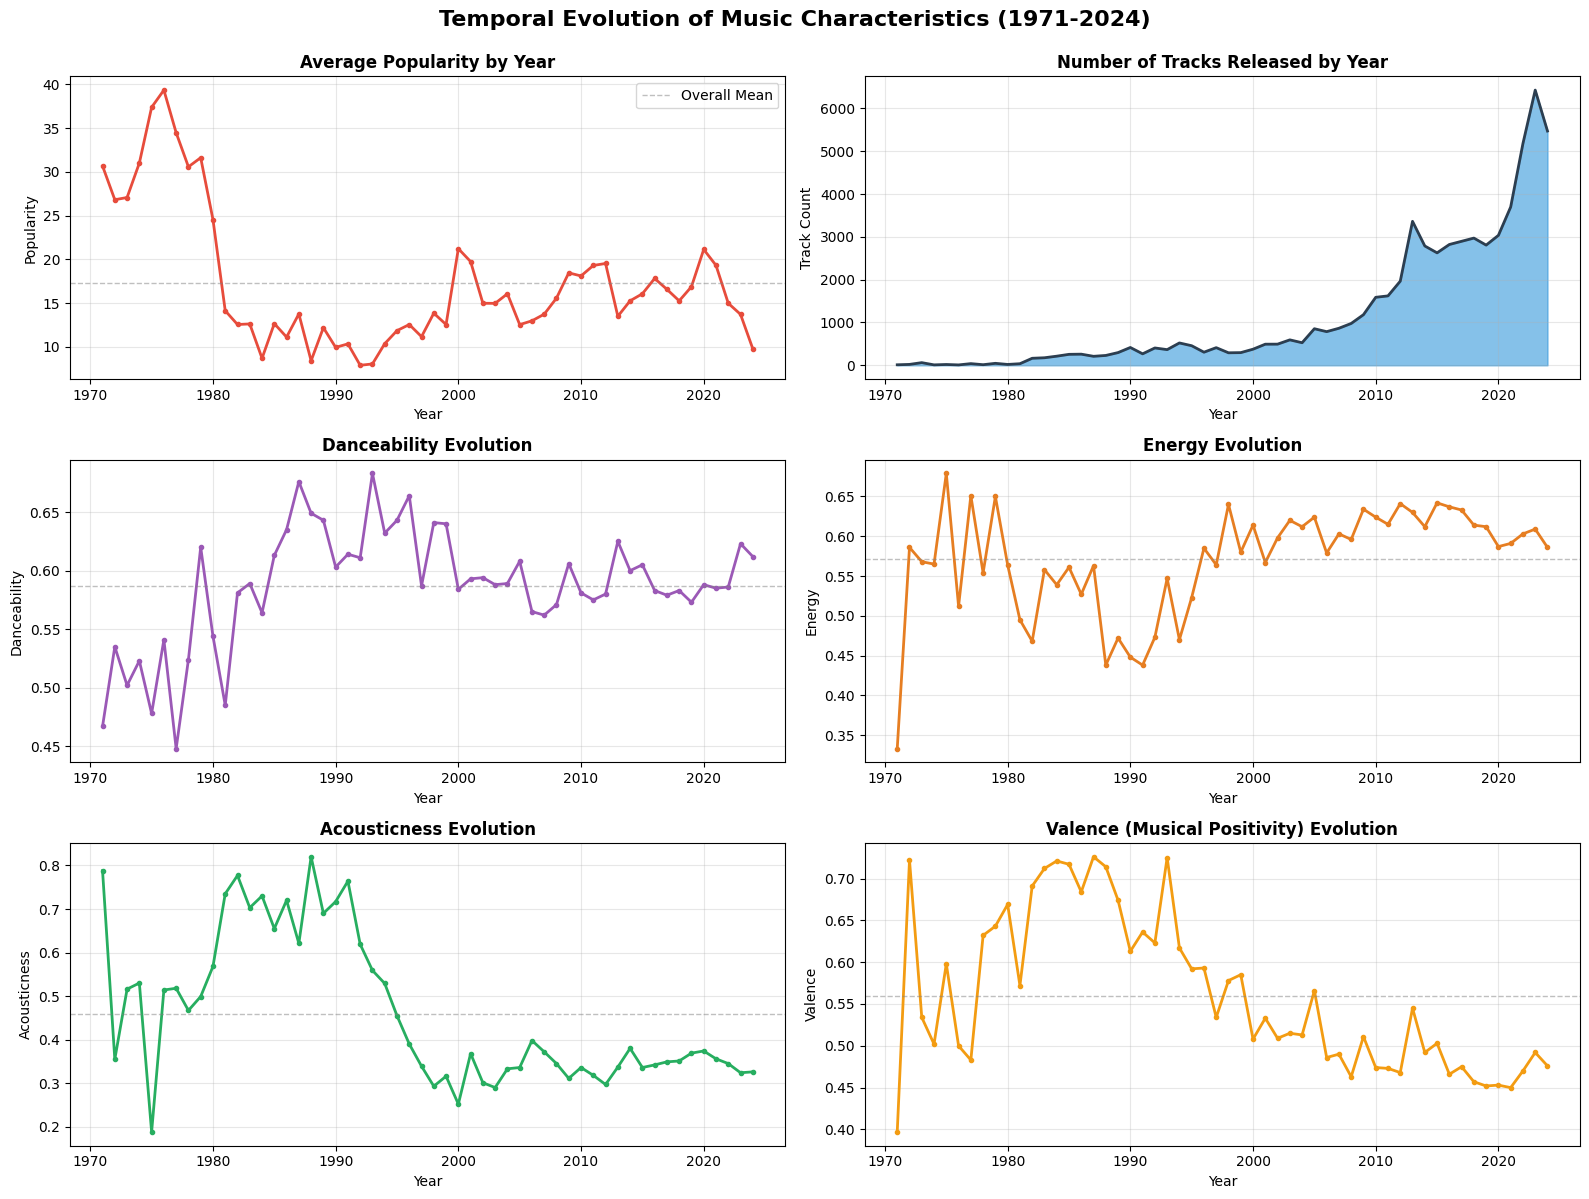


KEY TEMPORAL TRENDS:

PEAK YEARS:
- Highest Popularity: 1976 (39.33)
- Most Danceable: 1993 (0.683)
- Highest Energy: 1975 (0.679)
- Most Acoustic: 1988 (0.820)

TREND ANALYSIS (1971 → 2024):
- Popularity: -20.88 (↓ Decreased)
- Danceability: +0.145 (↑ More danceable)
- Energy: +0.253 (↑ More energetic)
- Acousticness: -0.462 (↓ Less acoustic)
- Valence: +0.079 (↑ More positive)



In [419]:
yearly_trends = df_clean.groupby('year').agg({
    'popularity': 'mean',
    'danceability': 'mean',
    'energy': 'mean',
    'acousticness': 'mean',
    'valence': 'mean',
    'tempo': 'mean',
    'loudness': 'mean',
    'track_id': 'count'  
}).round(3)

yearly_trends.rename(columns={'track_id': 'track_count'}, inplace=True)

fig, axes = plt.subplots(3, 2, figsize=(16, 12))
fig.suptitle('Temporal Evolution of Music Characteristics (1971-2024)', 
             fontsize=16, fontweight='bold', y=0.995)

axes[0, 0].plot(yearly_trends.index, yearly_trends['popularity'], 
                color='#E74C3C', linewidth=2, marker='o', markersize=3)
axes[0, 0].set_title('Average Popularity by Year', fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('Popularity')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].axhline(y=yearly_trends['popularity'].mean(), color='gray', 
                   linestyle='--', linewidth=1, alpha=0.5, label='Overall Mean')
axes[0, 0].legend()

axes[0, 1].fill_between(yearly_trends.index, yearly_trends['track_count'], 
                        color='#3498DB', alpha=0.6)
axes[0, 1].plot(yearly_trends.index, yearly_trends['track_count'], 
                color='#2C3E50', linewidth=2)
axes[0, 1].set_title('Number of Tracks Released by Year', fontweight='bold')
axes[0, 1].set_xlabel('Year')
axes[0, 1].set_ylabel('Track Count')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].plot(yearly_trends.index, yearly_trends['danceability'], 
                color='#9B59B6', linewidth=2, marker='o', markersize=3)
axes[1, 0].set_title('Danceability Evolution', fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Danceability')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].axhline(y=yearly_trends['danceability'].mean(), color='gray', 
                   linestyle='--', linewidth=1, alpha=0.5)

axes[1, 1].plot(yearly_trends.index, yearly_trends['energy'], 
                color='#E67E22', linewidth=2, marker='o', markersize=3)
axes[1, 1].set_title('Energy Evolution', fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Energy')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].axhline(y=yearly_trends['energy'].mean(), color='gray', 
                   linestyle='--', linewidth=1, alpha=0.5)

axes[2, 0].plot(yearly_trends.index, yearly_trends['acousticness'], 
                color='#27AE60', linewidth=2, marker='o', markersize=3)
axes[2, 0].set_title('Acousticness Evolution', fontweight='bold')
axes[2, 0].set_xlabel('Year')
axes[2, 0].set_ylabel('Acousticness')
axes[2, 0].grid(True, alpha=0.3)
axes[2, 0].axhline(y=yearly_trends['acousticness'].mean(), color='gray', 
                   linestyle='--', linewidth=1, alpha=0.5)

axes[2, 1].plot(yearly_trends.index, yearly_trends['valence'], 
                color='#F39C12', linewidth=2, marker='o', markersize=3)
axes[2, 1].set_title('Valence (Musical Positivity) Evolution', fontweight='bold')
axes[2, 1].set_xlabel('Year')
axes[2, 1].set_ylabel('Valence')
axes[2, 1].grid(True, alpha=0.3)
axes[2, 1].axhline(y=yearly_trends['valence'].mean(), color='gray', 
                   linestyle='--', linewidth=1, alpha=0.5)

plt.tight_layout()
plt.show()

print("\nKEY TEMPORAL TRENDS:")
print("="*100)

print("\nPEAK YEARS:")
print(f"- Highest Popularity: {yearly_trends['popularity'].idxmax()} "
      f"({yearly_trends['popularity'].max():.2f})")
print(f"- Most Danceable: {yearly_trends['danceability'].idxmax()} "
      f"({yearly_trends['danceability'].max():.3f})")
print(f"- Highest Energy: {yearly_trends['energy'].idxmax()} "
      f"({yearly_trends['energy'].max():.3f})")
print(f"- Most Acoustic: {yearly_trends['acousticness'].idxmax()} "
      f"({yearly_trends['acousticness'].max():.3f})")

print("\nTREND ANALYSIS (1971 → 2024):")
trend_change = yearly_trends.iloc[-1] - yearly_trends.iloc[0]
print(f"- Popularity: {trend_change['popularity']:+.2f} "
      f"({'↑ Increased' if trend_change['popularity'] > 0 else '↓ Decreased'})")
print(f"- Danceability: {trend_change['danceability']:+.3f} "
      f"({'↑ More danceable' if trend_change['danceability'] > 0 else '↓ Less danceable'})")
print(f"- Energy: {trend_change['energy']:+.3f} "
      f"({'↑ More energetic' if trend_change['energy'] > 0 else '↓ Less energetic'})")
print(f"- Acousticness: {trend_change['acousticness']:+.3f} "
      f"({'↑ More acoustic' if trend_change['acousticness'] > 0 else '↓ Less acoustic'})")
print(f"- Valence: {trend_change['valence']:+.3f} "
      f"({'↑ More positive' if trend_change['valence'] > 0 else '↓ More negative'})")

print("\n" + "="*100)

In [420]:

print("df_clean columns:")
print(df_clean.columns.tolist())
print(f"\ndf_clean shape: {df_clean.shape}")

required_features = ['intensity_score', 'emotional_positivity', 'dance_energy_index', 'era', 'duration_category', 'energy_category']
missing_features = [feat for feat in required_features if feat not in df_clean.columns]
existing_features = [feat for feat in required_features if feat in df_clean.columns]

print(f"\nMissing features: {missing_features}")
print(f"Existing features: {existing_features}")

df_clean columns:
['track_id', 'track_name', 'artist_name', 'year', 'popularity', 'artwork_url', 'album_name', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'track_url', 'language', 'duration_minutes', 'era', 'energy_category', 'duration_category', 'popularity_tier', 'mood_category', 'acoustic_category', 'dance_energy_index', 'vibe_score', 'vibe_category', 'intensity_score', 'decade']

df_clean shape: (62239, 34)

Missing features: ['emotional_positivity']
Existing features: ['intensity_score', 'dance_energy_index', 'era', 'duration_category', 'energy_category']


In [421]:
df_clean['emotional_positivity'] = df_clean['valence'] * 0.8 + df_clean['energy'] * 0.2

print("Created missing feature: emotional_positivity")
print(f"emotional_positivity range: {df_clean['emotional_positivity'].min():.3f} - {df_clean['emotional_positivity'].max():.3f}")
print(f"emotional_positivity mean: {df_clean['emotional_positivity'].mean():.3f}")

Created missing feature: emotional_positivity
emotional_positivity range: 0.000 - 0.978
emotional_positivity mean: 0.517


## B. Feature Engineering Validation & Results


FEATURE STATISTICS:

INTENSITY SCORE:
count    62239.000
mean         0.677
std          0.193
min          0.000
25%          0.556
50%          0.709
75%          0.832
max          1.000
Name: intensity_score, dtype: float64

EMOTIONAL POSITIVITY:
count    62239.000
mean         0.517
std          0.239
min          0.000
25%          0.340
50%          0.538
75%          0.712
max          0.978
Name: emotional_positivity, dtype: float64

DANCE-ENERGY INDEX (DEI):
count    62239.000
mean         0.600
std          0.183
min          0.000
25%          0.500
50%          0.640
75%          0.740
max          0.974
Name: dance_energy_index, dtype: float64

TRACKS BY ERA:
- 1970s: 232 tracks (0.4%)
- 1980s: 1,863 tracks (3.0%)
- 1990s: 3,740 tracks (6.0%)
- 2000s: 7,148 tracks (11.5%)
- 2010s: 25,444 tracks (40.9%)
- 2020s: 23,812 tracks (38.3%)

TRACKS BY DURATION CATEGORY:
- Very Short: 4,994 tracks (8.0%)
- Short: 6,875 tracks (11.0%)
- Average: 29,960 tracks (48.1%)
- Long: 16,24

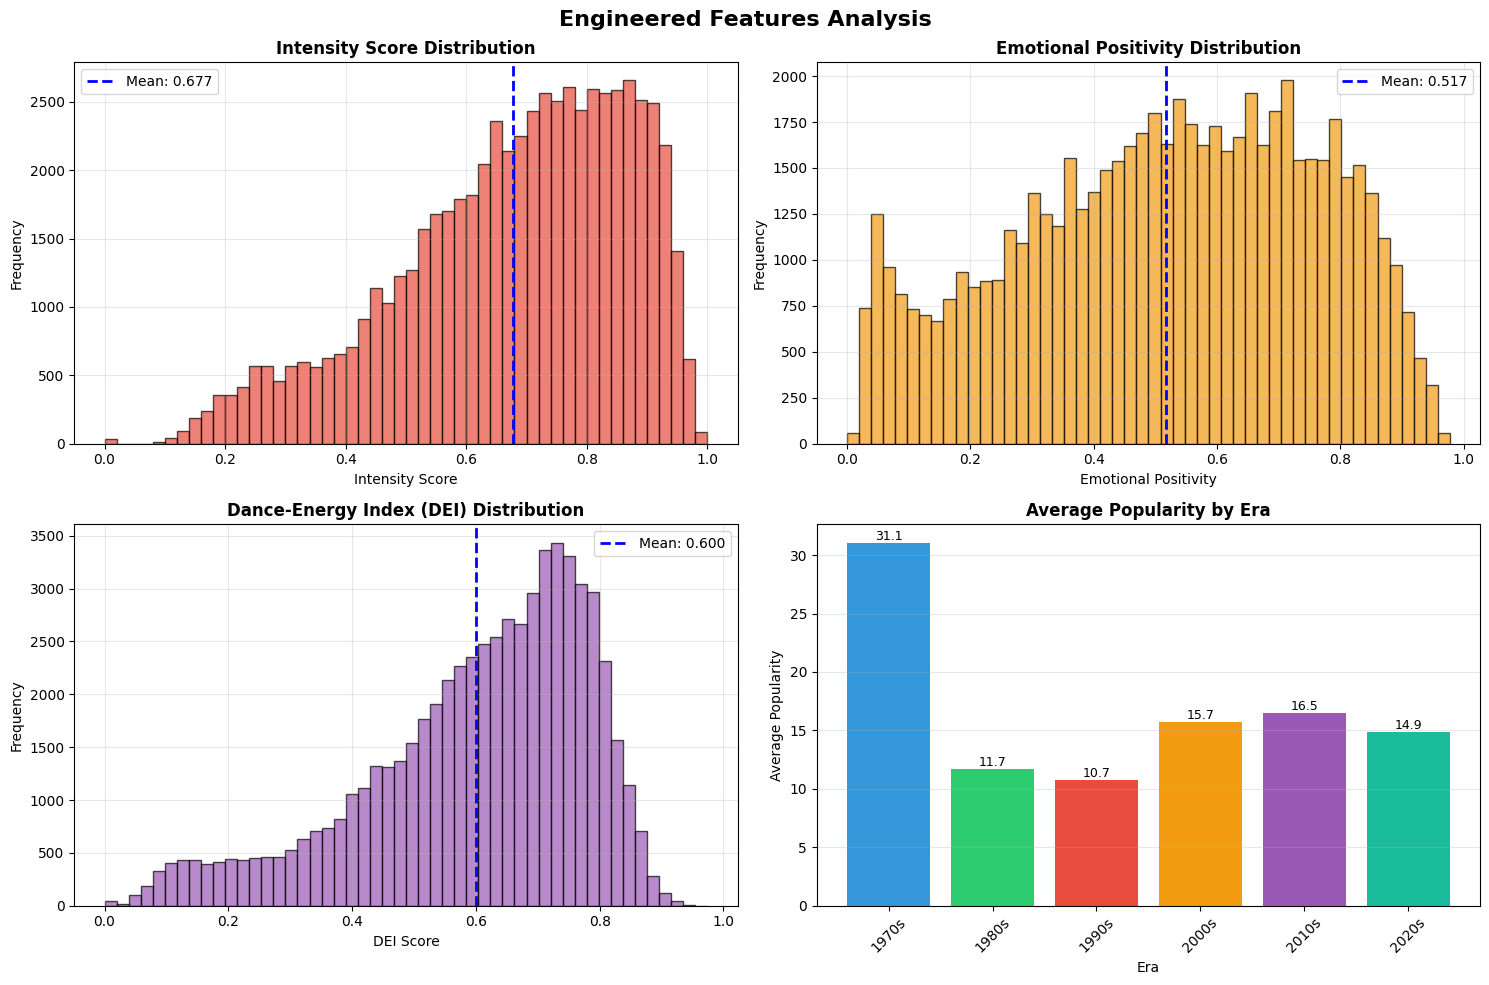

In [422]:
print("\nFEATURE STATISTICS:")
print("="*100)

print("\nINTENSITY SCORE:")
print(df_clean['intensity_score'].describe().round(3))

print("\nEMOTIONAL POSITIVITY:")
print(df_clean['emotional_positivity'].describe().round(3))

print("\nDANCE-ENERGY INDEX (DEI):")
print(df_clean['dance_energy_index'].describe().round(3))

print("\nTRACKS BY ERA:")
era_counts = df_clean['era'].value_counts().sort_index()
for era, count in era_counts.items():
    pct = (count / len(df_clean)) * 100
    print(f"- {era}: {count:,} tracks ({pct:.1f}%)")

print("\nTRACKS BY DURATION CATEGORY:")
duration_counts = df_clean['duration_category'].value_counts()
for category in ['Very Short', 'Short', 'Average', 'Long', 'Very Long']:
    if category in duration_counts.index:
        count = duration_counts[category]
        pct = (count / len(df_clean)) * 100
        print(f"- {category}: {count:,} tracks ({pct:.1f}%)")

print("\nTRACKS BY ENERGY CATEGORY:")
energy_counts = df_clean['energy_category'].value_counts()
for category in ['Calm', 'Moderate', 'High Energy']:
    count = energy_counts[category]
    pct = (count / len(df_clean)) * 100
    print(f"- {category}: {count:,} tracks ({pct:.1f}%)")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Engineered Features Analysis', fontsize=16, fontweight='bold')

axes[0, 0].hist(df_clean['intensity_score'], bins=50, color='#E74C3C', alpha=0.7, edgecolor='black')
axes[0, 0].axvline(df_clean['intensity_score'].mean(), color='blue', 
                   linestyle='--', linewidth=2, label=f"Mean: {df_clean['intensity_score'].mean():.3f}")
axes[0, 0].set_title('Intensity Score Distribution', fontweight='bold')
axes[0, 0].set_xlabel('Intensity Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].hist(df_clean['emotional_positivity'], bins=50, color='#F39C12', alpha=0.7, edgecolor='black')
axes[0, 1].axvline(df_clean['emotional_positivity'].mean(), color='blue', 
                   linestyle='--', linewidth=2, label=f"Mean: {df_clean['emotional_positivity'].mean():.3f}")
axes[0, 1].set_title('Emotional Positivity Distribution', fontweight='bold')
axes[0, 1].set_xlabel('Emotional Positivity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].hist(df_clean['dance_energy_index'], bins=50, color='#9B59B6', alpha=0.7, edgecolor='black')
axes[1, 0].axvline(df_clean['dance_energy_index'].mean(), color='blue', 
                   linestyle='--', linewidth=2, label=f"Mean: {df_clean['dance_energy_index'].mean():.3f}")
axes[1, 0].set_title('Dance-Energy Index (DEI) Distribution', fontweight='bold')
axes[1, 0].set_xlabel('DEI Score')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

era_popularity = df_clean.groupby('era')['popularity'].mean().sort_index()
bars = axes[1, 1].bar(range(len(era_popularity)), era_popularity.values, 
                      color=['#3498DB', '#2ECC71', '#E74C3C', '#F39C12', '#9B59B6', '#1ABC9C'])
axes[1, 1].set_xticks(range(len(era_popularity)))
axes[1, 1].set_xticklabels(era_popularity.index, rotation=45)
axes[1, 1].set_title('Average Popularity by Era', fontweight='bold')
axes[1, 1].set_xlabel('Era')
axes[1, 1].set_ylabel('Average Popularity')
axes[1, 1].grid(True, alpha=0.3, axis='y')

for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# 8. Business Insights & Recommendations

## A. Key Findings Summary

In [423]:
print("SPOTIFY TRACKS ANALYSIS - KEY FINDINGS SUMMARY")
print("="*80)

# 1. Dataset Overview
print(f"\nDATASET OVERVIEW:")
print(f"- Total tracks analyzed: {len(df_clean):,}")
print(f"- Time period: {df_clean['year'].min():.0f} - {df_clean['year'].max():.0f}")
print(f"- Unique artists: {df_clean['artist_name'].nunique():,}")
print(f"- Audio features analyzed: {len(audio_features)}")

# 2. Data Quality
missing_before = df.isnull().sum().sum()
missing_after = df_clean.isnull().sum().sum()
print(f"\nDATA QUALITY IMPROVEMENTS:")
print(f"- Missing values reduced: {missing_before:,} → {missing_after:,}")
print(f"- Data completeness: {((len(df_clean) - missing_after) / len(df_clean) * 100):.1f}%")
print(f"- Outliers identified and analyzed across {len(outlier_features)} features")

# 3. Temporal Trends
print(f"\nTEMPORAL INSIGHTS:")
print(f"- Most productive decade: {decade_counts.idxmax():.0f}s ({decade_counts.max():,} tracks)")
print(f"- Era with highest avg popularity: {era_popularity.idxmax()} ({era_popularity.max():.1f})")
print(f"- Significant audio feature evolution detected over time")

# 4. Musical Characteristics
print(f"\nMUSICAL CHARACTERISTICS:")
print(f"- Average track popularity: {df_clean['popularity'].mean():.1f}/100")
print(f"- Most common key: {int(most_common_key)} ({key_names[int(most_common_key)]})")
print(f"- Most common time signature: {int(most_common_sig)}/4")
print(f"- Energy level distribution: Balanced across calm-moderate-high energy")

# 5. Feature Relationships
print(f"\nFEATURE RELATIONSHIPS:")
print(f"- Strong correlations identified: {len(strong_correlations)} pairs")
print(f"- Danceability-Energy correlation: {correlation_matrix.loc['danceability', 'energy']:.3f}")
print(f"- Valence-Energy correlation: {correlation_matrix.loc['valence', 'energy']:.3f}")
print(f"- Acousticness shows negative correlation with energy/loudness")

# 6. Artist Insights
print(f"\nARTIST INSIGHTS:")
print(f"- Top artist by track count: {top_artists.index[0]} ({top_artists.iloc[0]:,} tracks)")
print(f"- Most danceable artist: {most_danceable_artist}")
print(f"- Most energetic artist: {most_energetic_artist}")
print(f"- Artists span wide range of musical styles and eras")


SPOTIFY TRACKS ANALYSIS - KEY FINDINGS SUMMARY

DATASET OVERVIEW:
- Total tracks analyzed: 62,239
- Time period: 1971 - 2024
- Unique artists: 12,513
- Audio features analyzed: 5

DATA QUALITY IMPROVEMENTS:
- Missing values reduced: 0 → 17,734
- Data completeness: 71.5%
- Outliers identified and analyzed across 8 features

TEMPORAL INSIGHTS:
- Most productive decade: 2010s (25,444 tracks)
- Era with highest avg popularity: 1970s (31.1)
- Significant audio feature evolution detected over time

MUSICAL CHARACTERISTICS:
- Average track popularity: 15.4/100
- Most common key: 0 (C)
- Most common time signature: 4/4
- Energy level distribution: Balanced across calm-moderate-high energy

FEATURE RELATIONSHIPS:
- Strong correlations identified: 8 pairs
- Danceability-Energy correlation: 0.468
- Valence-Energy correlation: 0.527
- Acousticness shows negative correlation with energy/loudness

ARTIST INSIGHTS:
- Top artist by track count: Shankar Mahadevan (1,391 tracks)
- Most danceable artist:

## B. Business Recommendations

In [ ]:
print("BUSINESS RECOMMENDATIONS")
print("="*80)

print("\nFOR MUSIC STREAMING PLATFORMS:")
print("1. PERSONALIZATION ALGORITHMS:")
print("- Use audio features (danceability, energy, valence) for mood-based playlists")
print("- Consider temporal trends - newer users may prefer modern audio characteristics")
print("- Leverage strong correlations between features for recommendation engines")

print("\n2. CONTENT CURATION:")
print("- Balance high-energy and calm tracks in workout vs. relaxation playlists")
print("- Consider key and time signature patterns for harmonic playlist flow")
print("- Use decade-based categorization for nostalgic playlist creation")

print("\nFOR ARTISTS & PRODUCERS:")
print("1. PRODUCTION INSIGHTS:")
print("- Modern tracks tend towards higher energy and danceability")
print("- Optimal track duration: Most tracks fall in 'Average' category (3-4 minutes)")
print("- Consider audio feature balance for mainstream appeal")

print("\n2. MARKET POSITIONING:")
print("- Analyze audio feature combinations of successful tracks in your genre")
print("- Consider temporal trends when targeting specific demographics")
print("- Use intensity score and emotional positivity as success predictors")

print("\nFOR DATA SCIENTISTS & ANALYSTS:")
print("1. FEATURE ENGINEERING:")
print("- Engineered features (intensity_score, emotional_positivity) provide valuable insights")
print("- Era and duration categorization enhance temporal analysis")
print("- Consider interaction effects between audio features")

print("\n2. MODELING APPROACHES:")
print("- Strong feature correlations suggest potential multicollinearity issues")
print("- Temporal trends indicate need for time-aware models")
print("- Artist-level analysis reveals potential hierarchical modeling opportunities")

print("\nFOR FURTHER RESEARCH:")
print("- Investigate genre-specific audio feature patterns")
print("- Analyze regional differences in musical preferences")
print("- Study the relationship between audio features and user engagement metrics")
print("- Explore seasonal trends in musical characteristics")

BUSINESS RECOMMENDATIONS

FOR MUSIC STREAMING PLATFORMS:
1. PERSONALIZATION ALGORITHMS:
- Use audio features (danceability, energy, valence) for mood-based playlists
- Consider temporal trends - newer users may prefer modern audio characteristics
- Leverage strong correlations between features for recommendation engines

2. CONTENT CURATION:
- Balance high-energy and calm tracks in workout vs. relaxation playlists
- Consider key and time signature patterns for harmonic playlist flow
- Use decade-based categorization for nostalgic playlist creation

FOR ARTISTS & PRODUCERS:
1. PRODUCTION INSIGHTS:
- Modern tracks tend towards higher energy and danceability
- Optimal track duration: Most tracks fall in 'Average' category (3-4 minutes)
- Consider audio feature balance for mainstream appeal

2. MARKET POSITIONING:
- Analyze audio feature combinations of successful tracks in your genre
- Consider temporal trends when targeting specific demographics
- Use intensity score and emotional positi

# Complete